2018 Edition

# Challenge: What is the future selling price of a home?

A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring homeowners have a trusted way to monitor this asset is incredibly important.

In this competition, students are required to develop a full-fledged approach to make predictions about the future sale prices of homes. A full-fledged approach constist, at least, in the following steps:

* Descriptive statistics about the data
* Data cleaning and pre-processing
* Defining a modeling approach to the problem
* Build such a statistical model
* Validate the outcome of the model

Now, should you ask a home buyer to describe their dream house, they probably wouldn't begin with describing features such as the height of the basement ceiling or the proximity to a railroad. As you will see, the dataset we use in this competition proves that many more features influence price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in a small city in the US, this competition challenges you to predict the final price of each home.

# The dataset

## File descriptions

* train.csv - the training dataset
* test.csv - the test dataset
* data_description.txt - full description of each column

## Data fields
Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value (in dollars) of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale


# Goal of the challenge

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

## Metric
Notebooks are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Submission File Format
The file should contain a header and have the following format:

```
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
```

You will find an example submission file within the data directory in the repository.

# Grading the notebook

This challenge is going to be graded as a regular notebook for the AML labs. As a consequence, students should submit:

* the html version of the notebook, using the Data Science Labs submission website, as usual [**Assignement: Challenge Notebook**]
* the submission file (in csv format), that we will use to rank students according to the metric defined above, again through the Data Science Labs submission website [**Assignement: Challenge Predictions**]

In summary, you will have to submit 2 files!

# 0. Introduction

Our work is organized as follow:
* Data Analysis
* Cleaning and Preparing data
* Models Tuning and Training
* Submission

# 1. Data

Goal of this section is to study and analyze the provided dataset.

In [1]:
! pip install 'seaborn'

You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import os
import sys
import re
import random

from scipy.stats import kurtosis, skew

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
import numpy as np

import math

base_folder = "challenge/"

For this challenge we have decided to use only Pandas dataframes instead of Spark APIs.

The advantages which make Pandas DF the right decision for this kind of analysis are manifold, and, in this case in particular, it's easy to appreciate its ease-of-use.

First of all, we have very small datasets, which easily fit in memory; using Spark in this case would be like "shooting a mosquito with a cannon".

However, the real advantage of Pandas DF is the great amount of APIs and built-in functions which simplify a lot both the analysis and the modeling phases. In fact, we can easily use sklearn APIs and all the pre-defined models to fininalize our work right on the dataframes we create in the initial analysis, without the need of moving data in memory accordingly.

## 1.1. Data Schema

First of all, use Pandas to read and import training and test sets.

We will perform all the needed analysis on the training dataframe; the testset will be used only at the end to just finilize the analysis and producing the required output.

In [3]:
df = pd.read_csv(base_folder+'train.csv')
test_df = pd.read_csv(base_folder+'test.csv')

Use df info to get a concise summary of the dataframe.

We want to start our analysis by looking at the dataframe structure, types and nullability.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 81 columns):
Id               1200 non-null int64
MSSubClass       1200 non-null int64
MSZoning         1200 non-null object
LotFrontage      990 non-null float64
LotArea          1200 non-null int64
Street           1200 non-null object
Alley            75 non-null object
LotShape         1200 non-null object
LandContour      1200 non-null object
Utilities        1200 non-null object
LotConfig        1200 non-null object
LandSlope        1200 non-null object
Neighborhood     1200 non-null object
Condition1       1200 non-null object
Condition2       1200 non-null object
BldgType         1200 non-null object
HouseStyle       1200 non-null object
OverallQual      1200 non-null int64
OverallCond      1200 non-null int64
YearBuilt        1200 non-null int64
YearRemodAdd     1200 non-null int64
RoofStyle        1200 non-null object
RoofMatl         1200 non-null object
Exterior1st      1200 non-nu

This is a very important starting point as we can see that the dataset contains 81 columns (attributes) and 1200 rows (values). <br>
Moreover we can see that not all of the attributes have all the values, some of them may have missing values or null. <br>
Also the type is very importat as it suggests the kind of attribute: numerical, categorical, ordinal.

All of that will be taken in consideration more into the details later on.

## 1.2. Understanding Data

Our analysis is organized as follow:
* generic analysis on dataset
* sale price analysis
* house features analysis:
    * data exploration: null/not null
    * analysis on not null
    * analysis on null

In [5]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


First of all let's see the head rows of the training set: we cannot see all the 81 attribute values, but this is useful to start understanding the data.

As we have seen above, some of the attributes are of pandas type "object", others are integers or float. We can see, for example, that MSSubClass is classified as a integer type and in the first 10 rows we can see some integer values, or MSZoning is classified as "object", and we have some categorical values.

Another important thing is that there are a lot of NaN types, for example for Alley and PoolQC, among the showed rows, there are all nulls. Also some 0 sounds like a null value, for example we can see zeros on the MiscVal column.

We will go deeper on those aspects later on.

In [6]:
test_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1201,20,RL,71.0,9353,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,Shed,0,7,2006,Oth,Abnorml
1,1202,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal
2,1203,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
3,1204,20,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
4,1205,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal
5,1206,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
6,1207,20,RH,NaN,8900,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,11,2006,WD,Normal
7,1208,20,RL,70.0,9135,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
8,1209,20,RL,70.0,7763,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
9,1210,20,RL,85.0,10182,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,New,Partial


Obviously the test set contains the same attributes as the training set, less SalePrice, which is the column we have to predict.

In [7]:
print("The training dataset contains", df.shape[0], "rows")
print("The test dataset contains", test_df.shape[0], "rows")

The training dataset contains 1200 rows
The test dataset contains 260 rows


As we have seen above, there are 1200 rows into the dataset and 260 into the test set. This is really important to understand the "proportions" we have between the training and the test sets.

In [8]:
print("Training vs Test sets ratio:", test_df.shape[0]/df.shape[0])

Training vs Test sets ratio: 0.21666666666666667


In [9]:
print(df.columns.values)
print("The training dataset contains", df.shape[1], "columns")
print("The test dataset contains", test_df.shape[1], "columns")

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

And, as seen above, a total of 81 different attributes. However, the most characterizing ones are the 79 "in the middle" (so discarding 'Id' and 'SalePrice').

We are interested in making previsions on the sale price, and those predictions can be made by looking at the values assumed by those attributes. Obviously the Id is not relevant for this kind of prediction as it does not represent any "house feature" but is an attribute mainly related to the construction of the table.

In [10]:
def get_attributes_by_type(df):
    numerical = []
    categorical = []
    for attr, dtype in df.dtypes.iteritems():
        if(dtype == 'int' or dtype == 'float'): numerical.append(attr)
        else: categorical.append(attr)
    return numerical, categorical

numerical, categorical = get_attributes_by_type(df)
print("The training set contains", len(numerical), "numerical attributes")
print("The training set contains", len(categorical), "categorical attributes")

The training set contains 38 numerical attributes
The training set contains 43 categorical attributes


As we can see from the schema above, we have only numerical (integers+float) and categorical (objects) attributes. Here we wanted to count how many attributes of each type we have in our dataset. It results a total of 38 numerical and 43 categorical attributes.

Categorical attributes are read as string, and this could be a problem for our analysis due to the fact that all the existing models work with integers to make correlations and predictions; so we could have to convert the categorical types into numerical ones for some (or all) of the following analysis.

NB: the results we got at this point by just looking at the type are not 100% exact. In fact, there are some categorical attribues that are counted as numerical because their values are integers or float. An example is the MSSubclass, which assumes integers values (so it is counted as a numerical attribute) but is a categorical one, as it has a fixed number of values each of which corresponding to a specific description. A more detailed analysis on this aspect will be done later on.

In [11]:
print("Training distinct ids:", df['Id'].nunique())
print("Test distinct ids:", test_df['Id'].nunique())

Training distinct ids: 1200
Test distinct ids: 260


Here we just wanted to check if the ids column may have contained some error; we got 1200 distinct ids, on a total of 1200 rows, so each id is referring to a single "price entry": a set of attributes which describe the conditions behind the given price.<br>
Same thing can be said for the test set, with 260 distinct ids.

As we have seen above, the ids of the training set starts from 1 and end to 1200; while in the test set we have values starting from 1201. This means that the ids are only rows identifiers, something like a "primary key" for the table which is only used for identifying the rows.

### 1.2.1. SalePrice

**Sale Price** is the most significative and relevant attribute of our dataset, it is the one we want to predict given the others, and it is the one we have to study and analyze for starting knowing better how our dataset is structured.

In this section we will concentrate the analysis on this important parameter.

In [12]:
df['SalePrice'].describe()

count      1200.000000
mean     181414.628333
std       81070.908544
min       34900.000000
25%      129900.000000
50%      163700.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Here we have a table reporting some interesting stats about this parameter. We can see that we have a mean sale price of 181414\$, which is a quite good and plausible value. Also the min and the max values, respectively 34900\$ and 755000\$, are plausible and not far from the reality.

During this analysis we have to take into account the possibility of having outliers and/or mispelled attributes. In this case it does not seems we have values too far from the reality, but we want to go deeper into the details later on, also looking at the other attributes.

Now let's see the distribution of the prices in a plot!

In [13]:
# collect prices to plot mean
prices = np.array(df['SalePrice'].tolist())

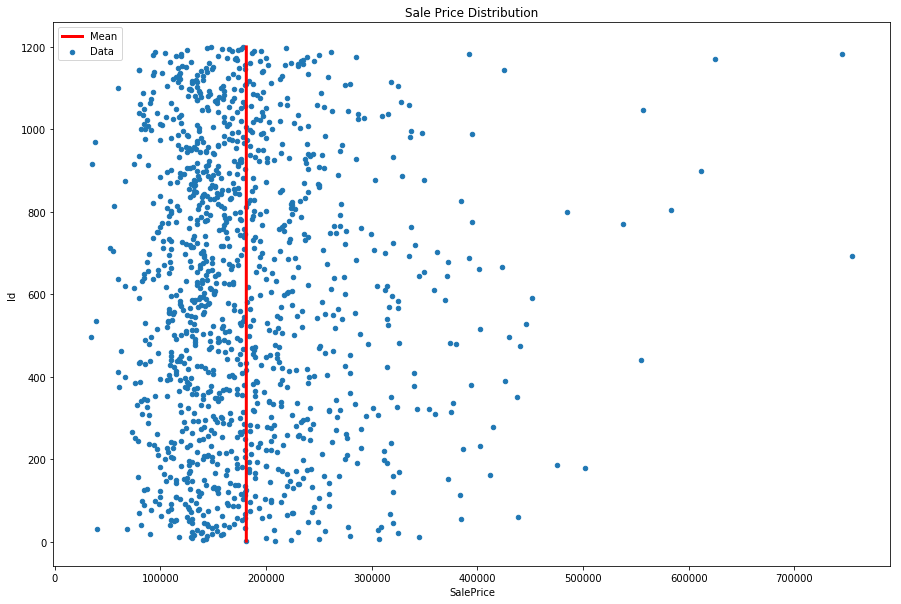

In [14]:
# scatter + line plot
_, ax = plt.subplots(figsize=(15,10))
df.plot(kind='scatter', x='SalePrice', y='Id', label='Data', ax=ax) #plot datapoints
ax.plot([np.mean(prices)]*len(prices), df['Id'].tolist(), color = 'r', linewidth=3.0, label="Mean") # mean
plt.legend()
plt.title("Sale Price Distribution")
plt.show()

Here we wanted to plot a scatter-plot representing all the sale prices of our dataset. On the x axis there is the price, while on the y there are the ids.

As we have seen above, we have 1200 different ids, so this diagram gives us a clear idea of how the prices are distributed over the dataset: we can see that the vast majority of data are in between 100000\$ and 200000\$, and, as expected, the higher the price, the lower the number of data points.

We have also plotted the line representing the mean price, it is exactly at 181414 as seen above.

Another very useful representation for visualizing the prices distribution is the following

Skewness: 1.964755
Kurtosis: 6.999637


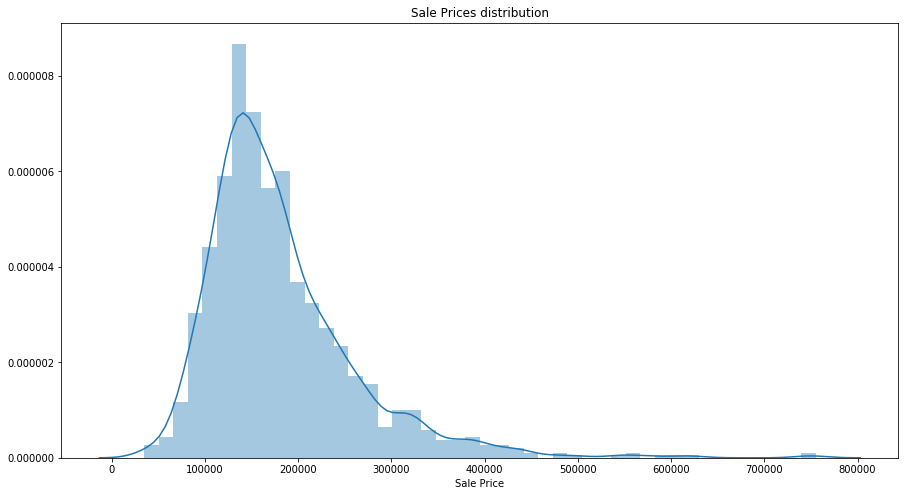

In [15]:
_, ax = plt.subplots(figsize=(15,8))
sns.distplot(prices, ax = ax)
plt.title("Sale Prices distribution")
plt.xlabel("Sale Price")

print("Skewness: %f" % skew(prices))
print("Kurtosis: %f" % kurtosis(prices))

plt.show()

This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions. It can also fit scipy.stats distributions and plot the estimated PDF over the data.

So here we have another view of our dataset, with the actual sale prices distribution and the approximated PDF.<br>
Here it's much more clear and evident what we have said above: the vast majority of data are concentrated in between of the values 100000\$ and 200000\$.

We have also computed Skewness and Kurtosis; those are two measures that allow to evaluate the "shape" of a given distribution.<br>
Skewness is usually described as a measure of a dataset’s symmetry – or lack of symmetry. A perfectly symmetrical data set will have a skewness of 0. The normal distribution has a skewness of 0. <br>
The coefficient of Kurtosis, instead, is a measure for the degree of tailedness in the variable distribution. Higher kurtosis means that more of the variance is the result of infrequent extreme deviations, as opposed to frequent modestly sized deviations.

Here we have a value of ~2 for the Skewness and ~7 for the Kurtosis. +/- 2 is usually considered as an acceptable value for a normal univariate distribution, however we have an high value for the Kurtosis. The numbers confirms what we can see from the plot: we have a curve with an high pick and not exactly centered but slightly moved at left.

One important thing that has to be taken into account is that the vast majority of predefined algorithm and models works better with normal distributions, so it could be a good idea to "normalize" the prices before running the algorithms. We will do this kind of analysis later on.

In [16]:
# utility function to plot an ECDF
# in addiction to the data and the title, it is possibile to give the scale as a parameter
# which is set to linear as default
def plot_ECDF(x, y, title, xlabel, scale='linear'):
    plt.figure(figsize = (20, 8))
    plt.plot(x, y)
    plt.yticks(np.arange(1.1, step=0.1))
    plt.xlabel(xlabel)
    plt.ylabel('ECDF')
    plt.grid(True, which="both", ls="-")
    plt.title(title)
    plt.xscale(scale)

In [17]:
# this function is used to annotate percetiles over a plot
def annotate_percentiles(data, show_lines=True):
    percentiles = [0.10, 0.25, 0.50, 0.75, 0.90]
    for y in percentiles:
        x = data[int(len(data)*y)]
        plt.annotate('%s' % x , xy=(x, y))
        if show_lines:
            plt.vlines(x, 0, y, linestyle="dashed")
            plt.hlines(y, 0, x, linestyle="dashed")
        plt.scatter(x, y, zorder=2, color="red")

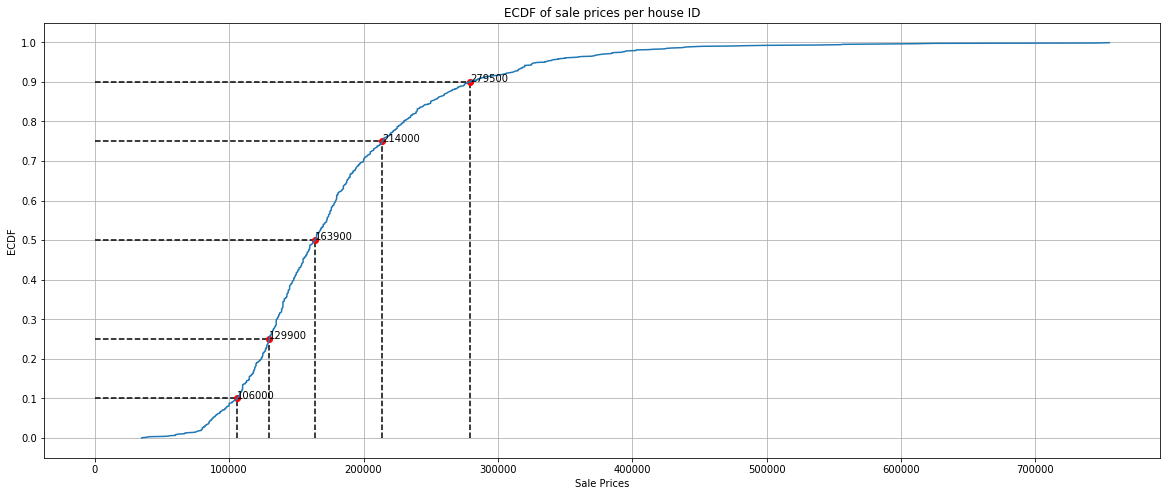

In [18]:
Y = np.sort(prices)
yvals = np.arange(len(Y))/float(len(Y))

#Plot with linear scale
plot_ECDF(Y, yvals, 'ECDF of sale prices per house ID', 'Sale Prices')
annotate_percentiles(Y)
plt.show()

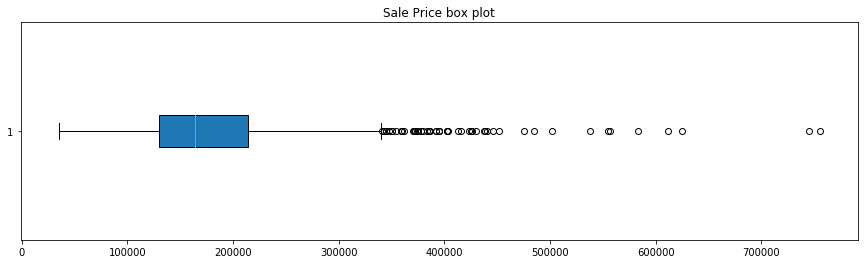

In [19]:
plt.figure(figsize = (15, 4))
plt.boxplot(prices, vert=False, patch_artist=True)
plt.title('Sale Price box plot')
plt.show()

To finish with the sale prices distribution analysis we decided to implement two different plots: an ECDF line plot and a box plot.

In the first case (ECDF): on the x axis there is the sale price, while on the y axis there is the cumulative percentage. 

We annotated the sale price in correspondance of the most important percentiles (10%, 25%, 50%, 75%, 90%). It is possible to see, for example, that the 25% of the houses have a prices lower than 129900\$, or that the 75% of those have a price lower than 214000\$, and so on.<br>
The ECDF is also useful to eventually show the presence of outliers: all the values which lies on the upper (or lower) part of the curve (when the trend stabilizes at 0 or 1) can be considered outliers.

In the second diagram, instead, we wanted to model the same concept with a different representation. The box plot diagram, in fact, helps in defining the upper limit and lower limit beyond which any data lying will be considered as outliers, showing them in a more direct and immediate way with respect to the ECDF. The very purpose of this diagram is to identify outliers before making any further observation so that the conclusion made from the study gives more accurate results not influenced by any extremes or abnormal values.<br>
In this case it's easy to see how the box plot marks the lower quartile, the upper quartile, and the lower and upper limits. So any value that will be more than the upper limit or lesser than the lower limit could be an outlier. Only the data that lies within lower and upper limit are statistically considered normal. As per the basic standards followed by all statistics a convenient definition of an outlier is a point which falls more than 1.5 times the interquartile range above the third quartile or below the first quartile.

The plots suggest that some of the highest values in the dataset can be outliers (in the box plot, we may consider as outliers all the values which are "alone" at the right, for example after 600000); however, we believe that such values might respect a real case scenario, and so we don't want to eliminate them at this point. Anyhow, more analysis will be made on the other attributes to eventually clean something.

### 1.2.2 Houses Attributes

After having discussed about the sale price importance, and having seen how data are distributed in our dataset, we move the analysis on the most relevant part: **the houses attributes**.

Those (79) attributes are really important for our mission, as we have to infer and predict the sale prices in our test set by looking at the values which are most representative and descriptive of an house.

So the goal of this section is to explore and analyze those attributes in order to detect, for example, the possible presence of misspelled or outliers, and to produce relevant informations and results which can be used to the decide in the best way which are the data to be kept and the information that we can discard for the successive analysis.

So in this section we will procede as follow: we will analyze separately the cases with null values and those without them. In each section, we will produce a scatter plot for each feature, and we will study by hand each attribute, both looking at the description and the intuitive meaning of it, and at what is suggested by the computed plot.<br>
We will complete this analysis by running a model on the attribute the make it suggest us the most important one.

The goal of the section is to come up with the most important and relevant features which can be considered to have an advantage later on when evalutaing models and making predictions.

#### 1.2.2.1 Houses Attributes: NaN distribution

In this context, we start our analysis by looking at the data in general, and, as a first step, we want to check how many informations we have for each attribute: or, in a reversed way, how many null/NaN values there are in the dataset.

In [20]:
# count how many NOT null values there are for each attribute
counts_not_null = df.notnull().sum()
print(counts_not_null)

Id               1200
MSSubClass       1200
MSZoning         1200
LotFrontage       990
LotArea          1200
Street           1200
Alley              75
LotShape         1200
LandContour      1200
Utilities        1200
LotConfig        1200
LandSlope        1200
Neighborhood     1200
Condition1       1200
Condition2       1200
BldgType         1200
HouseStyle       1200
OverallQual      1200
OverallCond      1200
YearBuilt        1200
YearRemodAdd     1200
RoofStyle        1200
RoofMatl         1200
Exterior1st      1200
Exterior2nd      1200
MasVnrType       1194
MasVnrArea       1194
ExterQual        1200
ExterCond        1200
Foundation       1200
                 ... 
BedroomAbvGr     1200
KitchenAbvGr     1200
KitchenQual      1200
TotRmsAbvGrd     1200
Functional       1200
Fireplaces       1200
FireplaceQu       636
GarageType       1133
GarageYrBlt      1133
GarageFinish     1133
GarageCars       1200
GarageArea       1200
GarageQual       1133
GarageCond       1133
PavedDrive

In [21]:
def get_attributes_by_count(df):
    not_full_attributes = df.columns[df.isnull().any()].tolist()
    full_attributes = [col for col in df.columns.values if col not in not_full_attributes+['Id', 'SalePrice']]
    
    return full_attributes, not_full_attributes

In [22]:
def print_null_stats(full, not_full):
    # full attributes
    print("Number of attributes with no null value:", len(full))
    print(full)

    print()

    # Not full attributes
    print("Number of attributes with at least one null value:", len(not_full))
    print(not_full)

In [23]:
full_attributes, not_full_attributes = get_attributes_by_count(df)
print_null_stats(full_attributes, not_full_attributes)

Number of attributes with no null value: 61
['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

Number of attributes with at least one null value: 18
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'B

Here we can see that, in the training set there are 63 attributes without any null value (however we should not consider Id and SalePrice at this point as we are focusing on the other 'features', so we can say that we have 61 attributes with no null), and 18 which instead have at least one.

Those 18 attributes could be a problem for our model as it is possible that there are missing values. From now on, we will analyze more into the details those attributes (and the said 61 above) to decide, for example, whether to try to estimate some of them or just discard the entire attribute.

Now let's see the test set.

In [24]:
# count how many NOT null values there are for each attribute
counts_not_null_test = test_df.notnull().sum()
print(counts_not_null_test)

Id               260
MSSubClass       260
MSZoning         260
LotFrontage      211
LotArea          260
Street           260
Alley             16
LotShape         260
LandContour      260
Utilities        260
LotConfig        260
LandSlope        260
Neighborhood     260
Condition1       260
Condition2       260
BldgType         260
HouseStyle       260
OverallQual      260
OverallCond      260
YearBuilt        260
YearRemodAdd     260
RoofStyle        260
RoofMatl         260
Exterior1st      260
Exterior2nd      260
MasVnrType       258
MasVnrArea       258
ExterQual        260
ExterCond        260
Foundation       260
                ... 
HalfBath         260
BedroomAbvGr     260
KitchenAbvGr     260
KitchenQual      260
TotRmsAbvGrd     260
Functional       260
Fireplaces       260
FireplaceQu      134
GarageType       246
GarageYrBlt      246
GarageFinish     246
GarageCars       260
GarageArea       260
GarageQual       246
GarageCond       246
PavedDrive       260
WoodDeckSF   

In [25]:
full_attributes_test, not_full_attributes_test = get_attributes_by_count(test_df)
print_null_stats(full_attributes_test, not_full_attributes_test)

Number of attributes with no null value: 60
['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

Number of attributes with at least one null value: 19
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'Bsm

In the test set we have a slightly different situation with 61 (-1 for the Id) attributes without any null values, and, instead, 19 features with at least one. This means that in the test set there is one attribute that has null values that instead is a "fully defined" in the training set: 'Electrical'.

In [26]:
# concat the two datasets: df without saleprice and test_df
frames = [df.drop(['SalePrice'], axis=1), test_df]
X_df = pd.concat(frames)
print(X_df.shape)

# get counts also for the complete dataframe
counts_not_null_X = X_df.notnull().sum()

# get stats
full_attributes_X, not_full_attributes_X = get_attributes_by_count(X_df)
print_null_stats(full_attributes_X, not_full_attributes_X)

(1460, 80)
Number of attributes with no null value: 60
['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

Number of attributes with at least one null value: 19
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'Bsmt

And obviously by running the same functions also on the complete dataframe we obtain the results we were expecting: 19 nullable attributes and 60 complete ones.

TypeError: unsupported operand type(s) for -: 'str' and 'float'

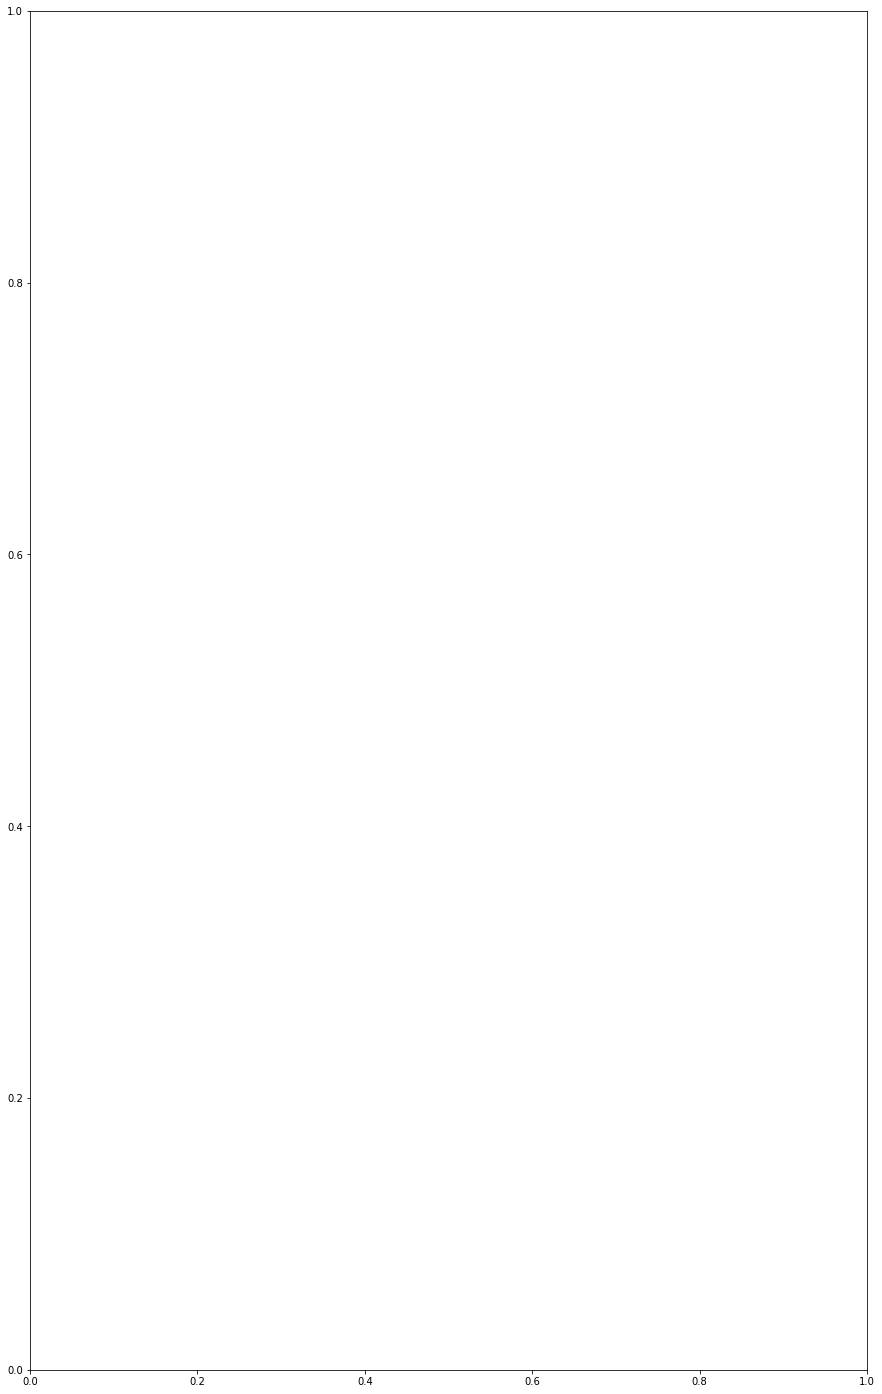

In [27]:
# compute the number of not null entries for each (81) attribute
counts_not_null = np.array(counts_not_null.drop(['Id', 'SalePrice']).tolist())
counts_not_null_test = np.array(counts_not_null_test.drop(['Id']).tolist())


### PLOT ###

# function to set colors to bars
def set_barcolor(bars, counts, ranges):
    for j in range(len(bars)):
        color = 'red'
        if counts[j] == ranges[0]:
            color = 'lightgreen'
        elif counts[j] > ranges[1]:
            color = 'green'
        elif counts[j] > ranges[2]:
            color = 'yellow'
        elif counts[j] > ranges[3]:
            color = 'orange'
        bars[j].set_color(color)
# plot
plt.figure(figsize=(15,25))
bars = plt.barh(df.drop(['Id', 'SalePrice'], axis=1).columns, counts_not_null, align='center', alpha=0.4)
bars2 = plt.barh(test_df.drop(['Id'], axis=1).columns, counts_not_null_test, left=counts_not_null, align='center', alpha=0.4)
set_barcolor(bars, counts_not_null, [1200, 900, 600, 300])
set_barcolor(bars2, counts_not_null_test, [260, 195, 130, 65])
patch1 = mpatches.Patch(color='lightgreen', label='0% null entries')
patch2 = mpatches.Patch(color='green', label='0% < null entries < 25%')
patch3 = mpatches.Patch(color='yellow', label='25% <= null entries < 50% ')
patch4 = mpatches.Patch(color='orange', label='50% <= null entries < 75%')
patch5 = mpatches.Patch(color='red', label='null entries >= 75%')
plt.legend(handles=[patch1, patch2, patch3, patch4, patch5], loc=1, borderaxespad=0.)
plt.ylim([-1,len(counts_not_null)])
plt.ylabel('Home attributes')
plt.xlabel('Not null entries')
plt.title('Total entries with no null value')
plt.show()

This is one of the most important plots we can produce to start analyzing the dataset: it is an horizontal stacked bar plot which shows the percentage of entries that are present in the dataset for each features (where for features we mean the 79 "house attributes").

In practice, we know that we have a total of 1200 rows/entries in the training set and a total of 260 entries in the test set, so we have just plotted the percentage of NOT null values for each attribute. So on the x axis is present the count of entries for each attribute, and on the y axis are present all the features.

Training set and test set are stacked on each other: it is possible to see the line which separates the count for each attribute, and the stacked bars can have different colors.

The plot is also colored to allow a better and most immediate visualization:
* light-green = 100% of entries: 1200 == training, 260 == test
* green = 75% of non-null values: 900 <= training < 1200, 195 <= test < 260
* yellow = 50% of non-null values: 600 <= training < 900, 130 <= test < 195
* orange = 25% of non-null values: 300 <= training < 600, 65 <= test < 130
* red = more than the 75% of null values: 0 <= training < 300, 0 <= test < 65 

Given this representation, it's really simple and fast to spot which are the attributes that contains some (or a lot) of null values, and the related 'level of criticity'.

We can easily spot, for example, what we were talking about in the previous cells: there is only one attribute which is fully defined in the training set, but is not in the test set (Electrical); and we can easily see that because it's the only one which have the stacked bars of two different colors.<br>
It is also interesting to see (and probabily expectable) that the percentage of missing data is the same for all the cases, both for the training and the test set: excetion made for the case above, all the stacked bars have the same color, which means the same percentage-range of missing values.

#### 1.2.2.2 Houses Attributes: Attributes with no null value

At this point, we want to build another dataframe containing only the "fully defined attributes": the 60 attributes with no null value. However, this dataframe will contain 61 columns as we will insert in it also the sale price to simplify the successive analysis.

In [28]:
# dataframe with the 61 attributes + id + saleprice
full_attributes_df = df[full_attributes_test + ['SalePrice']]

In [29]:
numerical, categorical = get_attributes_by_type(full_attributes_df)
print("The dataset contains", len(numerical), "numerical attributes")
print("The dataset contains", len(categorical), "categorical attributes")

The dataset contains 34 numerical attributes
The dataset contains 27 categorical attributes


The new dataset with fully defined attributes, contains 34 numerical attributes and 27 categorical ones.

NB: this is not a correct estimation; we will see that there are some 'numerical attributes' (whose values are integers) which have a categorical behaviour.

Given those 60+1 attributes, we are interested in analyzing all their features: distribution, type (categorical, numerical), correlation...

A good starting point to do that is to plot a scatter-plot 'attribute vs saleprice' for each attribute in order to have a broad view of distribution and type for each of them.<br>
For the plot we are going to separate numerical and categorical in two different cells as in this way it appears to be much more clean and less confuse. Moreover, it will be easier to comment and to look at.

In [30]:
# utility function to plot a grid of scatter plots, for each given attribute
# showavg parameter is to eventually show the average as a yellow point
def plot_scatter_subplots(df, attributes, nr, nc, figsize=(35,100), showavg=True):
    fig, axarr = plt.subplots(nr, nc, figsize=figsize)
    for idx, attribute in enumerate(attributes):
        axarr[idx//nc, idx%nc].plot(df['SalePrice'], df[attribute], '.', label='Data') #plot datapoints
        if(showavg):
            avgs = df.groupby([attribute])['SalePrice'].mean()
            axarr[idx//nc, idx%nc].plot(avgs.values, avgs.index.values, '.', color='orange', label='Mean')
        axarr[idx//nc, idx%nc].legend()
        axarr[idx//nc, idx%nc].set_title('SalePrice distribution vs '+attribute)
        axarr[idx//nc, idx%nc].set_xlabel('SalePrice')
        axarr[idx//nc, idx%nc].set_ylabel(attribute)
    plt.tight_layout()
    plt.show()

In [31]:
print(numerical)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


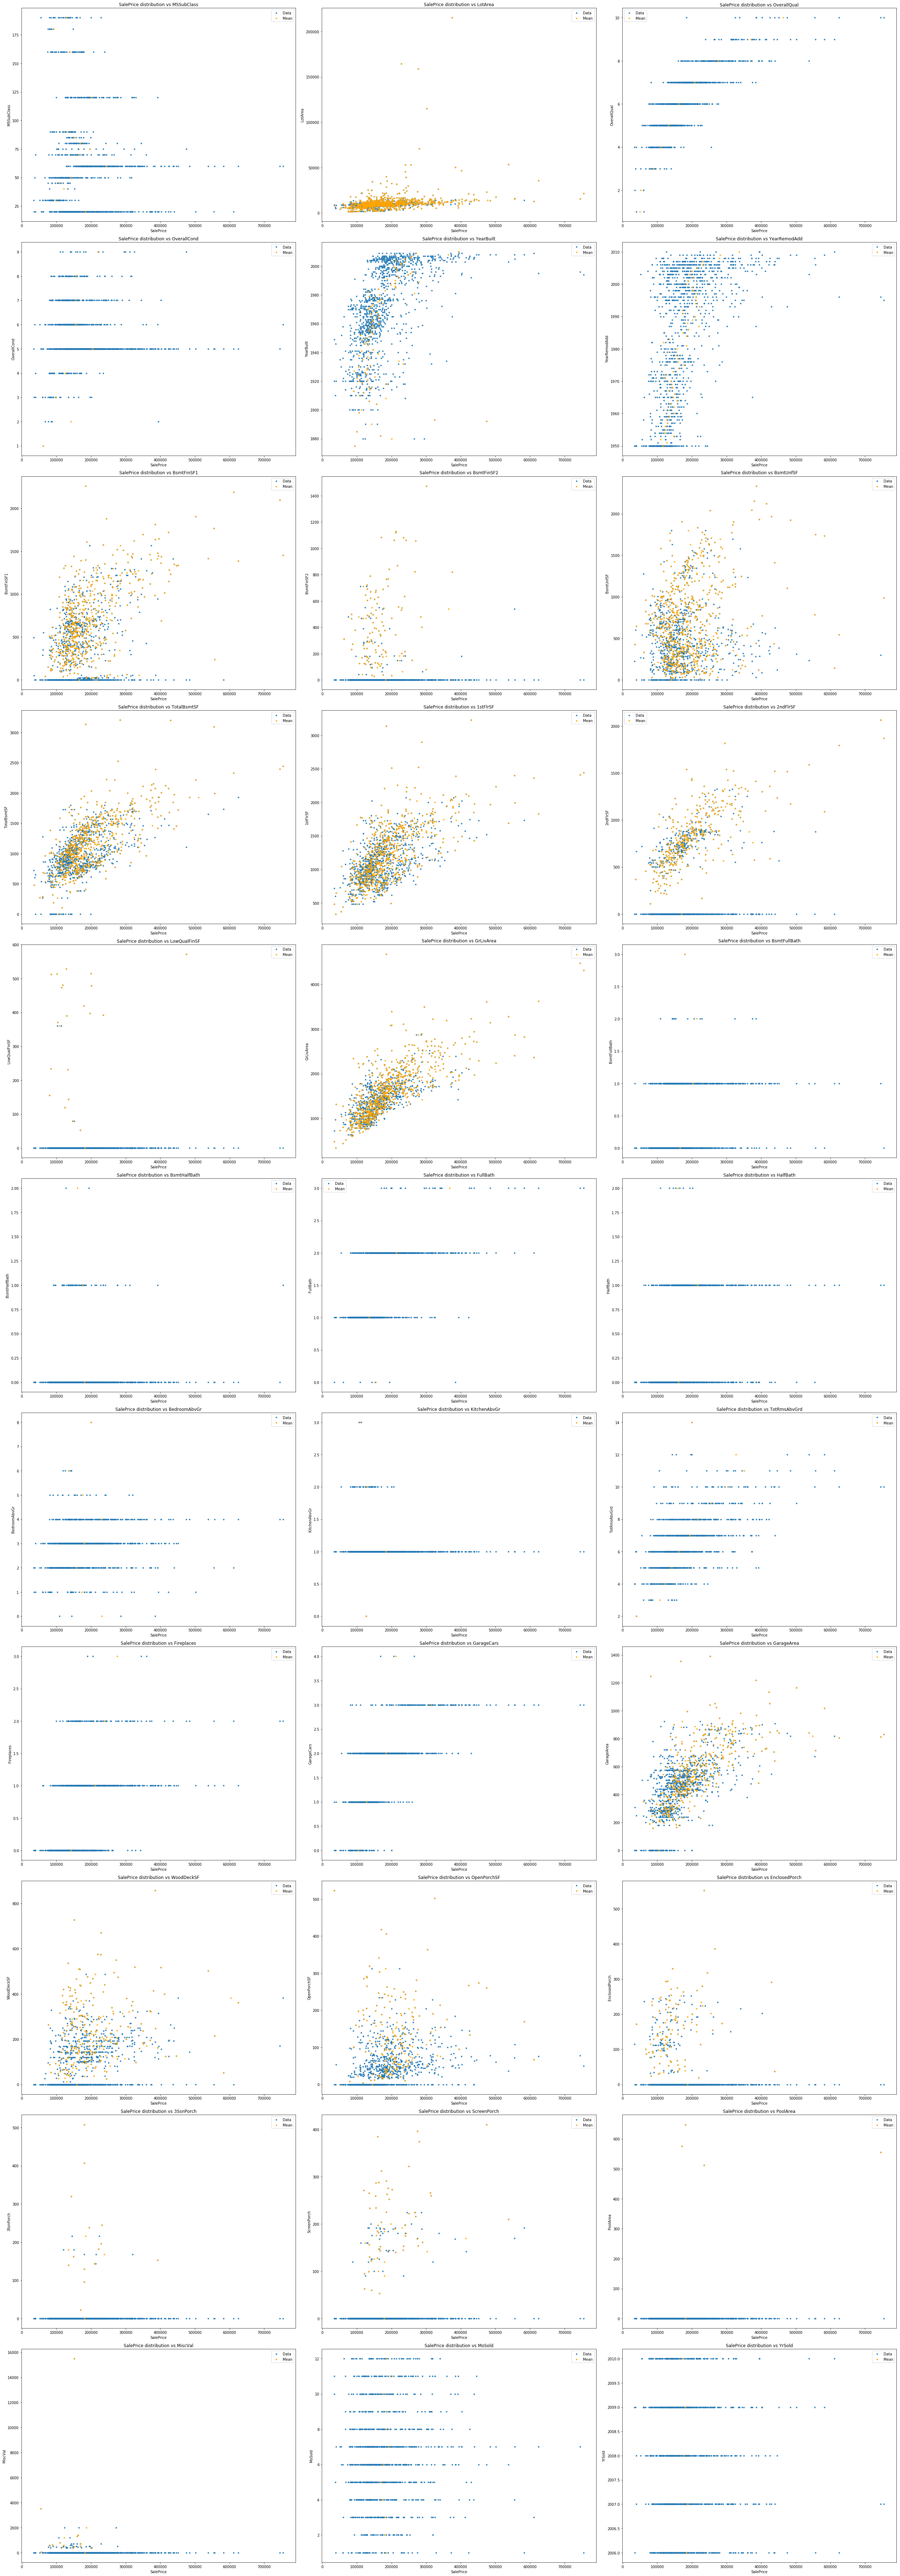

In [32]:
# plot a set of 11*3 (33 cells) subplots; we need space for 34-1 numerical attributes
# NB: "delete" the last two attributes from numerical (salePrice)
plot_scatter_subplots(full_attributes_df, numerical[:-1], nr=11, nc=3)

Those produced plots are really important for our analysis: they allow us to have a large view of the trend of the whole dataset, but also an individual look at all the attributes it is composed of.

As said, we are interested in analysing and predicting the sale price, so we have produced one plot for each house feature: on the x axis we can find the sale price, and on the y axis the given attribute values. Moreover, we have also plotted the average value for each different y. This is particularly indicated for categorical plot, where there are few different y values, but it is a good index also for the numerical ones as in most cases it is possible to visualize the trend assumed by the attribute at the increase of its values.<br>
In this particular case we are dealing with only the "numerical attributes" (an analysis on the categorical ones follows up in the cell below).

At first glance, it is evident that some of the (numerical) attributes have a "categorical behaviour": those are the ones represented by horizontal lines. In fact, we can see that some of them have a set of predefined numerical values that they can assume. Those are, for example, the *rating* attributes, where the data point are distributed on values between 1 and 10, or the *years*, where the considered interval is of a few years (eg. 2006-2010) only.<br>
**However, in practice, not all of them are really categorical attributes. In fact, if we consider the "linear" ones (eg. years, or 1to10 ratings) we can see that those are numerical attributes with a categorical behaviour. But it is not like that for every attribute: we have some, for example MSsubclass, where the assumed values (numbers 20to190) refers to categories, so those are real CATEGORICAL FEATURES WITH NUMERICAL VALUES (inverse as before). And we have to take into account this for our successive analysis.**

This differentiation between categorical, ordinal and numerical attributes is really important for our goal: at the end of the analysis we want to have all the categorical attributes converted into numerical ones, so we'll need to map them to integers values. However, for some of them, there is also the order to be preserved. This kind of analysis will be made in the following cells.

Anyhow, at this point we want to analyze the **values** to understand and evaluate the relevance and the importance of each feature. All the values both from a personal and individual point of view, and by looking at the result obtained through the scatter plots.

This is a fundamental step as, at a certain point, we'll need to select the attributes on which we will make the analysis and build the models, so which are the features on which we will base our analysis to make the predictions.

Relevant features:

- **MSsubclass** represents the type of dwelling involved (multilevel, split, family...). Intuitively is an important parameter, and its importance is confirmed looking at the first plot as we can see that the average price may change a lot from type to type.
- **OverallQual** (rating 1 to 10) of the materials and finish qualities of the house. Intuitively is a very important parameter that summarizes important physical features of the house, and its importance is confirmed by the plot as we can see a clear increasing in the average price for each different rating.
- **Yearbuilt**. Important parameter, as generally the more new an house is, the more expensive it could be (not always, but in general).
- **Year remod**. It's important because even if an house is really old but it has bee remodeled recently, the sale price of the house will increase. It can be used together with the year built to understand something more about data.
- **Total basement square feet**; represent the basement area in square foot. From the plot it is quite evident that there is a correlation between an increasing in the total basement area, and the final sale price. This was also expected.
- **1st and 2nd floor square feet**. Intuitively important, and also important from the plot, same trend as for the total basement sqf.
- **Ground living area square feet**. Intuitively very important, and its importance is confirmed from the plot.
- **FullBath**. From the plot we can see that there is a corralation as the higher it is the full bath value, the higher is the price.
- **TotRmsAbvGrd**. Intuitively the number of rooms is an important parameter and it should be related to the size of the house. Anyhow, from the plot we can see a correlation.
- **Fireplaces** number. It's relevant, as we expect that an house with at least one fireplace will cost more than an house with none of them. This is also confirmed by the plot.
- **GarageCars**: size of the garage in cars capacity. Intuitively very important and can make the difference. The plot confirm the guess.
- **GarageArea** in square feet. It is important and represents the same thing of garage cars in a different way. Also the plot confirm the guess (but there are same exceptions! outliers?).

<br>
Non relevant feautures:

- **Lot Area** (lot square feet). Intuitively is important, as we expect bigger lot areas to cost more than smaller one. However, it's not always like that, as it can be a very bad house, or in a very far location from a city center, and the size does not matter. Moreover, we can see that in the plot we have all the data points concentrated on a single line, and the price does not seem to be influenced by the area.
- **OverallCond** (rating 1 to 10): general conditions of the house. We were expecting this to be a very important parameter, as it values the conditions of the house. However, we can see from the plot that the prices do not increase as it improves the rating but we have a more "random" distribution.
- **BsmtXXX**. All the basement parameters appears to not be importat for our analysis, both intuitively and from the graph above. However there is the "total basement" which is relevant.
- **Low quality finished sqf**. From the plot we can see that the vast majority of the values are 0, and the others does not tell us much about the price.
- **Bsmt full and half bath**. From the plot we can see that it is not possible to infer any kind of relationship between them and sale price values.
- **Half bath**. No evident correlation.
- **BedroomsAbvGr**. No evident correlation.
- **KitchenAbvGr**. There are too few data for value different than 1, and from those it's not possible to infer a correlation with prices.
- **WoodDeskSF**. Despite we were expecting a correlation between those attributes, from the plot it's not possibile to notice that.
- **OpenPorchSF + EnclosedPorch + 3SsnPorch + ScreenPorch**. The same reasonings applied to wooddesk can be said for the \*\*\*porch.
- **PoolArea**. Altought we were expecting that the pool could have been a determinant parameter, in the analyzed dataset we have only 4 houses with a pool (this is evident from the relative plot as we have only 4 points which have a value different from 0), and so we cannot select it as a determinant feature.
- **MiscVal**. The same thing said about the pool area can be said for the misc features. Here it's not clear what to expect from this parameter, and intutively it might be (as it might not) a relevant one; however, there are only few values different from 0, and for this reason we decided to not consider this as a relevant parameter.
- **MonthSold + YearSold**. Those are not "house features", and for sure are not important from a sale point of view, and also from the plot it appears evident that there is a "random" distribution of sale prices on the months and years.

In [33]:
print(categorical)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


ValueError: could not convert string to float: 'RL'

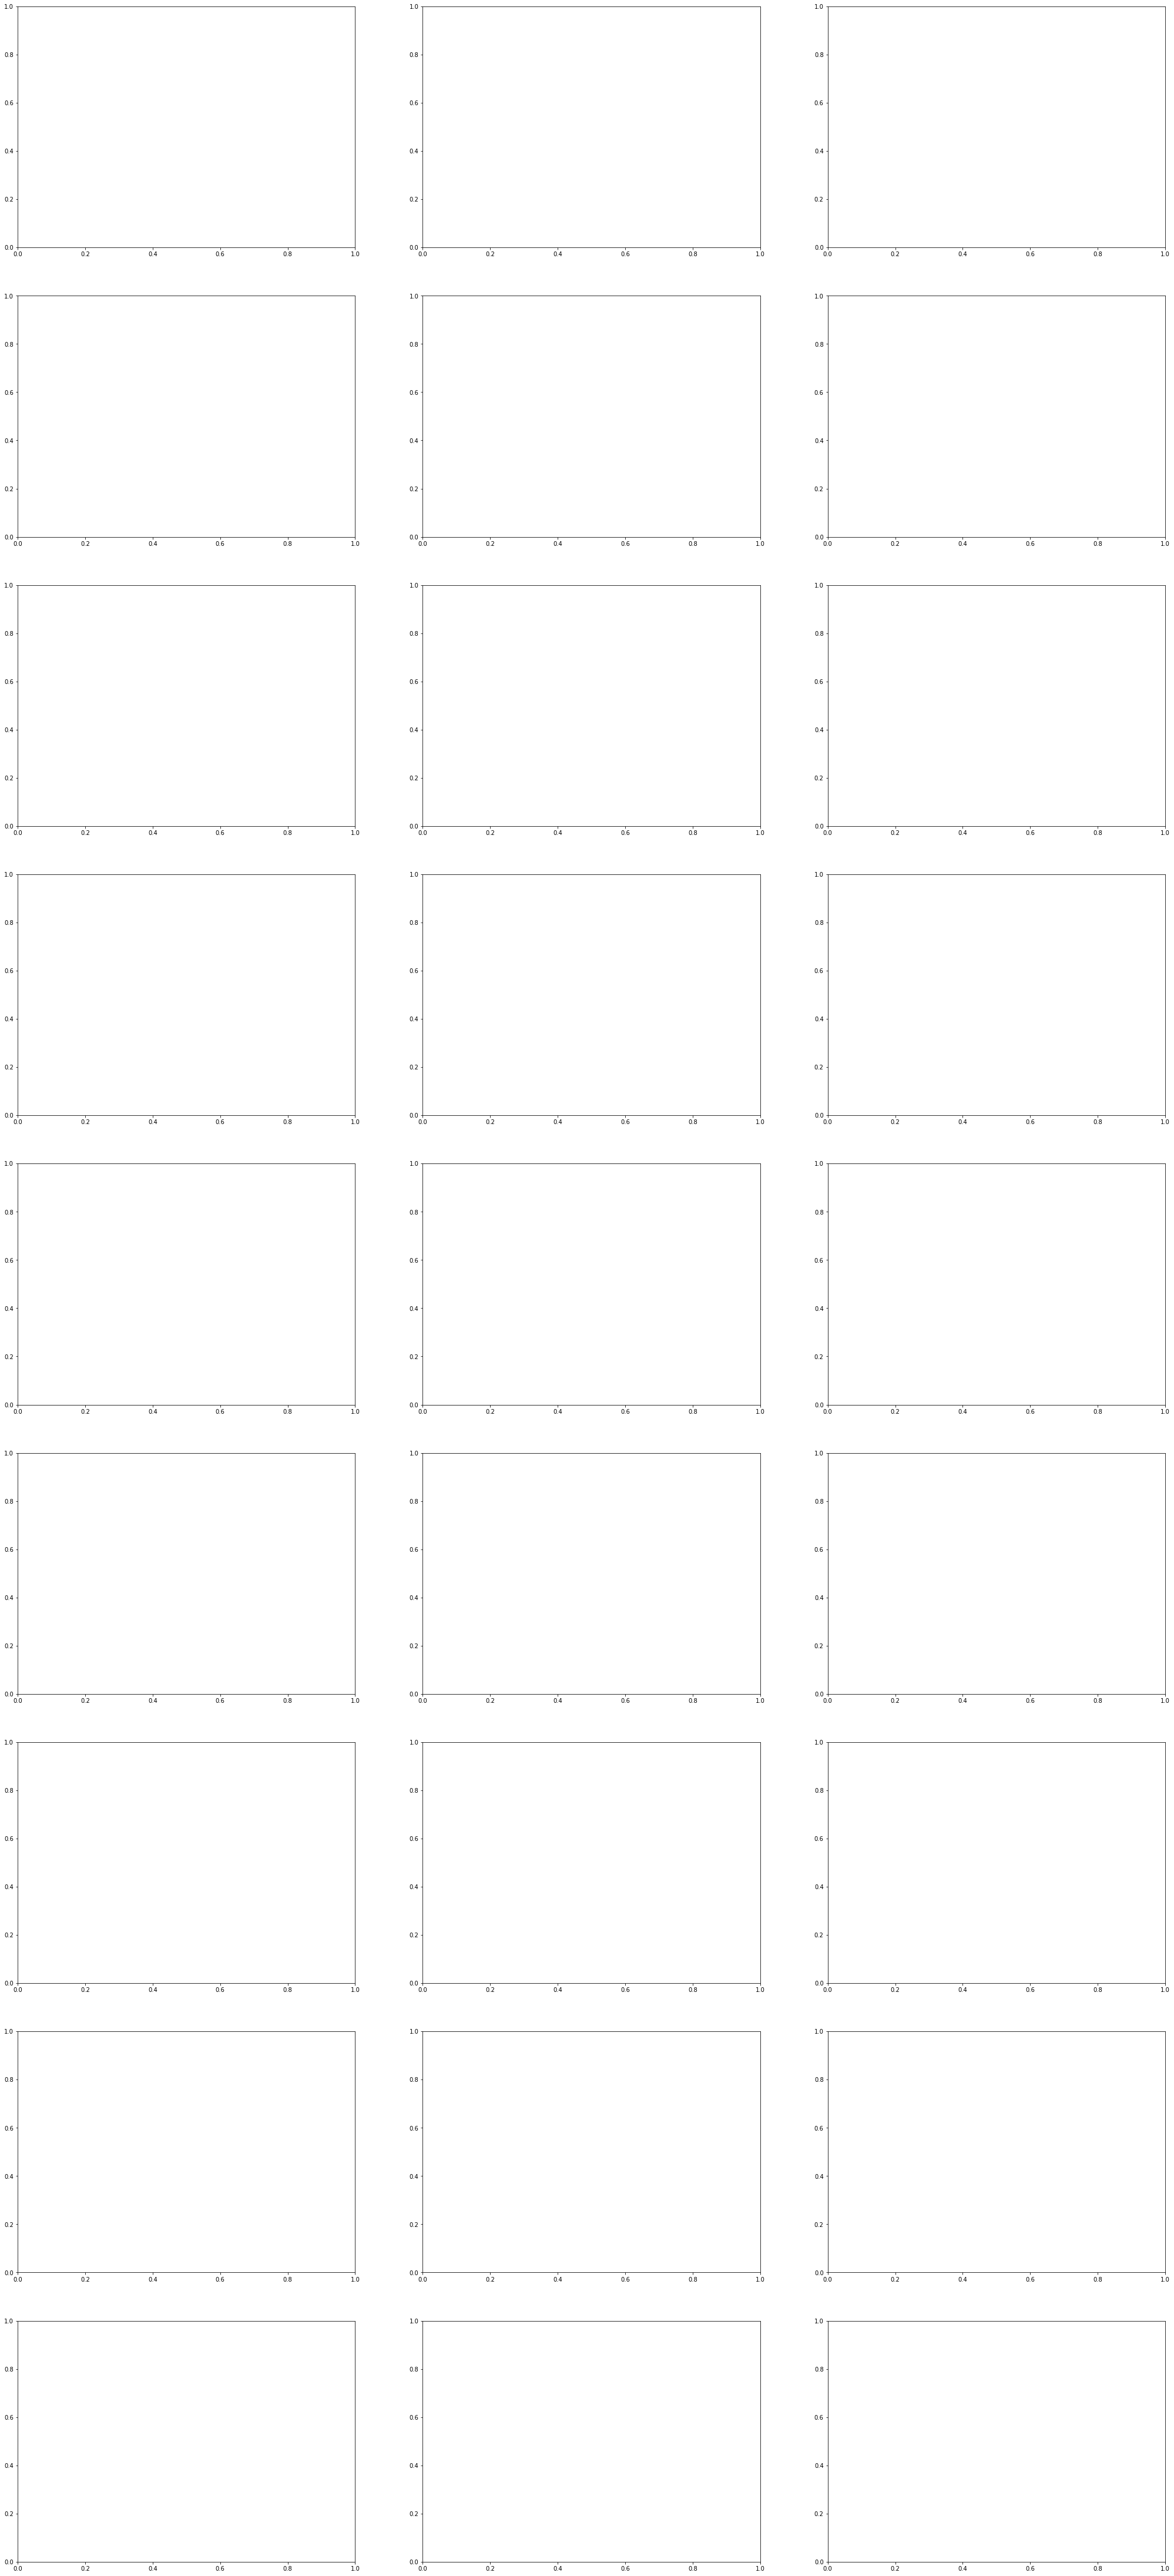

In [34]:
# plot a set of 9*3 (27 cells) subplots; we need space for 27 numerical attributes
plot_scatter_subplots(full_attributes_df, categorical, nr=9, nc=3, figsize=(35, 80))

Here it's evident the problem we were talking about in the previous cell. ALL those attributes will have to be converted into numerical attributes with a categorical behaviour, right as well as it was happening with MSSubClass before.<br>
However, for some of them it's enough to map the attributes to a set of "random" interger: for example for the Neighborhood we can just assign an integer value to each neighborhood. The problem are those features with an ordinal relation among the categorical values: this is the case of all those attributes whose values represents an ordinal measure, for example for the ratings or for the evaluations (Exellent, Good...); in this case **the order has to be preserved when mapping**.<br>
We will deal with this problem later on.

Now, let's concentrate on the values and on the selection.

Relevant feautures:
- **MSZoning**, identifies the zoning classification. It's a very important parameter, and its importance is evendent also from the plot: we can see that some of the values FV, C are really characterizing of the house and determinant on the final price "interval".
- **LandContour**. Intuitively not very relevant, but from the plot it appears to be slightly correlated with the prices, as it is possible to notice a little different on the different intervals (prices) from category to category.
- **Neighborhood**: physical location of the house within the city. It is for sure one of the most relevant parameters, and our expectation is confirmed byt the plot above, with a slightly different interval for each different location.
- **Conditions1 & 2**: proximity to various conditions. It can be really determinant, and despite the majority of the houses in the dataset have 'normal' proximity conditions, we can see a correlation with the sale price for both the attributes.
- **BldgType + House Style**. In this case, for us, those features are really important as they define the type and the style of building, and can be relevant for the final choice and price. However, it's not possible to detect a real correlation with the selling price from the plots above.
- **RoofStyle** (flat, shed, hip..). Intuitively can be important and sometimes can make the difference. However, from the plots, there is no evident correlation.
- **RoofMatl** (roof material). It's very import, both intuitively and from the plot, as it's possible that there are materials more fine and expensive than others and can alter the final price.
- **Exterior 1st & 2nd**: exterior covering material. As before for the roof, it can be determinant and there are some more costly than others. In this case it's also possible to see a correlation from the plot.
- **ExterQual + Cond**: it is very very important, and correlated to what said above. From the plot the correlation is really evident.
- **Foundation** (material): as for the others "materials-related" attributes, it can be relevant as the material cost can influence the final price. Also the plot suggests such a correlation.
- **Heating** (gas, wall...). Intuitively very imporant. Despite the majority of the cases are all on the GasA category, we can see some datapoint also on some other, with a little difference in prices.
- **HeatingQC** (excellent, poor...). Very important as the one before. Here we have a much more "sparse" situation on all the categories, and from the plot we can infer a correlation with the price.
- **AirConditioning** (Y or N). Houses with air conditioning might cost more than the ones with no ar-system, so it can alter (a bit) the final price. The plot suggests the same finding.
- **KitchenQuality**. Intuitively very important, and also in the plot we can clearly see that the best categories (excellent and good) have higher prices than the other two.
- **SaleType + Cond**. Intuitively these are very important features because they are strictly correlated with the SalePrice. The plots confirms our thoughts since the distribution of sale prices slightly changes among the different values of these two features.

<br>

Not relevant features:
- **Street** (two possible values: paved and gravel). Intuitively it could be an important factor, but the distribution is too unbalanced and there is no evident sign of correlation with prices.
- **LotShape**. Intuitively not important, and the absence of correlation with the price is also evident on the plot.
- **Utilities**. Intutively very important, as it could really influence the final price of the house. However, in the considered dataset all the houses appear to have all the public services (AllPub) included, with only one exception (out of 4 possible values).
- **LotConfig**: lot configuration (corner lot, inside lot...). It can be relevant when buying an house, but there is no evident correlation.
- **LandSlope**. It can be a relevant factor in some conditions, but from the plot we can see that the vast majority of the houses have a gentle slope, and it does not appear evident a correlation of the price we the others.
- **Functionalities**. Also in this case the attribute seems to be very important from an intuitive point of view, but there is not evident correlation on the plot.
- **PavelDrive**. Same as with the functionalities. The attribute intuitively is important, but we don't see a correlation on the plot. Moreover, we have the values highly unbalanced on the Y.

#### 1.2.2.3 Houses Attributes: converting Categorical to Numerical

At this point we have studied better all the attributes in our dataframe. This point to point analysis has been useful not only to select the important features, but also to better understanding each attribute and its meaning.

Now we are interested in looking at the correlation of those attributes between each other, and in particular with sale price, to understand if the attributes that we have selected are good (strongly correlated with sale price) or not.

In order to plot the correlation map, we need to convert the categorical features into numerical ones, and for that we can use the cat codes representation for all the not ordinal attributes and a manually defined mapping for the others.

In [35]:
#### CATEGORICAL FEATURES MAPPING ####


### NOT ORDINAL
# attributes without any ordinal relation among their values
categorical_non_ordinal_features = ['MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood',
                                    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
                                    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating',
                                    'CentralAir', 'SaleType', 'SaleCondition', 'MSSubClass']


### ORDINAL
# attributes with an ordinal relation among values
categorical_ordinal_features = ['LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 
                                'HeatingQC', 'KitchenQual', 'Functional', 'PavedDrive']
# for the ordinal attributes a manual mapping is required
dicts = [
    {'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0}, #lotshape
    {'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0}, #utilities
    {'Gtl':2, 'Mod':1, 'Sev':0}, #landslope
    {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}, #exterqual
    {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}, #extercond
    {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}, #heatingQC
    {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}, #kitchenqual
    {'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0}, #functional
    {'Y':2, 'P':1, 'N':0}, #paveddrive
]

In the cell right above, we have define two arrays of categorical attributes which have to be mapped: one with those without any ordinal relation, and one with the others.<br>
For the second group, a dictionary has been defined by looking at the values into the given description file.

In [36]:
print("Attributes to be mapped:", len(categorical_non_ordinal_features)+len(categorical_ordinal_features))

Attributes to be mapped: 28


As we have seen above, we were having 28 categorical attributes: all of them have been selected to be mapped to new integer values. However, we have added also the MSSubClass to this remapping despite it was a categorical attributed already mapped, because we want to use the same "integer representation" for all the categorical attributes.

In [37]:
# map all the categorical attributes into numerical ones
# parameters:
# dataframe
# ordinal attributes list
# non ordinal attributes list
# non ordinal attributes dictionary with mapping
def mapToIntegers(pandas_df, ordinal, non_ordinal, dicts):
    for attr in non_ordinal:
        if(attr in pandas_df):
            pandas_df[attr] = pandas_df[attr].astype('category').cat.codes
        
    for i, dic in enumerate(dicts):
        attr = ordinal[i]
        if(attr in pandas_df):
            pandas_df[attr] = pandas_df[attr].apply(lambda x: dic[x] if x == x else x)
        
    return pandas_df

In [38]:
# map to integers all the 
full_attributes_pandas_df = mapToIntegers(full_attributes_df.copy(),
                                         categorical_ordinal_features,
                                         categorical_non_ordinal_features,
                                         dicts)

#### 1.2.2.4 Houses Attributes: Correlation

At this point we want to study the correlation among the attributes and in particular with the SalePrice.

- So we first plot a correlation map for representing the correlation of all the attributes among each other (with exception of Id, as it is not useful to look at it).
- Then we proceed with a "technical analysis" using an existing model, the RandomForest, to try to estimate the best and most correlated features among the fully defined. The results may confirm or not what we have guessed and tried to do manually above.
- Then we complete the analysis on the fully defined attributes by analyzing in the details the correlation with all the attributes vs the SalePrice.

At the end of this section we will possibily come up with the best attributes we can select for building our models.

In [39]:
# utility function to plot a correlation map
def heat_map(data, title, figsize=(15,12)):
    plt.figure(figsize=figsize)
    sns.heatmap(data)
    plt.title(title)
    plt.show()

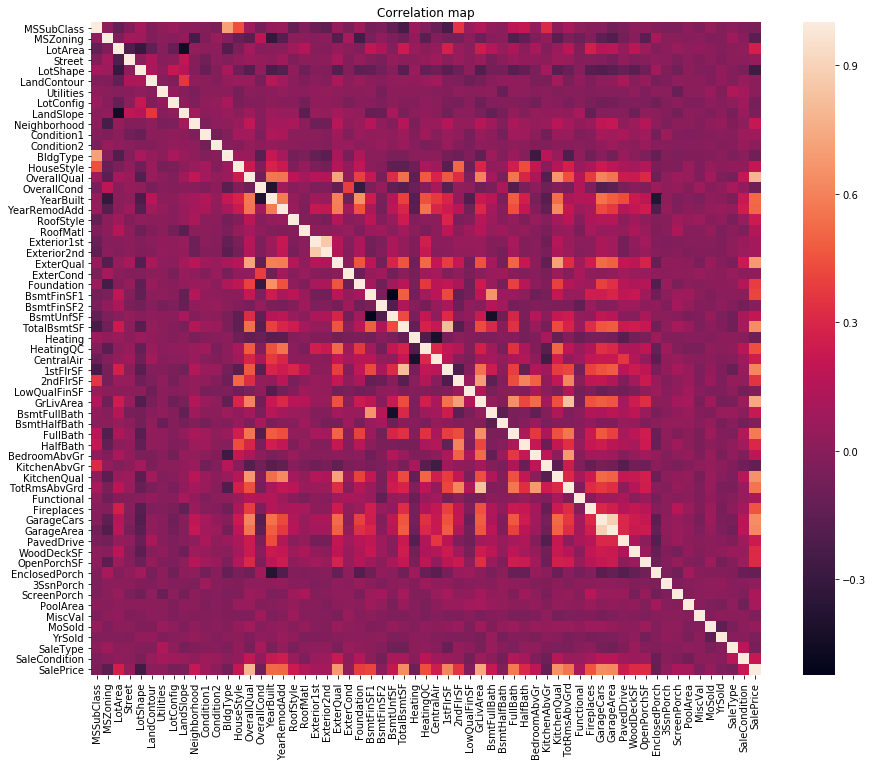

In [40]:
# Plot a heat map for correlations among all features that have a defined value for each row
# and the SalePrice value
full_attributes_corr = full_attributes_pandas_df.corr()
heat_map(full_attributes_corr, 'Correlation map')

Here finally we have the correlation map of all the fully defined attributes (eg. those without any null values).

First of all, if we look at the colored column on the right, we can see the "correlation scale":
* white for the highly correlated attributes
* violet for the ones with a 0 correlation
* black for those with a negative correlation

We can see that in most cases there is an high correlation between some of the attributes: we can see for example that GarageCond and GarageArea are strongly correlated; the same can be said for GrLivArea and TotRmsAbvGrd, or of 1stFlrSF with TotalBsmtSF, or of Exterio1st and Exterior2nd.<br>
Those kind of correlations were also expected because sometimes the attributes represents the "same concept", like in the case of the garage or in the case of rooms and surface: it's obvious to expect that the more is the ground living area, the higher is the number of rooms, or that the bigger is the 1st floor surface, the bigger is the total basement surface.<br>
This kind of analysis can be done for a lot of attributes, and it's useful as we might think, for example, of removing one of the two (if they are so much correlated) for making predictions.

However, probably the most important row/colum of the matrix is the last one: SalePrice; we are in fact interested in the correlation of all the attributes with this parameter. However we do not analyze this correlation at this point because we will plot a barh to better visualize this correlation later on.

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import r2_score
from collections import defaultdict

/Users/paolomoriello/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
# utility function which returns the most 25 important features selected by using a RandomForest
# NB: two arrays are returned using two approaches
def get_features_importances(X, Y, features_names):
    # approach 1
    full_attributes_names = np.array(features_names)
    rf = RandomForestRegressor()
    rf.fit(X, Y)
    full_attribute_sorted_importances = sorted(zip(rf.feature_importances_, features_names), reverse=False)[-25:]
    
    # approach 2
    rf = RandomForestRegressor()
    scores = defaultdict(list)
    #crossvalidate the scores on a number of different random splits of the data
    for train_idx, test_idx in ShuffleSplit(len(X), 100, .3):
        X_train, X_test = X[train_idx], X[test_idx]
        Y_train, Y_test = Y[train_idx], Y[test_idx]
        r = rf.fit(X_train, Y_train)
        acc = r2_score(Y_test, rf.predict(X_test))
        for i in range(X.shape[1]):
            X_t = X_test.copy()
            np.random.shuffle(X_t[:, i])
            shuff_acc = r2_score(Y_test, rf.predict(X_t))
            scores[features_names[i]].append((acc-shuff_acc)/acc)
    full_attribute_sorted_importances2 = sorted([(np.mean(score), feat) for feat, score in scores.items()], reverse=False)[-25:]

    return full_attribute_sorted_importances, full_attribute_sorted_importances2



# plot barh of feature importances (ordered by importance)
def plot_sorted_importances(full_attribute_sorted_importances, full_attribute_sorted_importances2, title, xlabel, ylabel):
    fig, axarr = plt.subplots(1, 2, figsize=(35, 25))

    for idx, attrarr in enumerate([full_attribute_sorted_importances, full_attribute_sorted_importances2]):
        bars = axarr[idx].barh(np.arange(len(attrarr)), [x[0] for x in attrarr], align='center', alpha=0.4)
        axarr[idx].set_ylim([-1,len(attrarr)])
        axarr[idx].set_yticks(np.arange(len(attrarr)))
        axarr[idx].set_yticklabels([x[1] for x in attrarr])
        axarr[idx].set_xlabel('Feature importance')
        axarr[idx].set_ylabel('Top Features')
        axarr[idx].set_title('Importance of each attribute vs SalePrice')
    plt.show()

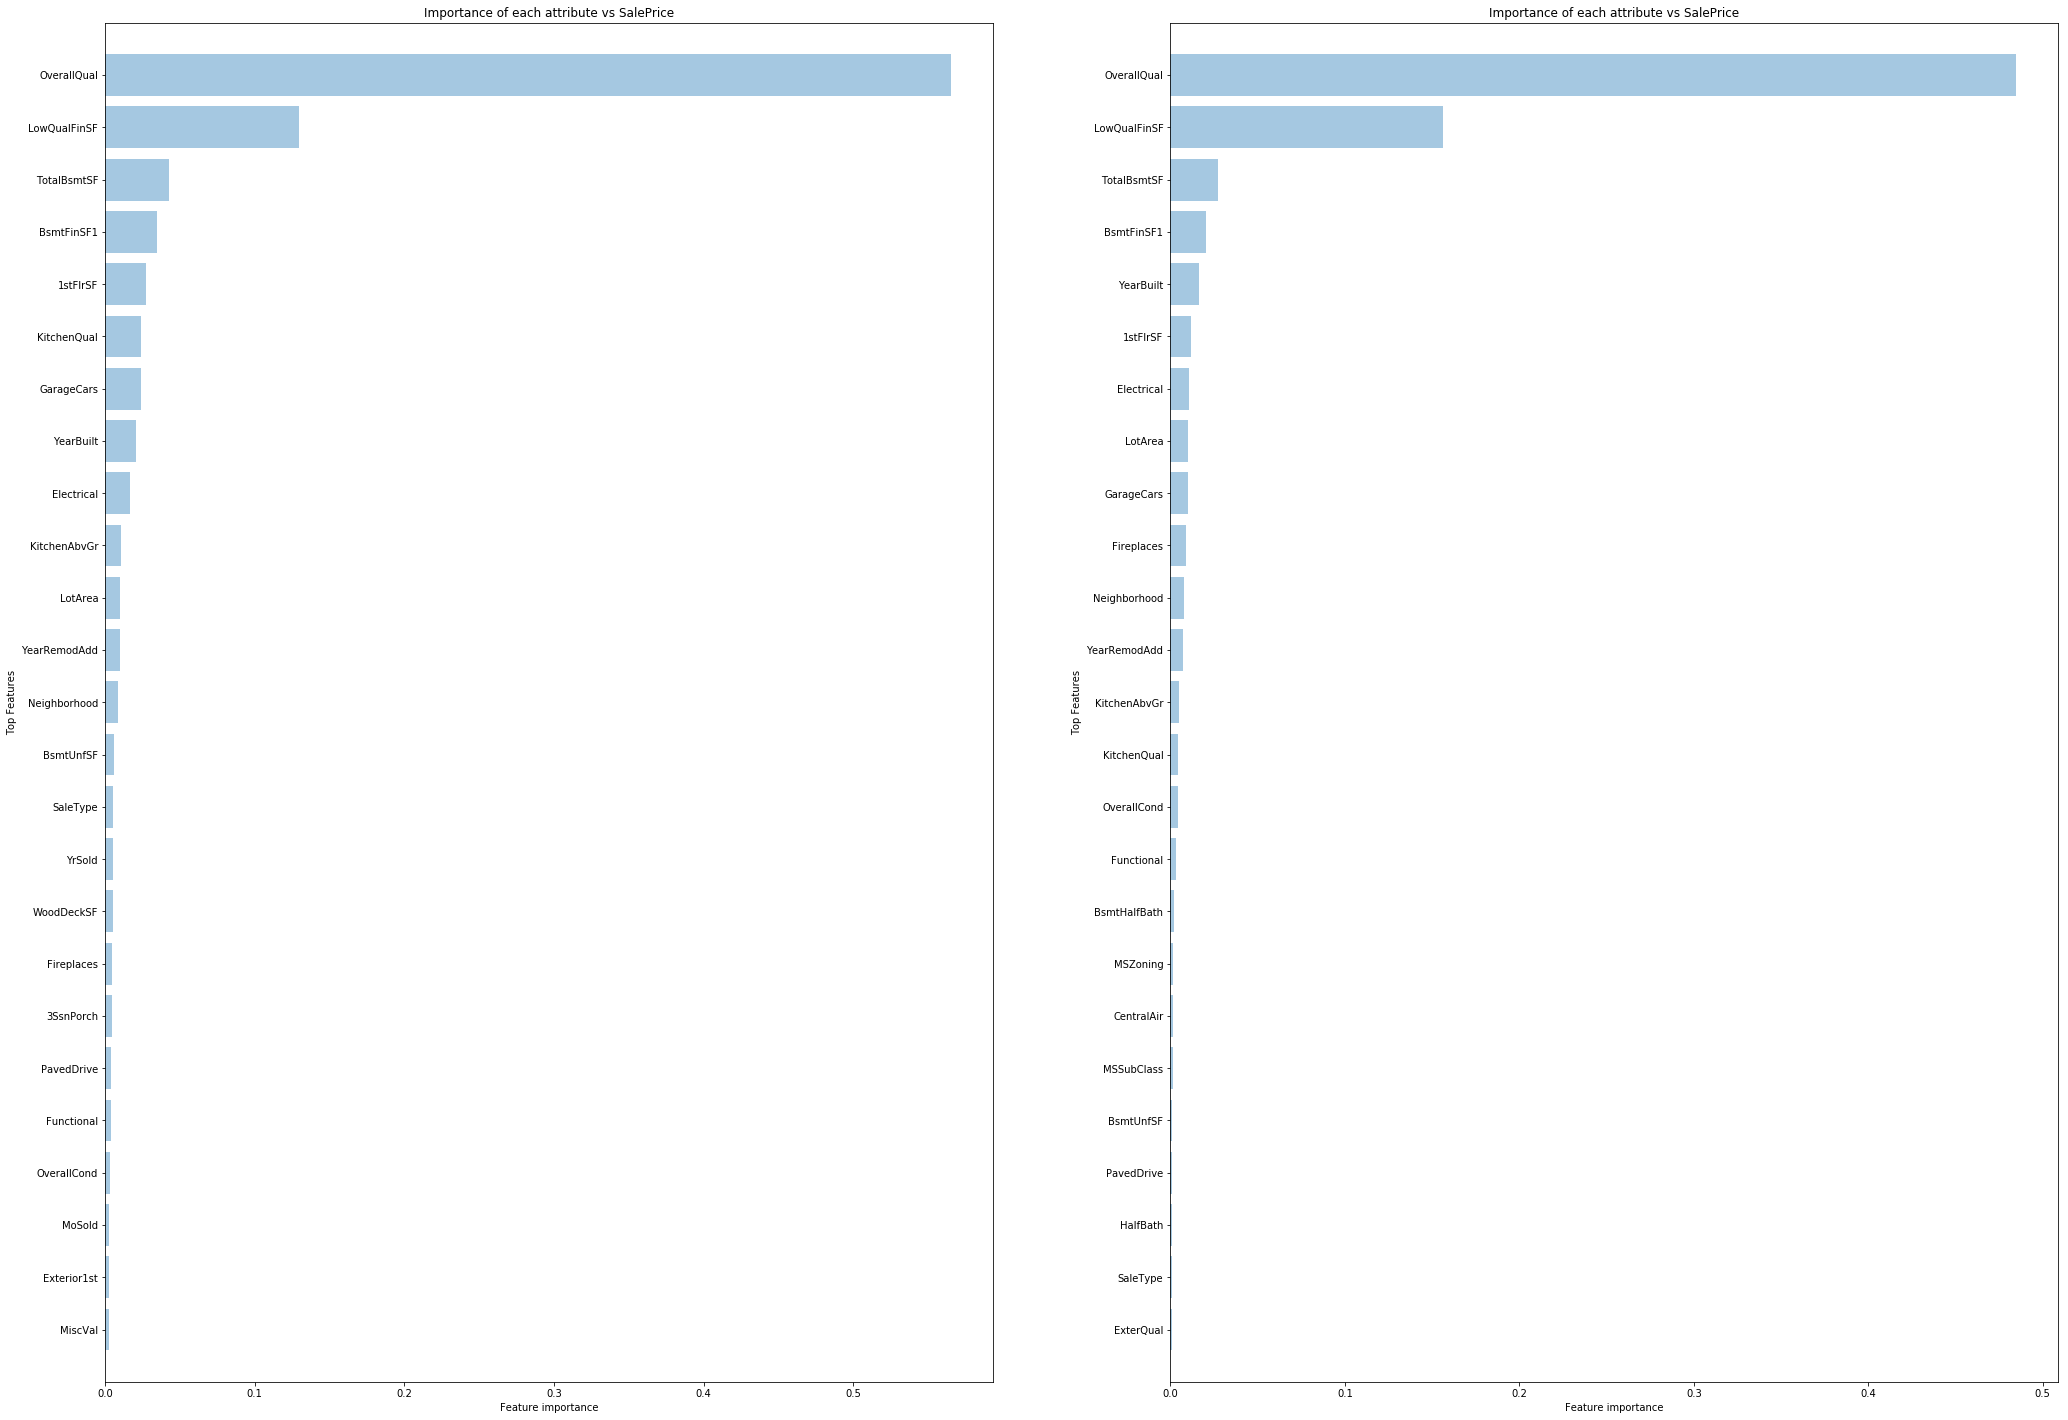

In [43]:
X = np.array(full_attributes_pandas_df.drop(['SalePrice'], axis=1).values)
Y = np.array(full_attributes_pandas_df['SalePrice'].values)

full_attribute_sorted_importances, full_attribute_sorted_importances2 = get_features_importances(X, Y, full_attributes)
plot_sorted_importances(full_attribute_sorted_importances, 
                        full_attribute_sorted_importances2, 
                        'Importance of each attribute in defining the SalePrice',
                        'Feature importance', 'Attributes with not null values')

Here we have two bar plots, both have been produced using a RandomForest model with two different approaches; the plot on the left is produced by simply using the RandomForest on the whole training set, the plot on the right, instead, is produced by cross-validating the scores on a number of different (100) random splits on the data.<br>
So on the x axis we have the 0to1 importance value, and on the y axis the selected attributes.

The results obtained by using the two approaches are pretty much the same: the features are more or less the same, with a different order.

By looking at the obtained results we can see one important thing which is really evident: only the first attributes have a significative output value with a feature importance value > 0.1.<br>
However we don't know yet how well they will perform at the end, so we are not sure about which is a "good importance value".

Among the resulting values we can see that we have done a good work in the cells above as most of the showed attributes are the ones we have selected as relevat features.<br>
However there are some exception: the algorithm is run on all the fully defined (and now mapped) attributes, so a total of 61 different features, and the top 25 have been selected. Among those 25 there are some that did not seem to be relevant to us, for example the WoodDeckSF, the OpenPorchSF or the BsmtUnfSF, but are (altough not much) important. So it is possible that not all of that we have manually guessed is 100% correct. Anyhow, we will try to build the models with both the configurations later on.

In [44]:
def plot_priceCorrelation(corr, attributes, figsize=(15,25)):
    plt.figure(figsize=figsize)
    bars = plt.barh(attributes, corr, align='center', alpha=0.4)
    for j in range(len(bars)):
        color = 'red'
        if corr[j] > 0:
            color = 'green'
        bars[j].set_color(color)

    plt.ylim([-1,len(attributes)])
    plt.xlabel('Correlation with SalePrice')
    plt.ylabel('Home attributes')
    plt.title('Correlation among home attributes and SalePrice')
    plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

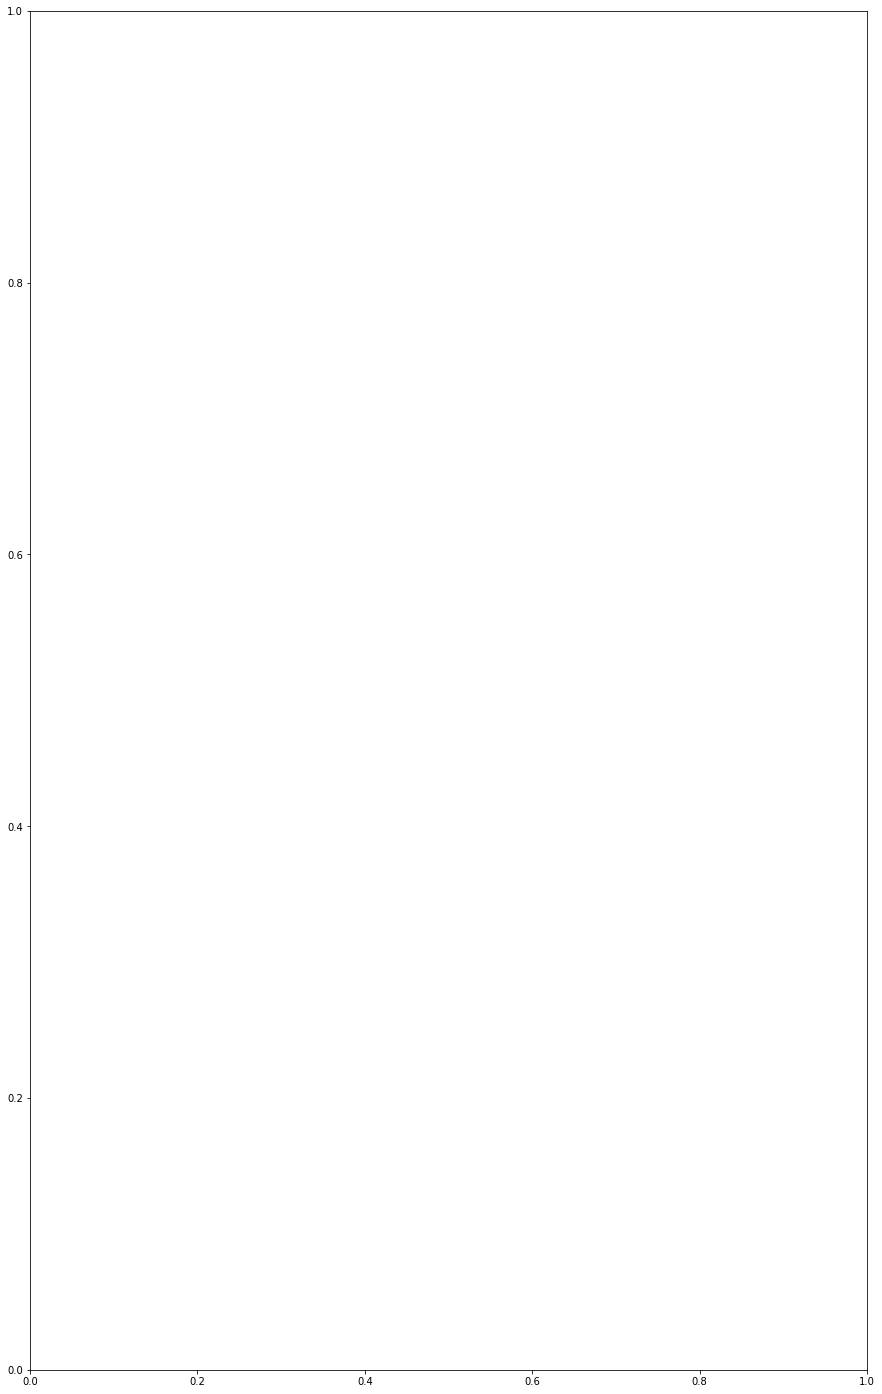

In [45]:
#Get only the correlations between each features that have a defined value for each row
#and the SalePrice, in order to understand how important they are in defining the SalePrice
salePrice_corr = full_attributes_corr['SalePrice'].tolist()[:-1]

# plot our findings
plot_priceCorrelation(salePrice_corr, full_attributes_test)

To conclude our analysis on the fully defined attributes, we have plotted a correlation barh plot of all the said features with the SalePrice, where on the x axis we have the correlation value, and on the y the attributes.

In this case we have represented the positive correlation in green and the negative correlation in red.<br>
NB: negative correlation does not mean a "not good" correlation, because a correlation close to -1 is as important as a positive 1 value.

Anyhow this plot is very important and clear, and suggests which are the features to be selected for testing the models, as it's easy to expect that the more the attributes are correlated with the price, the best those are for making predictions.

This correlation plot somehow confirms all of that we have said until now. The attributes with the higher correlation value are the ones selected by the random forest: OverallQual, GrLivArea, TotalBsmtSf, GarageCars and Area, 1st and 2nf FlrSF, KitchenQual, ExterQual and so on...<br>
And again, here we can see that there could be some error in the analysis we have manually made above, as some of the parameters we have selected as relevant have a poor correlation value: LandCountour, ExterCond, MSSubClass... and at the contrary, some of the attribute which seemed to be not relevant to us actually have an ~high (> .3) correlation value: Foundation, BsmtFinSF1, WoodDeckSF.

#### 1.2.2.5 Houses Attributes: Attributes with null values

At this point we move forward with the analysis on the dataset. Until now we have studied the first part of the training set: the fully defined attributes; now can study in the same way also the other 18 attributes: the ones with at least one NaN.

As before, we create a sub-dataframe with only those "non fully defined attributes" + SalePrice and Id.

In [46]:
not_full_attributes_df = df[not_full_attributes_test + ['SalePrice']]

In [47]:
print("Shape:", not_full_attributes_df.shape)
not_full_attributes_df.head(10)

Shape: (1200, 20)


,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SalePrice
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN,208500
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN,181500
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN,223500
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN,140000
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN,250000
5,85.0,NaN,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,1993.0,Unf,TA,TA,NaN,MnPrv,Shed,143000
6,75.0,NaN,Stone,186.0,Ex,TA,Av,GLQ,Unf,SBrkr,Gd,Attchd,2004.0,RFn,TA,TA,NaN,NaN,NaN,307000
7,NaN,NaN,Stone,240.0,Gd,TA,Mn,ALQ,BLQ,SBrkr,TA,Attchd,1973.0,RFn,TA,TA,NaN,NaN,Shed,200000
8,51.0,NaN,None,0.0,TA,TA,No,Unf,Unf,FuseF,TA,Detchd,1931.0,Unf,Fa,TA,NaN,NaN,NaN,129900
9,50.0,NaN,None,0.0,TA,TA,No,GLQ,Unf,SBrkr,TA,Attchd,1939.0,RFn,Gd,TA,NaN,NaN,NaN,118000


ValueError: could not convert string to float: 'Grvl'

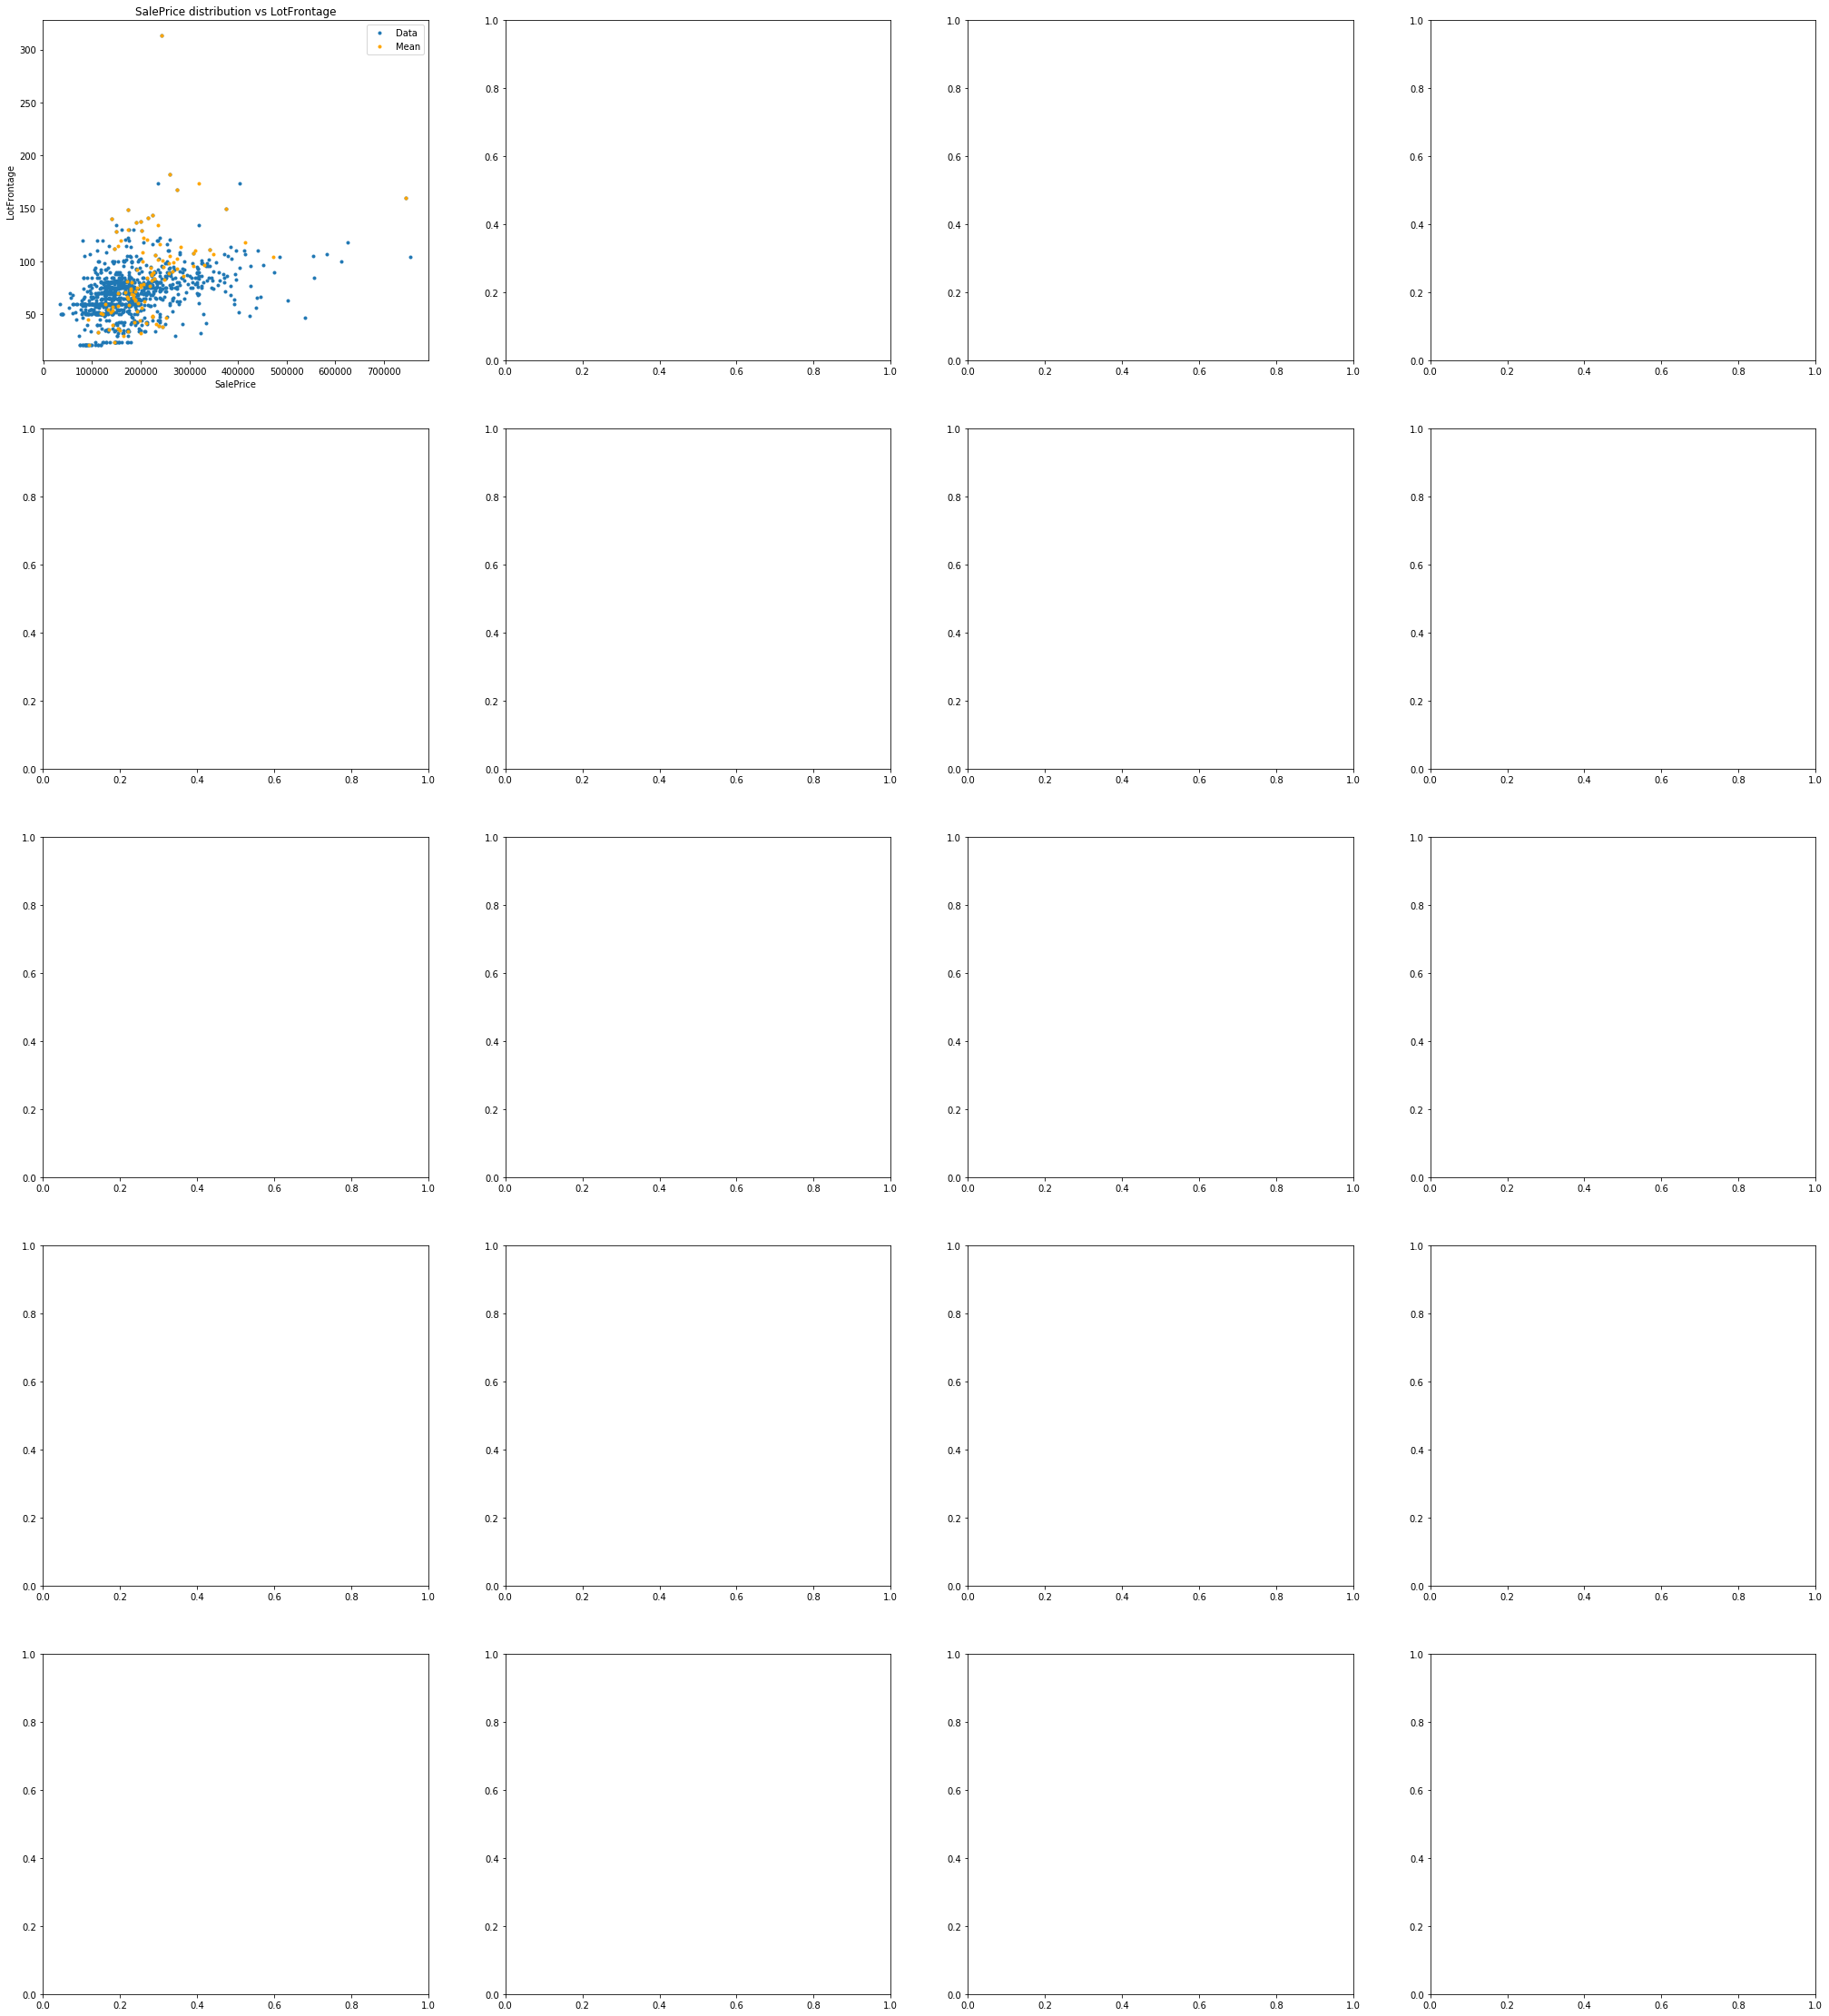

In [48]:
#Number of rows and columns for the grid of scatter plots
nr = 5
nc = 4

#Plot the distributions of SalePrice values over all features values
#This will allow us to undestand if there is a correlation among features and SalePrice
fig, axarr = plt.subplots(nr, nc, figsize=(35, 40))
for idx, attribute in enumerate(not_full_attributes_test):
    tmp_df = not_full_attributes_df.loc[df[attribute].notnull(), ['SalePrice', attribute]]
    x = tmp_df.values[:,0]
    y = tmp_df.values[:,1]
    axarr[idx//nc, idx%nc].plot(x, y, '.', label="Data")
    avgs = df.groupby([attribute])['SalePrice'].mean()
    axarr[idx//nc, idx%nc].plot(avgs.values, avgs.index.values, '.', color='orange', label='Mean')
    axarr[idx//nc, idx%nc].legend()
    axarr[idx//nc, idx%nc].set_title('SalePrice distribution vs '+attribute)
    axarr[idx//nc, idx%nc].set_xlabel('SalePrice')
    axarr[idx//nc, idx%nc].set_ylabel(attribute)
plt.tight_layout()
plt.show()

As we made before, we start the analysis with a scatter plot for each of the features; however here we have decided to plot categorical and numerical attributes all together because we have only a total of 18 parameters.

The main problem in this case is that we have a lot of NaN values for some attributes, and in that case it is not easy to come up with a conclusion on its importance by just looking at the plot.

Relevant feautures:
- **Alley**. It could be an important feature, and can influence a little the price. This is also confirmed by the plot above (the average values differs a lot from type to type).
- **MasVnrType**. Can make the difference as all the materials-related paramters, there are some more expensive than others, and can also influence the final choice (and the price as a consequence). The plot confirm our guess.
- **BsmtQual**. The quality of the basement is really important, and we can see an evident difference from type to type.
- **BsmtCond + BsmtExposure**. As before, it's important and we can see a correlation on the plot.
- **FireplaceQu**. Very important as it's related to fireplaces that demonstrated to be significant also during the analysis made above. From the plot we can see the correlation with the prices.
- **GarageType**. As before, this parameter is related to the garage, which was one of the most significant features above. Looking at the plot we can infer an existing correlation.
- **GarageFinish**. The plot suggests a correlation with the prices.
- **GarageQual**. As with all the "quality" related features this sounds important and its importance is confirmed by the plot trend, which seems to be very correlated with the price.
- **Electrical**: Electrical system of the house. It could be important as there are systems more expensive than others.
- **LotFrontage** (linear feet of street to the property). Intuitively not very interesting but the plot slightly suggests a correlation with the price.

<br>

Not relevant features:
- **MasVnrArea**. The plot is very sparse, and does not suggest an evident correlation with the price.
- **BsmtFinType1 + BsmtFinType2**. Not completely understood the meaning of those values, moreover there are a lot of "unfinished" values that we don't know how to manage. The plot does not seem to be relevant for the case.
- **GarageCond**. This was not expected. The garage appeared to be a relevant feature with all the analysis made until now, but the plot does not suggest a correlation (the distribution of the average values are really flat).
- **GarageYrBlt**. This feature has a similar distribution with respect to the YearBlt one. Its relevance is also confirmed by the plot where we can see that the SalePrice values are, on average, slightly higher for more recently built garages. However we decided to not include this feature as it has a trend exactly equal to the YearBlt attribute, so it would not bring anything new to the classification.
- **PoolQC**. Too few paramters to consider it a relevant one. It could have been very important, but apparently there are few houses with a pool.
- **MiscFeatures**. Miscellaneus features. Could be relevant (for example for the cases with the tennis court), but there are too few attributes, and there is the "other" category that does not suggest anything.
- **Fence**. Intuitively not very important, and also from the trend we cannot see a well defined correlation

All those paramters have to be evaluated again, by a "numerical" point of view: we need to manage the "NaN" cases and decide what to do.

One additional analysis that can be done is to show the difference between the price when the attribute is NaN and when it is not. So we want to show the average sale price in both cases for each attribute.

In [50]:
#For each not fully defined feature compute two means of SalePrice values:
#1 considering only the rows that have that features defined
#1 considering only the rows that do not have that features defined
#This is useful to understand how important is the definition of these features in defining the SalePrice value
means_notNull = []
means_null = []
for attribute in not_full_attributes_test:
    means_notNull.append(not_full_attributes_df.loc[df[attribute].notnull(), ['SalePrice', attribute]]['SalePrice'].mean())
    means_null.append(not_full_attributes_df.loc[df[attribute].isnull(), ['SalePrice', attribute]]['SalePrice'].mean())

#For each mean of each feature show the percentage of values over which the mean mean was computed
percentages = [counts_not_null[np.where(df.columns.values[1:-1] == attribute)] for attribute in not_full_attributes_test]

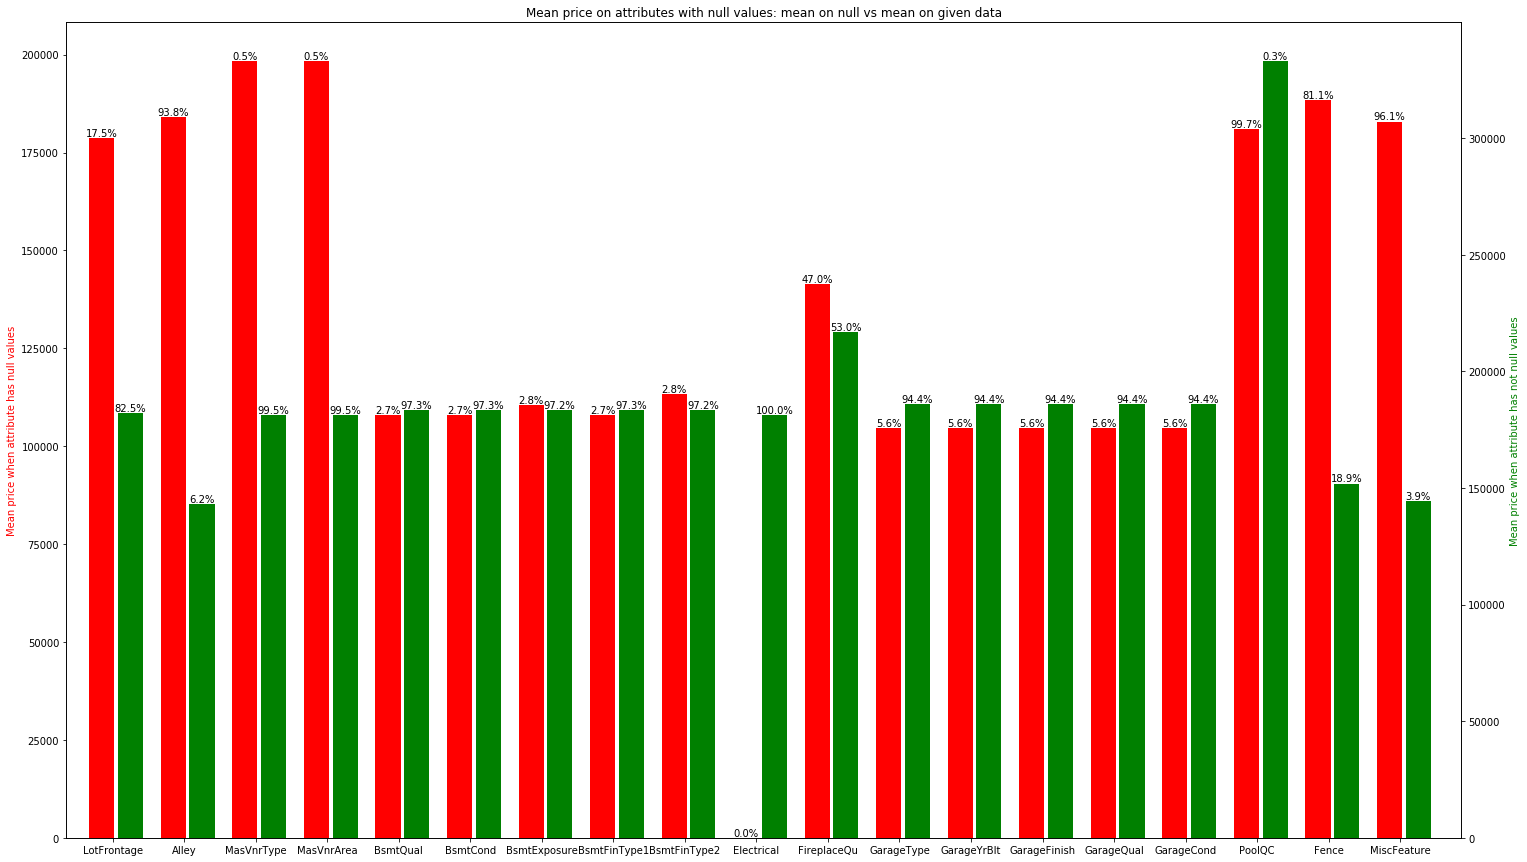

In [51]:
# PLOT the two computed means for each not fully defined features 
fig, ax = plt.subplots(figsize=(25, 15))
bar1 = ax.bar(range(len(means_null)), means_null, 0.35, color="r")
ax.set_ylabel("Mean price when attribute has null values", color="r")
for idx, rect in enumerate(bar1):
    h = rect.get_height() if not math.isnan(rect.get_height()) else 0
    plt.text(rect.get_x()+rect.get_width()/2, h, "%.1f%%" % ((1200-percentages[idx])*100/1200), ha='center', va='bottom')
    
ax2 = ax.twinx()

bar2 = ax2.bar([x+0.4 for x in range(len(means_notNull))], means_notNull, 0.35, color="g")
ax2.set_ylabel("Mean price when attribute has not null values", color="g")
for idx, rect in enumerate(bar2):
    h = rect.get_height() if not math.isnan(rect.get_height()) else 0
    plt.text(rect.get_x()+rect.get_width()/2, h, "%.1f%%" % ((percentages[idx])*100/1200), ha='center', va='bottom')

plt.xticks([x+0.15 for x in range(len(means_notNull))], not_full_attributes_test)
plt.xlim([-0.5,len(bar1)])
plt.title("Mean price on attributes with null values: mean on null vs mean on given data")
plt.show()

We have produced this "twin bar plot": on the x axis there are the not fully defined attributes; on the y, instead, there are the two averages of sale price: the red is the average when the attribute is NaN, the green is the average when the attribute is defined.<br>
Moreover, on the top of each bar we have appended the percentage of null/not null values: the total number of rows on which the average is computed.

The goal of this analysis is to see whether the presence or the absence of a certain value (for example the Pool) might have influenced the final price. For example we may expect that if an house has the Pool, this house will cost more than the houses that do not.

However there are cases in which the average is computed on a too low number of samples, and the obtained result is not reliable; those are for example MasVnrType, MasVnrArea, PoolQC, MiscFeatures... in practice those with a too unbalanced number of samples (> 90% on one side).

Obviously there is no red column for the attribute 'Electrical' because we are doing the average on the sale prices (so on the training set), and as we have seen above, the training set does not contain any NaN value for this feature (while the test set does).

In [52]:
percentages = [counts_not_null_X[np.where(X_df.columns.values == attribute)[0][0]] for attribute in not_full_attributes_X]
top_missing_data = [(perc, col) for perc, col in sorted(zip(percentages, not_full_attributes_X))]
for i in range(len(top_missing_data)):
    print(top_missing_data[i][1], "%d: %.1f%%" % (1460-top_missing_data[i][0], (1460-top_missing_data[i][0])*100/1460))

PoolQC 1453: 99.5%
MiscFeature 1406: 96.3%
Alley 1369: 93.8%
Fence 1179: 80.8%
FireplaceQu 690: 47.3%
LotFrontage 259: 17.7%
GarageCond 81: 5.5%
GarageFinish 81: 5.5%
GarageQual 81: 5.5%
GarageType 81: 5.5%
GarageYrBlt 81: 5.5%
BsmtExposure 38: 2.6%
BsmtFinType2 38: 2.6%
BsmtCond 37: 2.5%
BsmtFinType1 37: 2.5%
BsmtQual 37: 2.5%
MasVnrArea 8: 0.5%
MasVnrType 8: 0.5%
Electrical 1: 0.1%


Here we have the complete list of not fully defined attributes with the number and the percentage of missing data.

We can see that some attributes have a really high percentage of missing data: there are four cases (PoolQC, MiscFeature, Alley and Fence) in which the percentage of missing values is greater than 80%! For those attributes it could be not easy to draw conclusions.<br>
Then we have FireplaceQu, which has more or less half of missing values.<br>
And then there are all the other attributes which have a percentage of missing values lower than 20%.

Another interesting thing to notice is that the percentage of NaN for all the Garages attributes is the same; and the same thing can be said for the Bsmt, or for the MasVnr.

However, those percentages (and so, null values) do not represent real missing values: in fact, it is not an error that those information are not into the dataset. The reason of all those nulls, in fact, is that the attribute we are considering is really **missing in the house!**<br>
It is not surprising, for example, that the vast majority of the houses we are considering do not have a pool. As we have seen above, only 4 of the 1200 considered rows has an entry for this attribute.<br>
The same thing can be said for the Fence, or for the missing values in Garage.

This explains also the fact that the percentage of missing values for the garages, the basements and the masvnr, is the same for each category: if an house has not the garage, it's easy to expect that all the garage-related features will have a NaN value for that entry.<br>
In order to confirm this guess, we will plot a set of scatter to show the id of the missing values in each case.

In [53]:
def scatter_plot_ids(attributes, figsize=(20, 10)):
    nr = len(attributes)
    nc = 1

    fig, axarr = plt.subplots(nr, nc, figsize=figsize)
    for idx, attribute in enumerate(attributes):
        indexes = df.loc[df[attribute].isnull(), ['Id']].values.T[0]
        axarr[idx].plot(indexes, [1]*len(indexes), '.', label="Data")
        axarr[idx].set_title('SalePrice distribution vs '+attribute)
        axarr[idx].set_xlabel('SalePrice')
        axarr[idx].set_ylabel(attribute)
    plt.tight_layout()
    plt.show()

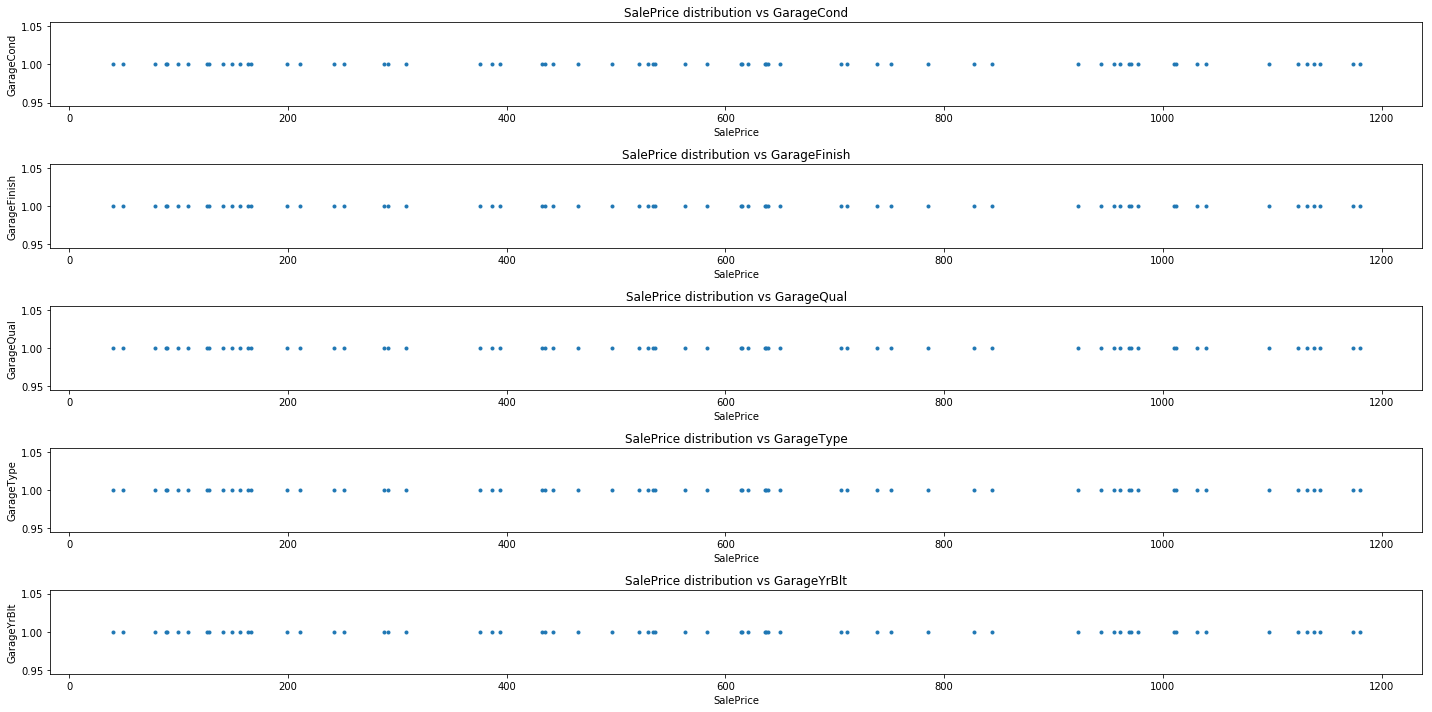

In [54]:
scatter_plot_ids(['GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt'])

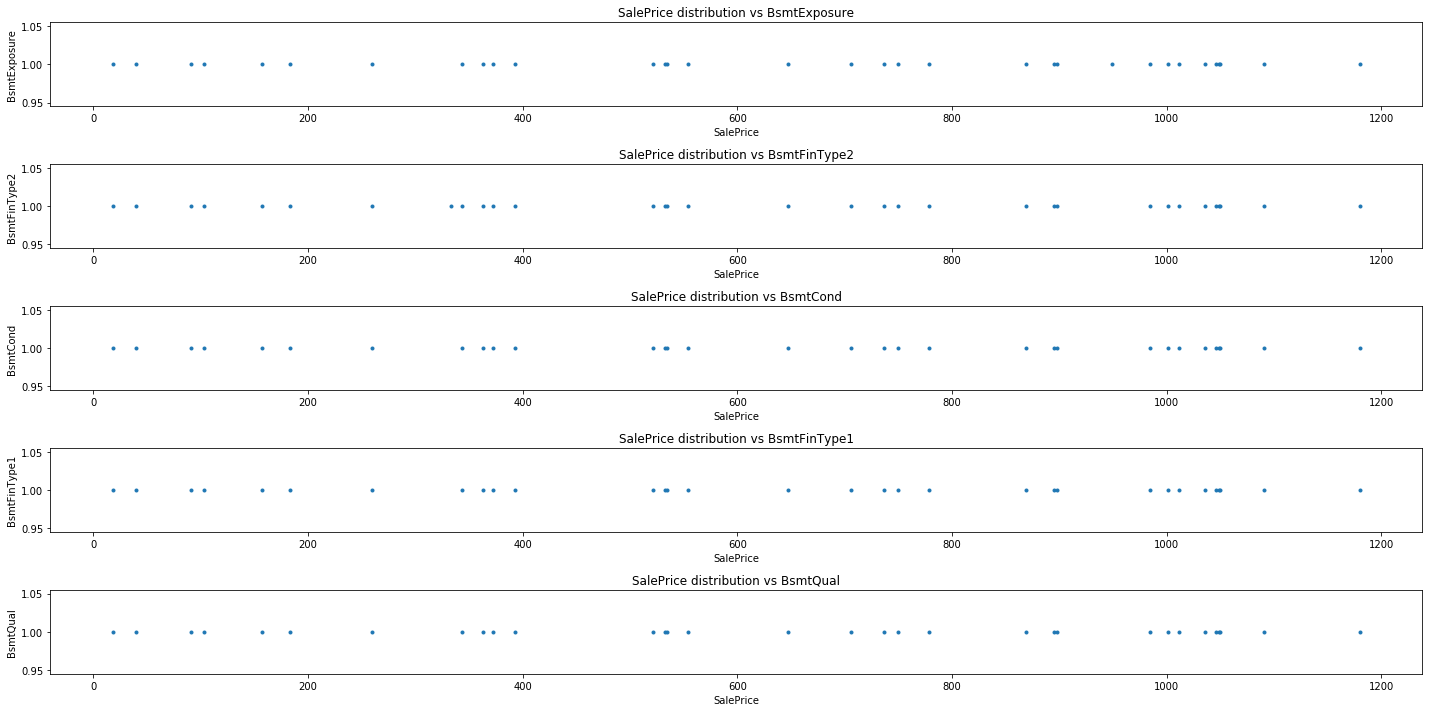

In [55]:
scatter_plot_ids(['BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtFinType1', 'BsmtQual'])

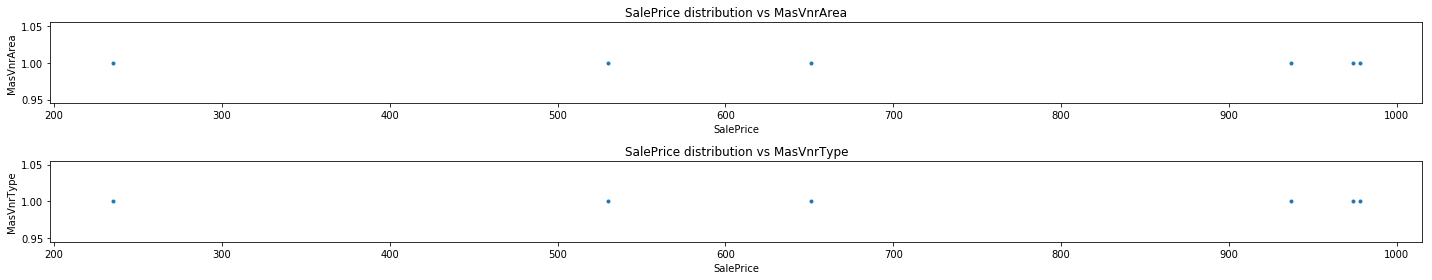

In [56]:
scatter_plot_ids(['MasVnrArea', 'MasVnrType'], figsize=(20, 4))

Those plots confirm our guess: the missing values are exactly the same for each category of features (garage, masvnr and basement). This can be easily spotted by looking at the plots: we have plotted one scatter-plot for each id (1 to 1200) in case of missing value (on the x axis there are the ids), and it is easy to see that the ids are exactly the same in all the cases.

Now that we have better understood the situation, it arises another problem: how to deal with the missing values.<br> Obviously having missing values in the dataframe is a problem for our system and for the models we will use later on; so we have to find a way to "fill the gap". This kind of discussion will be done in the following section (2.0 - Cleaning).

#### 1.2.2.6 Houses Attributes: Correlation

In the same way we did for the fully defined attributes, also in this case we want to plot the correlation map and the correlation barh for the features we are analyzing.

Also in this case we first need to map the data to integer.

For now we are still in an analysis phase, and the correlation matrix can be computed also with null values inside the dataset, so we just need to map to integer all the defined values for the categorical features.

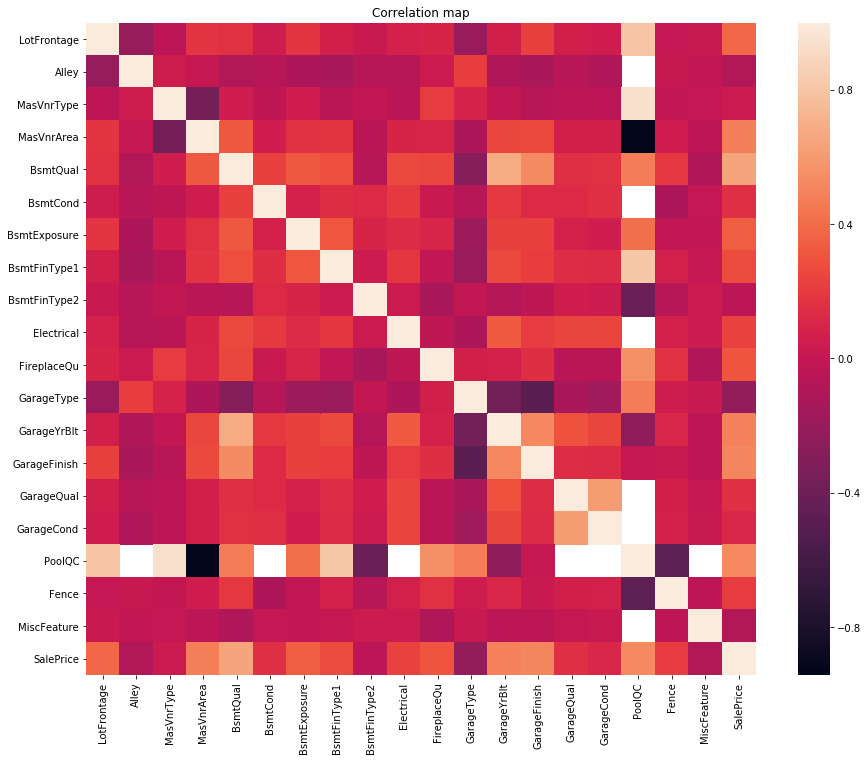

TypeError: unsupported operand type(s) for -: 'str' and 'float'

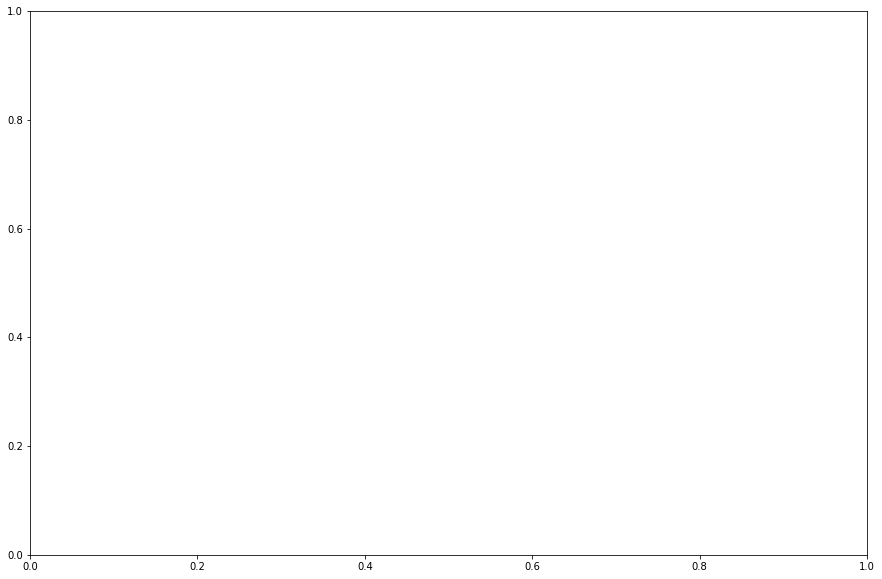

In [57]:
#### CATEGORICAL FEATURES MAPPING ####

### NOT ORDINAL
# attributes without any ordinal relation among their values
categorical_non_ordinal_features = ['Alley', 'MasVnrType', 'GarageType', 'MiscFeature', 'MSSubClass']


### ORDINAL
# attributes with an ordinal relation among values
categorical_ordinal_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
                                'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']
# for the ordinal attributes a manual mapping is required
dicts = [
    {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}, #bsmtqual
    {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}, #bsmtcond
    {'Gd':3, 'Av':2, 'Mn':1, 'No':0}, #bsmtexposure
    {'GLQ':5, 'ALQ':4, 'BLQ':3, 'Rec':2, 'LwQ':1, 'Unf':0}, #bsmtfintype1
    {'GLQ':5, 'ALQ':4, 'BLQ':3, 'Rec':2, 'LwQ':1, 'Unf':0}, #bmstfintype2
    {'SBrkr':4, 'FuseA':3, 'FuseF':2, 'FuseP':1, 'Mix':0}, #electrical
    {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}, #fireplacequ
    {'Fin':2, 'RFn':1, 'Unf':0}, #garagefin
    {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}, #garagequal
    {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}, #garagecond
    {'Ex':3, 'Gd':2, 'TA':1, 'Fa':0}, #poolqc
    {'GdPrv':3, 'MnPrv':2, 'GdWo':1, 'MnWw':0} #fence
]

# map to integers
not_full_attributes_df_ = mapToIntegers(not_full_attributes_df.copy(),
                                      categorical_ordinal_features,
                                      categorical_non_ordinal_features,
                                      dicts)
not_full_attributes_df_corr = not_full_attributes_df_.corr()
heat_map(not_full_attributes_df_corr, 'Correlation map')
salePrice_corr = not_full_attributes_df_corr['SalePrice'].tolist()[:-1]
plot_priceCorrelation(salePrice_corr, not_full_attributes_test, figsize=(15, 10))

By looking at the produced correlation-plots we can see that there are important parameters that we do not want to lose.

The correlation matrix suggests very high correlation values for the PoolQC with the other attributes; however, this was also the features with less values (only 4), so the result we got for that row is not reliable enough to be considered trustworthy.<br>
What is instead interesting to notice is the pretty high correlation (~0.5) existing between the BsmtQual vs the GarageYrBlt and the GarageFinish attributes; this is quite unexpected and is useful to know for future analysis.

Again, the most important correlation values are those reported in the barh plot, so those towards the sale price. Here we can see that some of the attributes are really important and should be kept in mind when doing the selection and building the model later on. Among the most correlated ones we can underline for sure BsmtQual, GarageFinish and GarageYrBlt, which all have a correlation values greater than 0.5. Again, despite the high correlation value for PoolQC, the number of missing data is too high for considering it as a indicative parameter.

# 2.0. Cleaning Data

Goal of this section is to define a set of functions that can be easily used later on to clean the dataset and build the final set of values that will be used during the modeling phase.

The section is organized as follow:
* Dealing with NaN
* Mapping to Integers
* Features Selection
* Feature Engineering

## 2.1 Dealing with NaN

At this point we want to rebuild the entire dataframe, and to apply an initial "cleaning" on the null values.

As seen above during the analysis phase, for some values 'NaN' means that the attribute effectively is not part of the house (eg. FireplaceQu, if there is not a fireplace into the house, it's obvious that we have a null into the related quality attribute). A good idea in that case is to map the NaN values to a fixed, new categorical value which indicates the fact that the house does not have that attribute; in this case we have chosen the string 'NA'. We believe, in fact, that the absence of a certain feature has to be considered when making the analysis and the prediction, because the absence of a Fireplace or the presence of a Pool, might influence the final price. (We will go deeper into this in the 'Feature Engineering' section.)

However, for the numerical attributes the things are not exactly like that. If we have a float or an int as type of a certain feature, we cannot just substitue the string 'NA' to that feature, because we would change the type of the attribute itself, and, moreover, we may want to preserve the numerical realations existing among the values.<br>
A perfect example for that is the GarageYrBlt attribute, which contains integer values that represents the year of building of the garage. As we have seen above, there are houses that do not have any garage, so NaN values have to be mapped in some way for this parameter. Chosing the string 'NA' is not a good idea if we don't want to change the type of the attribute to string (and then remap all the strings to new integers, in particular because in this case we may want to preserve the years' relation). In the same way we cannot chose to put a 0 in place of the NaN because otherwise the model would learn that a certain garage has been built in the year 0. So the best idea in this case is to map the missing value to the mode or the median of the entire dataset, in order to solve every type-related or semantic problem.

In [58]:
print(not_full_attributes_df.columns)

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature', 'SalePrice'],
      dtype='object')


So first of all, as said above, we can simply map to 'NA' all the categorical attributes'NaNs, which are: Alley, FireplaceQu, GarageType, GarageFinish, GarageQual, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2,
GarageCond, PoolQC, Fence, MiscFeature.

Then we can fill the nan for the others by computing the mode or the median of all the values in the given column.

We have to fill: LotFrontage, MasVnrArea, GarageYrBlt, MasVnrType and Electrical. The first three are numerical attributes, the last two are categorical, but the first is a "special one": here we have a real case of missing values! And the second has NaN values in the test set only.

MasVnrType and MasVnrArea indicate respectively the masonry veneer type and area. In both cases, among the values that the attribute can assume, we have None (for the type) and 0 (for the area), which are the values that the attribute assumes when there is no masonry at all.<br>
So, in this case, it would be an error to add a new attribute 'NA' if we consider that there is already one value that indicates the missing masonry. If we consider that, we can easily understand that in this case we are really missing an information! So for it is a good idea to use the mode/median also in this case to fill up the gap.

Electrical, instead, is the only feature which was having NaN values in the testset and not in the training set. We belive that the NaN is not a missing values (as it is for MasVnrX) but it represents the fact that the house has not an electrical system yet; in this case the price might change. The problem is that we do not have this kind of information in the training set, and we cannot be sure about that; for this reason, we prefer to fill it with its mode.

In [59]:
def fill_nan(df):
    # fill the categorical attributes with 'NA'
    df = df.fillna({'Alley':'NA', 
                    'FireplaceQu':'NA',
                    'GarageType':'NA',
                    'GarageFinish':'NA',
                    'GarageQual':'NA',
                    'BsmtQual':'NA',
                    'BsmtCond':'NA',
                    'BsmtExposure':'NA',
                    'BsmtFinType1':'NA',
                    'BsmtFinType2':'NA',
                    'GarageCond':'NA',
                    'PoolQC':'NA',
                    'Fence':'NA',
                    'MiscFeature':'NA'})
    # fill the other attributes with mode and median
    # median
    df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
    # mode
    df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
    return df

So, considering the type of the given attributes, we have used the mode for the MasVnrType (categorical) and the median for the others (numerical).

A special discussion can be made for the LotFrontage attribute. In this case, instead of simply computing the median on the whole dataset (as instead we have done for the other two), we have used the median computed on subgroups: the neighborhoods. This choice has been made because usually the area and the appearence of the frontage of an house is likely to be similar to those in the same neighborhood. So missing values are substitued with the median computed on the LotFrontage values belonging to the same neighborhood.

In [60]:
complete_df = fill_nan(X_df)

A good idea in this case is to run the fill_nan function on the whole dataset: training + test. We have to do that because we want to fill the nan also in the test set, in order to run the final model on it, but this has also the advantage of producing a more accurate mode and median as those are computed on more data.

So we have produced a "complete dataframe" which will be our starting point for what follows.

## 2.2 Dealing with outliers

In [61]:
import warnings
warnings.filterwarnings("ignore")

One important part of this analysis regards the outliers.

The most important thing to consider at this point is the fact that we don't want to look at the outliers also in the testset. We cannot remove any row from it as we have to produce a sale price prediction for each entry. So this study analysis has to be made on the training part only; so first of all we need to filter out the test set from the complete dataframe created above.

In [62]:
# get the first 1200 rows of the filled dataframe to obtain the training set
train_complete_df = complete_df.iloc[:1200]
# and add the sale price column
train_complete_df['SalePrice'] = df['SalePrice']
# show the results
train_complete_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,8,2007,WD,Normal,307000
7,8,60,RL,80.0,10382,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,1,2008,WD,Normal,118000


We can see that the operation above has been effective as we have the original training set (1200x81) with filled NaN.

When we started analyzing the dataset, we have seen that, by looking at the sale price only, there was no evident outlier (the prices of the houses are in the norm, and apparently there is no too high or too low value).

Now, we want to repeat this analysis on some of the attributes we have studied in the previous sections with the goal of eventually finding and removing some values.

With this purpose, we have decided to analyze all the remaining **numerical** features. Making a box plot for each categorical values, in fact, would be useless because of the limited number of values.

In [63]:
# utility function to plot the boxes for finding out the outliers
def plot_boxes(df, features, nr, nc, figsize = (20, 15)):
    fig, axarr = plt.subplots(nr, nc, figsize=figsize)
    for i, c in enumerate(features):
        if nr != 1:
            ax = axarr[i//nc, i%nc]
        else:
            ax = axarr[i]
        ax.boxplot(df[c].values, vert=True, patch_artist=True)
        ax.set_title('Box plot '+ c)
    plt.tight_layout()
    plt.show()

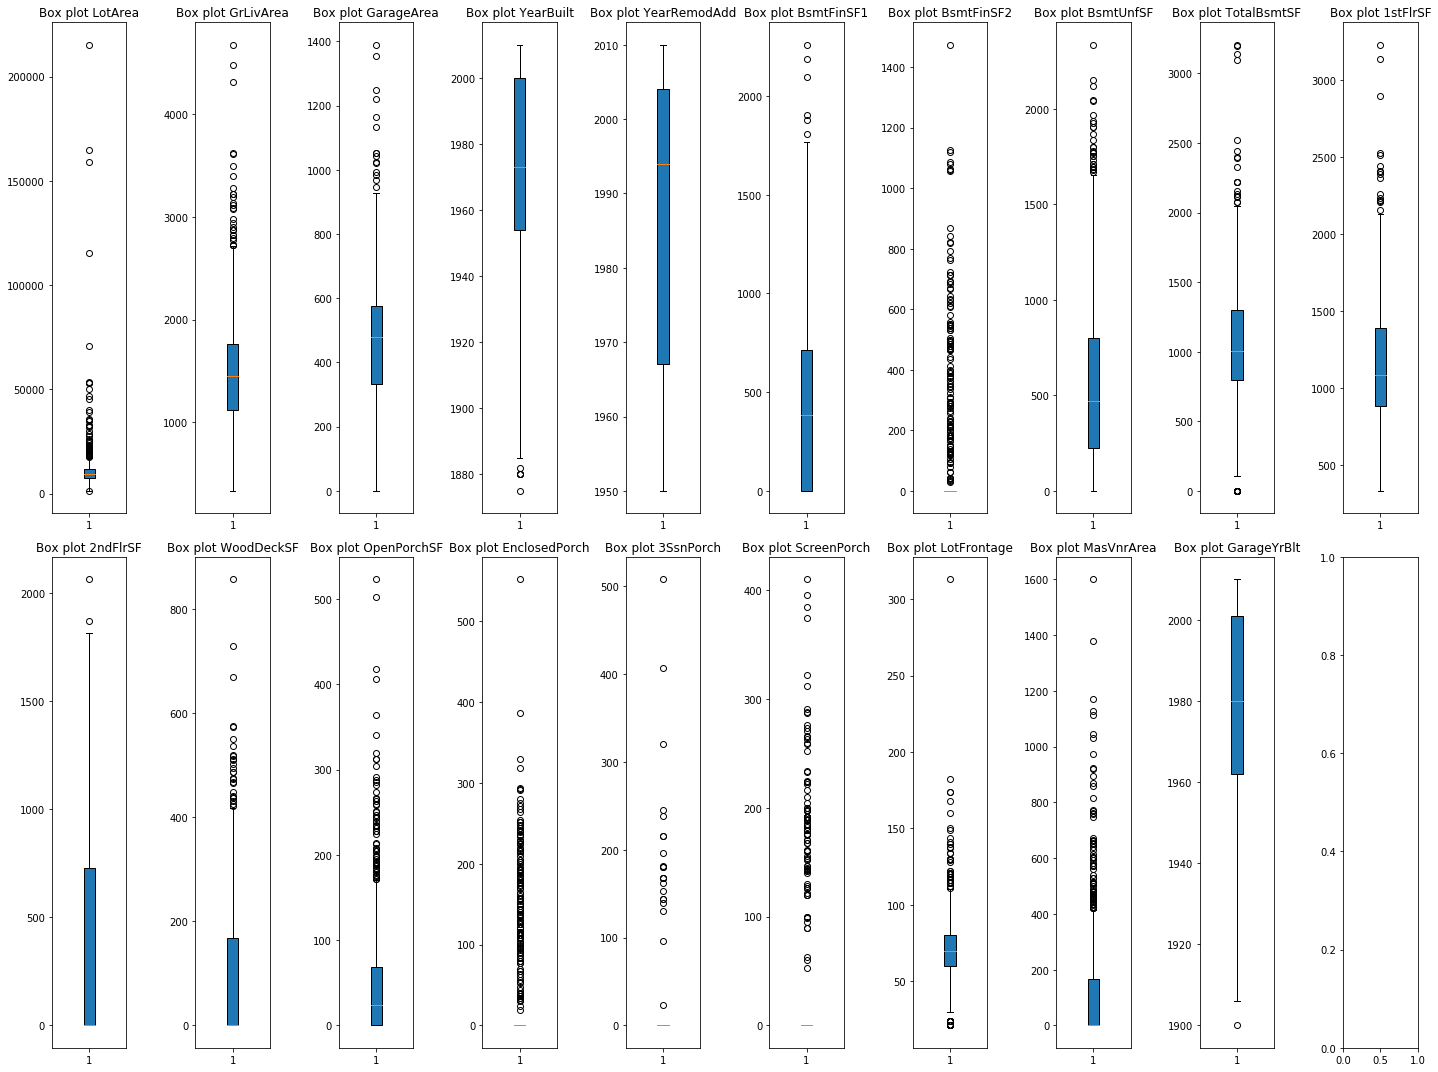

In [64]:
# array with all the numerical features of the dataset
numerical_features = ['LotArea', 'GrLivArea', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 
                      'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
                      '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                      'ScreenPorch', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']
# plotting 2x10 cells; needed space for 19 attributes
plot_boxes(train_complete_df, numerical_features, nr=2, nc=10, figsize=(20, 15))

At a first glance all the cases with a lot of "null values" jump right out at us: it is the case of LotArea, EnclosedPorch, 3SsnPorch, BsmtFinSF2 and ScreenPorch. All those attributes have a large amount of zeroed cases, which implies the box plots to be "without box" (in practice it is just too little to be seen, at zero).

Anyhow, what we are really interested to discover is the eventual presence of values which are too far from the others. One evident case for this is in the LotFrontage: for that particular attribute all the values are below 200, but there is only one which is far at 300, and this is probably a good indication for an outlier. This element will be removed.

We have decided to remove what follows:
* LotFrontage: one value > 300
* LotArea: the four values > 10000
* BsmtFinSF2: one value after 1400
* EnclosedPorch: one value after 500

In [65]:
def remove_outliers(dataframe, verbose=True):
    cleaned_df = dataframe[(dataframe['LotArea'] < 100000) &
                           (dataframe['LotFrontage'] < 300) &
                           (dataframe['BsmtFinSF2'] < 1400) &
                           (dataframe['EnclosedPorch'] < 500)
                          ]
    print("Deleted", dataframe.shape[0]-cleaned_df.shape[0], "rows")
    return cleaned_df

In [66]:
train_cleaned_df = remove_outliers(train_complete_df)
print("Shape:", train_cleaned_df.shape)

Deleted 7 rows
Shape: (1193, 81)


Now we can rebuild the original dataframe with the test set and create a new "complete" dataframe: the "cleaned df".

In [67]:
cleaned_df = train_cleaned_df.drop(['SalePrice'], axis=1).append(complete_df.iloc[1200:])
cleaned_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,12,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,8,2007,WD,Normal
7,8,60,RL,80.0,10382,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,1,2008,WD,Normal


As we can see, we have a new cleaned dataframe, with a number of rows lower than the original 1460. One problem that is evident by looking at the table above is the fact that there are still all the categorical attributes with their string values; as said above this is a problem for our models and those have to be mapped to numerical values.

## 2.3 Mapping to Integers

In [68]:
numerical, categorical = get_attributes_by_type(cleaned_df)
print(len(numerical), numerical)
print(len(categorical), categorical)

37 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
43 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual'

In [69]:
### COMPLETE MAPPING ###

# non ordinal
categorical_non_ordinal_features = ['MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood',
                                    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
                                    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating',
                                    'CentralAir', 'SaleType', 'SaleCondition', 'Alley', 'MasVnrType',
                                    'GarageType', 'MiscFeature', 'MSSubClass']

#ordinal
categorical_ordinal_features = ['LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 
                                'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive',
                                'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                                'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
                               'Fence']
dicts = [
    {'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0}, #lotshape
    {'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0}, #utilities
    {'Gtl':2, 'Mod':1, 'Sev':0}, #landslope
    {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}, #exterqual
    {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}, #extercond
    {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}, #heatingQC
    {'SBrkr':4, 'FuseA':3, 'FuseF':2, 'FuseP':1, 'Mix':0}, #electrical
    {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}, #kitchenqual
    {'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0}, #functional
    {'Y':2, 'P':1, 'N':0}, #paveddrive
    {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}, #bsmtqual
    {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}, #bsmtcond
    {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0}, #bsmtexposure
    {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}, #bsmtfintype1
    {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}, #bmstfintype2
    {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}, #fireplacequ
    {'Fin':3, 'RFn':2, 'Unf':1, 'NA':0}, #garagefin
    {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}, #garagequal
    {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}, #garagecond
    {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'NA':0}, #poolqc
    {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0} #fence
]

Here we have the complete version of lists and maps we need for managing the mapping.

As seen also during the analysis phase, we have manually managed those structures because we needed to manually take care of the ordinal relations existing between the ordinal values: the arrays of dictionaries contains the stringtToInteger mapping for each of the categorical features present into the related list; in this way we can easily manage the ordinal relations between the categorical values when mapping.

All the attributes present in the "non_ordinal" list, instead, will be automatically converted to numerical values by using the "Pandas label encoding": the attributes are first converted to the type 'category', and then to numerical values by using the cat code accessor. The nice aspect of this approach is that you get the benefits of pandas categories (compact data size, ability to order, plotting support) but can easily be converted to numeric values for further analysis. Label encoding has the advantage that it is straightforward but it has the disadvantage that the numeric values can be “misinterpreted” by the algorithms: in the same way we have manually converted the ordinal values as increasing integers, we will convert the non ordinal features using cat code, and an unwanted numerical relation will be introduced. The solution at this problem will be presented in the following "feature engineering" section.

Now first of all, we want to apply the described "mapToInteger" function (defined during the analysis phase) at both the complete and the cleaned dataframes. In fact, we want to preserve both the dataframes in order to test and apply our models on both the cases.

In [70]:
complete_df = mapToIntegers(complete_df.copy(), categorical_ordinal_features, categorical_non_ordinal_features, dicts)
cleaned_df = mapToIntegers(cleaned_df.copy(), categorical_ordinal_features, categorical_non_ordinal_features, dicts)
print("Complete df:", complete_df.shape)
print("Cleaned df:", cleaned_df.shape)

Complete df: (1460, 80)
Cleaned df: (1453, 80)


In [71]:
complete_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,5,3,65.0,8450,1,1,3,3,3,...,0,0,0,0,1,0,2,2008,8,4
1,2,0,3,80.0,9600,1,1,3,3,3,...,0,0,0,0,1,0,5,2007,8,4
2,3,5,3,68.0,11250,1,1,2,3,3,...,0,0,0,0,1,0,9,2008,8,4
3,4,6,3,60.0,9550,1,1,2,3,3,...,0,0,0,0,1,0,2,2006,8,0
4,5,5,3,84.0,14260,1,1,2,3,3,...,0,0,0,0,1,0,12,2008,8,4
5,6,4,3,85.0,14115,1,1,2,3,3,...,0,0,0,3,3,700,10,2009,8,4
6,7,0,3,75.0,10084,1,1,3,3,3,...,0,0,0,0,1,0,8,2007,8,4
7,8,5,3,80.0,10382,1,1,2,3,3,...,0,0,0,0,3,350,11,2009,8,4
8,9,4,4,51.0,6120,1,1,3,3,3,...,0,0,0,0,1,0,4,2008,8,0
9,10,14,3,50.0,7420,1,1,3,3,3,...,0,0,0,0,1,0,1,2008,8,4


Here we have just shown the top 10 lines of the mapped complete dataframe to check the effectiveness of the mapping. It's possible to see that there are no strings or categorical values, but only integers.

# 3.0. Feature Engineering

For making predictions the only things we dispose of are the features. Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work.

The section is organized as follow:
* **Feature extraction**: adding new features by combining two or more existing features of the dataset
* **Feature transformation**: transforming existing features values to new sets of values in order to simplify or improving the classification process
* **Feature selection**: selecting and filtering the most important features that can be used when making the classification
* **One-Hot encoding**: eliminating existing features for creating new ones

## 3.1 Feature extraction

After having deeply analyzed the dataframe attributes and their values, we want to expand the original attribute-set by creating more features that can be used for giving out better predictions. We do that manually, by trying to come up with new features that can fit the study and improve the performances. All of that is based on the results obtained during the analysis phase.

In [72]:
# utility function to add new features to the given dataframe
def add_features(pandas_df):
    # set of inner functions which are used for producing the new features
    def addFeature_elementwiseSum(pandas_df, attributes, new_attr):
        pandas_df[new_attr] = pandas_df[attributes[0]].values
        for attr in attributes[1:]:
            pandas_df[new_attr] += pandas_df[attr].values
        return pandas_df
    def addFeature_bathCount(pandas_df):
        pandas_df['TotBaths'] = (pandas_df['FullBath']+pandas_df['BsmtFullBath']) + 0.5*(pandas_df['HalfBath']+pandas_df['BsmtHalfBath'])
        return pandas_df
    def addFeature_boolean(pandas_df, attribute, new_attribute):
        pandas_df[new_attribute] = pandas_df[attribute].apply(lambda x: 1 if x > 0 else 0)
        return pandas_df
    
    ### CREATING FEATURES ###
    # TotSF
    pandas_df = addFeature_elementwiseSum(pandas_df, ['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2'], 'TotSF')
    # BathCount
    pandas_df = addFeature_bathCount(pandas_df)
    # TotPorchSF
    pandas_df = addFeature_elementwiseSum(pandas_df, ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'WoodDeckSF'], 'TotPorchSF')
    # HasPool
    pandas_df = addFeature_boolean(pandas_df, 'PoolArea', 'HasPool')
    # Has2ndFlr
    pandas_df = addFeature_boolean(pandas_df, '2ndFlrSF', 'Has2ndFlr')
    # HasGarage
    pandas_df = addFeature_boolean(pandas_df, 'GarageArea', 'HasGarage')
    # HasBsmt
    pandas_df = addFeature_boolean(pandas_df, 'TotalBsmtSF', 'HasBsmt')
    # HasFirePlace
    pandas_df = addFeature_boolean(pandas_df, 'Fireplaces', 'HasFireplace')
    
    return pandas_df

We have created **8 new features**: 3 of them are numerical and the other 5 are boolean.
Numerical features: TotSF, TotBaths, TotPorchSF.
Boolean features: HasPool, Has2ndFlr, HasGarage, HasBsmt, HasFireplace.

**NUMERICAL FEATURES**
- **TotSF**: represents the total size of the house. We have seen that most of the attributes which deals with the surface are important, so we believe that an attribute which englobes all of the could be very important. There are a few variables dealing with square footage, but in this case we don't use 'TotalBsmtSF' because unfinished square feet does not have a big impact on price as the SalePrice refers to the current situation and more money will be required to make it 'livable'. So just use BsmtSF1 and BsmtSF2 in addition to the two floorSF.
- **BathCount**: represents the total baths of the house. Since baths are among the most important parameters which came up from the our analysis, and since there is no unique attribute which represents all the baths in a house, we have decided to aggregate all the counts in a single variable. Howevere, among all the bath-related attributes, there are also the "half-bath". So we have decided to count as 1 the full baths, and as 0.5 the half baths.
- **TotPorchSF**: total porch surface. As made for the total house surface, we want to create an unique attribute for representing the whole porch surface; in order to do that we just sum all the porch surfaces.

<br>
**BOOLEAN FEATURES**

As said during the analysis phase, it could be very interesting to see whether an house has or not a pool, because the presence of the absence of it can strongly influence the final price. For the case of the pool we have only an attribute which tells us about the pool quality and another that tell us about the its area, so it is easy to check if an house has a pool or not.<br>
Same thing can be said for the garage, or the fireplace, and so on. For this reason we have created this list of parameters:
- **HasPool**
- **Has2ndFlr**
- **HasGarage**
- **HasBsmt**
- **HasFireplace**

In [73]:
featured_df = add_features(cleaned_df.copy())
featured_df.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'Pav

## 3.2 Features transformation

Another important milestone for this work is the feature transformation. One of the first things we have seen in the first section is the SalePrice distribution which is right skewed, and we know that the existing linear models work better with a normal distributions. So we need to transform this variable and make it more normally distributed.

In this regard, we can try to analyze the distribution of all the other attributes, and eventually adjust it to simplify the models lives.

For the transformation we will use the np.log and the boxcox functions. We cannot use only the log transform because among the considered attributes there are some which contains zeroed values and for them the simple log cannot be applied. Anyhow, the boxcox function has a lambda parameter, which if is set to 0, make it assume the same behaviour of the log. We will use then the boxcox_normmax function to estimate the best lamdba value for the given distribution.

### 3.2.1 Feature Transformation: SalePrice

First we transform the SalePrice:

In [74]:
y_featured = train_cleaned_df[['Id', 'SalePrice']]

In [75]:
from scipy import stats

# utility function to plot the distribution and the probability plots given the values array
def plot_distribution(values, attribute):
    print("Skewness: %f" % skew(values))
    print("Kurtosis: %f" % kurtosis(values))
    
    ax = plt.subplot(1, 2, 1)
    sns.distplot(values, ax = ax, fit=stats.norm)
    plt.title(attribute+" distribution")
    plt.xlabel(attribute)

    ax = plt.subplot(1, 2, 2)
    stats.probplot(values, plot=plt)
    plt.title(attribute+" probability plot against quantiles of normal distribution")
    plt.xlabel(attribute)

    fig = plt.gcf()
    fig.set_size_inches(20, 8)
    plt.tight_layout()
    plt.show()

This function produces two plots: on the left (1) a distplot and on the right (2) a probplot (probability plot of sample data against the quantiles of a specified theoretical distribution - the normal distribution in this case as default).

(1) In this case we have also fit the distribution and plotted the maximum likelihood gaussian on top of it.<br>
(2) In this case we have also fit a least-squares regression (best-fit) line to the sample data.

Skewness: 1.993349
Kurtosis: 7.177314


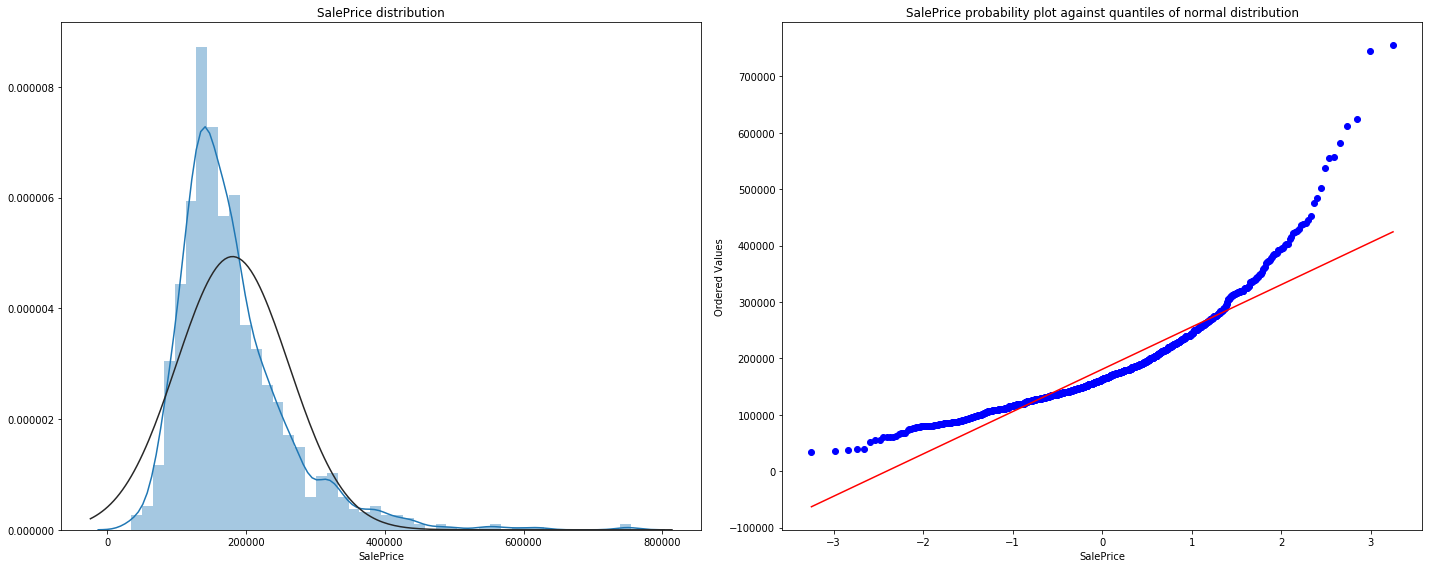

In [76]:
plot_distribution(y_featured['SalePrice'].values, 'SalePrice')

From the produced plot it is possible to see that the maximum likelihood gaussian is not able to approximate correctly the sale price distribution (1), and a that the data distribution dose not closely follow the diagonal that represents the normal distribution (2).<br>
So a transformation is needed in this case.

In [77]:
# transform the distribution identified by the given feature in the given dataframe
# using a given transformation (np.log default)
# if lambda is not null, it is used as a parameter of the transformation
def transform_feature(pandas_df, feature, transformation=np.log, lambda_=None):
    if(not lambda_):
        pandas_df[feature] = transformation(pandas_df[feature])
    else:
        pandas_df[feature] = transformation(pandas_df[feature], lambda_)
    return pandas_df

Skewness: 0.140845
Kurtosis: 0.915696


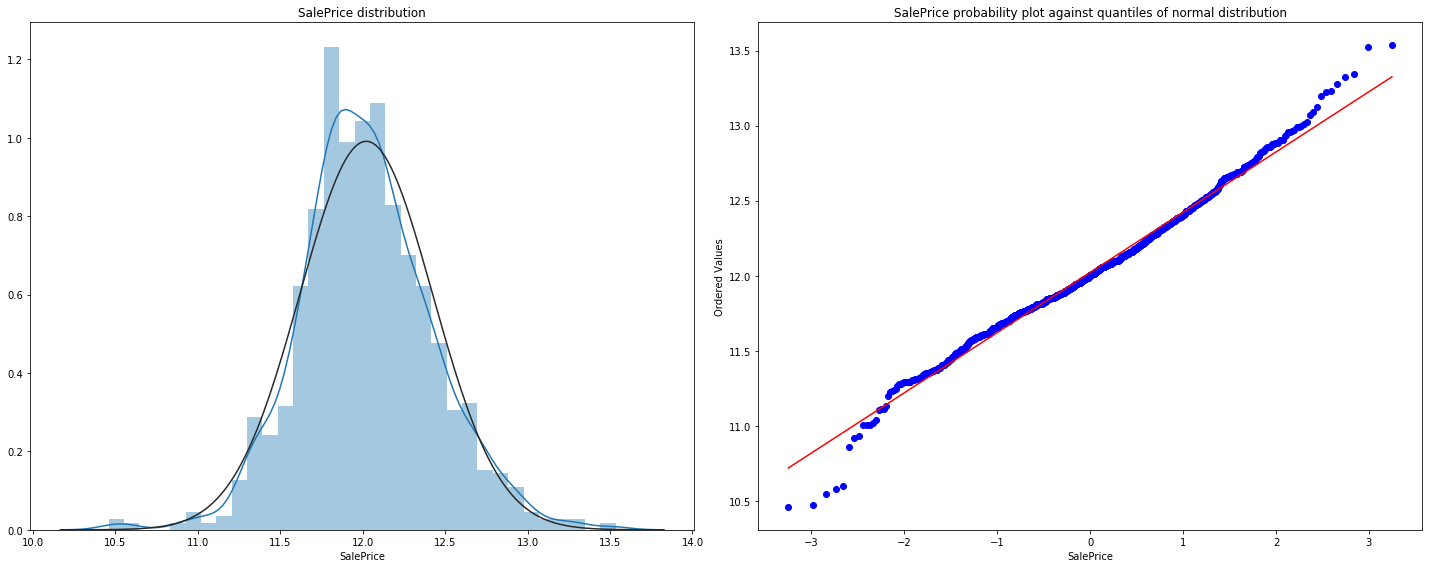

In [78]:
y_featured = transform_feature(y_featured, 'SalePrice')
plot_distribution(y_featured['SalePrice'].values, 'SalePrice')

First of all we can see that after having applied the transformation, the values of skewness and kurtosis have been adjusted perfectly, and are now close to 0 (optimal value of a gaussian normal distribution).

So, as expected from those values, also the plots reflect the good results: (1) now the maximum likelihood gaussian approximate really well the data distribution and (2) also in the probability plot the data is distributed exactly above the diagonal.

Given those good results, we want to apply the same procedure also to the other attributes.

### 3.2.2 Feature Transformation: GrLivArea

Let's see how the transformation works in the case of GrLivArea. This is another very important attribute, always among the top and most correlated with the sale price, for this reason we want to analyze the data distribution also in this case.

The only difference from the case above is that we are applying the np.log transformation also to the test set.

Skewness: 1.377594
Kurtosis: 4.995959


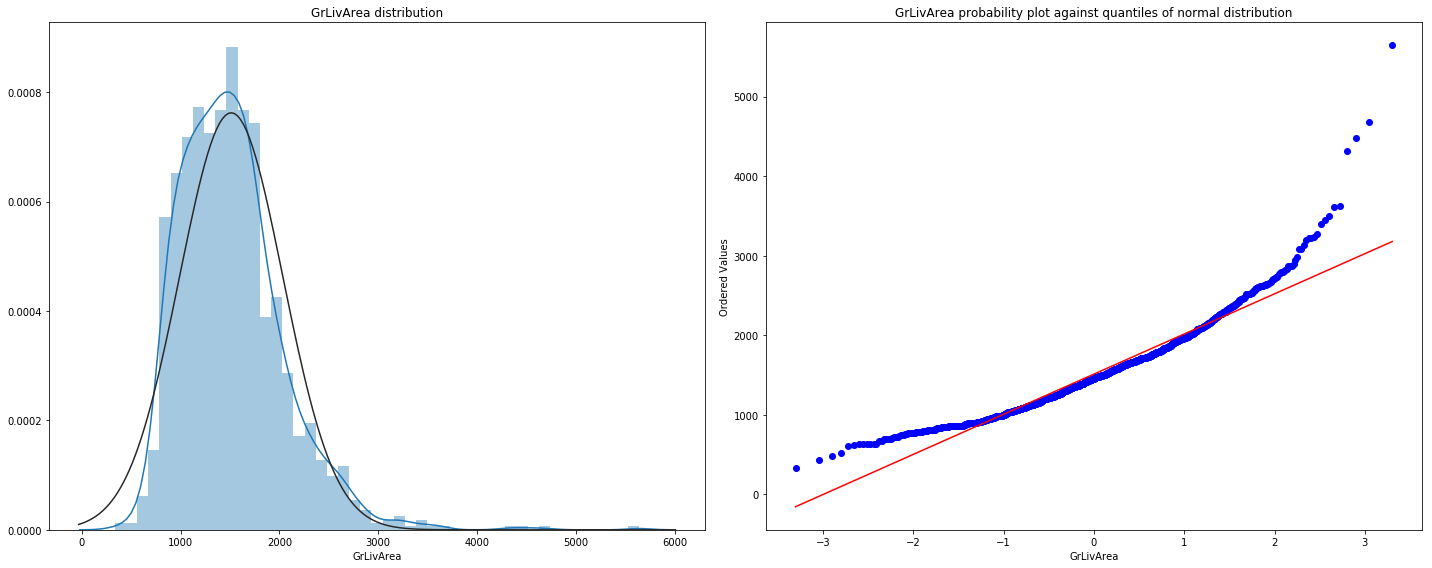

Skewness: -0.005571
Kurtosis: 0.290930


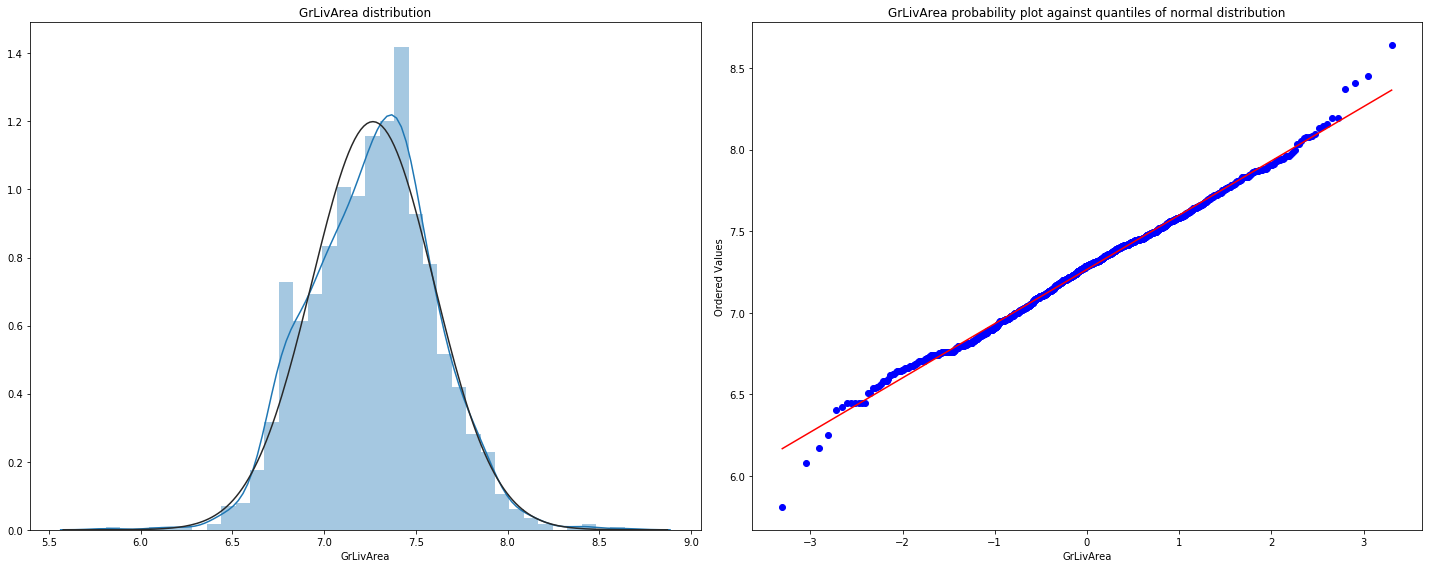

In [79]:
feature = 'GrLivArea'

plot_distribution(featured_df[feature], feature)
featured_df = transform_feature(featured_df, feature)
plot_distribution(featured_df[feature], feature)

So we have plotted the distribution and probability plots before and after the transformation. Again, the log transform has been able to adjust the skewness and the kurtosis of the distribution.

Now that we have understood the concept, we can run the transformation on all the other attributes, let's say on those with a skewness greater than 0.75.

### 3.2.3 Feature Transformation: Other Attributes

As we have a lot of attributes with 0 values we will apply the boxcox1p transformation with the lambda estimated with the boxcox normmax function.

As for the GrLivArea, all the tranformations are done separately on the training and the test set.

In [80]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

def transform_skews(pandas_df, skew_map, skewness_limit=0.75):
    for attr, skew in skew_map.iteritems():
        if(math.fabs(skew) > skewness_limit):
            print("Applying transformation to", attr, ":", skew)
            pandas_df = transform_feature(pandas_df, attr, transformation=boxcox1p, lambda_=boxcox_normmax(pandas_df[attr]+1))
    return pandas_df

In [81]:
numerical = [col for col in featured_df.columns if col not in categorical_ordinal_features+categorical_non_ordinal_features]
skews = featured_df[numerical].apply(lambda x : stats.skew(x)).sort_values(ascending=False)
featured_df = transform_skews(featured_df, skews)

Applying transformation to MiscVal : 24.4608712691
Applying transformation to PoolArea : 15.9736285484
Applying transformation to HasPool : 15.46514834
Applying transformation to 3SsnPorch : 10.2683804637
Applying transformation to LowQualFinSF : 9.24628368428
Applying transformation to KitchenAbvGr : 4.47146419404
Applying transformation to LotArea : 4.17737451422
Applying transformation to BsmtHalfBath : 4.15242568478
Applying transformation to BsmtFinSF2 : 4.14878913148
Applying transformation to ScreenPorch : 4.10645993889
Applying transformation to EnclosedPorch : 2.86720451025
Applying transformation to MasVnrArea : 2.68509931814
Applying transformation to OpenPorchSF : 2.36123191752
Applying transformation to TotSF : 2.19880452651
Applying transformation to BsmtFinSF1 : 1.70112949214
Applying transformation to TotalBsmtSF : 1.53830105802
Applying transformation to WoodDeckSF : 1.51743886247
Applying transformation to LotFrontage : 1.50888654472
Applying transformation to 1stFlrS

We have printed out all the transformations which have been performed on the dataset, with the related skewness value BEFORE the transformation. As we can see, the transformation applied to a lot of attributes!

So now that we have the test and training sets transformed.

In [82]:
featured_df.shape

(1453, 88)

## 3.3 One Hot Encoding: Dummy Features

When talking about the categorical attribute mapping we have noticed a problem: during the "non ordinal" attributes conversion (mapping to integers) we unwittingly introduced a not existing order relation in the attribute values.

The basic strategy to solve this problem is to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set.

Pandas supports this feature using get_dummies. This function is named this way because it creates dummy/indicator variables (aka 1 or 0).

### 3.3.1 Dummy Features: Encoding

In [83]:
featured_df_dummies = pd.get_dummies(featured_df, columns = categorical_non_ordinal_features, prefix=categorical_non_ordinal_features)
print(featured_df_dummies.shape)
print(featured_df_dummies.columns.values)

(1453, 244)
['Id' 'LotFrontage' 'LotArea' 'LotShape' 'Utilities' 'LandSlope'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'HeatingQC' 'Electrical' '1stFlrSF' '2ndFlrSF'
 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath'
 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual' 'TotRmsAbvGrd'
 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageYrBlt' 'GarageFinish'
 'GarageCars' 'GarageArea' 'GarageQual' 'GarageCond' 'PavedDrive'
 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch' 'ScreenPorch'
 'PoolArea' 'PoolQC' 'Fence' 'MiscVal' 'MoSold' 'YrSold' 'TotSF' 'TotBaths'
 'TotPorchSF' 'HasPool' 'Has2ndFlr' 'HasGarage' 'HasBsmt' 'HasFireplace'
 'MSZoning_0' 'MSZoning_1' 'MSZoning_2' 'MSZoning_3' 'MSZoning_4'
 'Street_0' 'Street_1' 'LandContour_0' 'LandContour_1' 'LandContour_2'
 'LandContour_3' 'LotConfig_0

As we can see, we do not have anymore the categorical non ordinal columns, because each of them has been splitted into a number of dummy columns; for example, Neighborhood has been divided into 25 different columns, one for each categorical value, and the same for all the other categorical attributes present in the "categorical_non_ordinal_attributes" list.

However, in some way this has introduced a new problem: the size of the dataset is exploded! From 80 columns of the original dataset, now we have more than 200 columns. We want to try addressing this problem in the following cells.

### 3.3.2 Dummy Features: Cleaning

One possibility in this case can be the cleaning: we can remove some useless column from the dataset. One possibility to do that could be to eliminate all the columns whose values are very unbalanced: a lot of 0s and a few 1s (or viceversa).

So the following function is made to adderss this problem, and has a fixed bound of 0.95, which means that all the columns that have more than the 95% of 0s or 1s will be filtered out.

In [84]:
def clean_dummies(pandas_df, bound=0.95):
    for col in pandas_df.columns:
        counts = pandas_df[col].value_counts().iloc[0]
        if(counts / len(pandas_df) > bound):
            print("Removing", col)
            pandas_df = pandas_df.drop([col], axis=1)
    return pandas_df

In [85]:
featured_df_dummies_cleaned = clean_dummies(featured_df_dummies, bound=0.997)
featured_df_dummies_cleaned.shape

Removing Utilities
Removing LotConfig_3
Removing Neighborhood_1
Removing Condition1_7
Removing Condition2_0
Removing Condition2_3
Removing Condition2_4
Removing Condition2_5
Removing Condition2_6
Removing Condition2_7
Removing RoofStyle_5
Removing RoofMatl_0
Removing RoofMatl_2
Removing RoofMatl_3
Removing RoofMatl_4
Removing Exterior1st_1
Removing Exterior1st_2
Removing Exterior1st_4
Removing Exterior1st_7
Removing Exterior1st_10
Removing Exterior2nd_1
Removing Exterior2nd_4
Removing Exterior2nd_9
Removing Foundation_5
Removing Heating_0
Removing Heating_4
Removing Heating_5
Removing SaleType_1
Removing SaleType_2
Removing SaleType_7
Removing SaleCondition_1
Removing MiscFeature_0
Removing MiscFeature_2
Removing MiscFeature_4
Removing MSSubClass_2


(1453, 209)

As we can see, by running the cleaning with a very very high (0.997) bound, we have already removed a lot of attributes.

## 3.4 Feature Selection

Last section of this feature engineering chapter is the "feature selection". Here we just want to apply an initial selection on the featured dataframe by considering all what we have seen during the analysis part and what we have understood about the data.

So we filter out the less important features and reapply what we have seen until now for the features selection.

In [86]:
def select_important_features(dataframe, selected_features):
    return dataframe[selected_features]

not_chosen_features = ['LotArea', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF',
'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF',
'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Street', 
'LotShape', 'LotConfig', 'Utilities', 'LandSlope', 'Electrical', 'Functional', 'PavedDrive']

NB: we know that the 'Id' is not an important parameter for the purporse of making prediction. However it can be useful to keep it into the dataframe for the modeling part, so we do not eliminate it at this poin.

In [87]:
chosen_features = [feature for feature in featured_df.columns.values if feature not in not_chosen_features]
selected_categorical_non_ordinal_features = [feature for feature in categorical_non_ordinal_features if feature in chosen_features]

selected_df = select_important_features(featured_df, chosen_features)
selected_df_dummies = pd.get_dummies(selected_df, columns = selected_categorical_non_ordinal_features, prefix=selected_categorical_non_ordinal_features)
selected_df_dummies_cleaned = clean_dummies(selected_df_dummies, bound=0.997)
selected_df_dummies_cleaned.shape

Removing Neighborhood_1
Removing Condition1_7
Removing Condition2_0
Removing Condition2_3
Removing Condition2_4
Removing Condition2_5
Removing Condition2_6
Removing Condition2_7
Removing RoofStyle_5
Removing RoofMatl_0
Removing RoofMatl_2
Removing RoofMatl_3
Removing RoofMatl_4
Removing Exterior1st_1
Removing Exterior1st_2
Removing Exterior1st_4
Removing Exterior1st_7
Removing Exterior1st_10
Removing Exterior2nd_1
Removing Exterior2nd_4
Removing Exterior2nd_9
Removing Foundation_5
Removing Heating_0
Removing Heating_4
Removing Heating_5
Removing SaleType_1
Removing SaleType_2
Removing SaleType_7
Removing SaleCondition_1
Removing MiscFeature_0
Removing MiscFeature_2
Removing MiscFeature_4
Removing MSSubClass_2


(1453, 178)

As expected, considering the initial selection and the feature engineering phase, the number of obtained attributes is lower than the one we have above.

# 4. Modeling

At this point we want to run and test all we have said until now, and to start making prediction.

In order to do that, we first select the models to be used for getting the predictions, and then we try with different combinations of them to improve the results.

In this section we also want to try running the chosen models on the different dataframes we have produced above, to compare the results and to see how much we can improve our predictions. We will also try other techniques aside from simply testing the models, like stacking and ensembling.

All the given models will be tested by applying a K-Fold cross validation on the training set and computing the rmse on the obtained outputs.

This sections is organized as follow:
- Test on "selected features": last dataframes created on in the previous cell
- Test "all the features": original dataframes, with no removed attributes
- Optimize results

After having defined the models and some support function, we start producing results and evaluating our models, and we do so by running them first on the set of "selected features" we have seen above, and then on the complete set of features.<br>
So we choose the best result and then we try to optimize it before finalizing our work.

In [88]:
! pip install 'xgboost'

You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [89]:
! pip install lightgbm

You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [90]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

### 4.0.1 Modeling: Models and Functions

Here we have defined a set of functions and data structures that will help us durin the modeling phase. We have the dictionary with the models we will use for making predictions and two functions for testing the models.

In [138]:
# chosen models
models = {
            "KernelRidge":KernelRidge(),
            "ElasticNet":ElasticNet(),
            "Lasso":Lasso(),
            "GradientBoostingRegressor":GradientBoostingRegressor(),
            "BayesianRidge":BayesianRidge(),
            "LassoLarsIC":LassoLarsIC(),
            "RandomForest":RandomForestRegressor(),
            "XGBRegressor":xgb.XGBRegressor(),
            "LightGBMRegressor":lgb.LGBMRegressor()
         }

# Validation function
def evaluate_model(model, X, y, folds):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = folds))
    return(rmse)

# function to test all the models above
def test_models(models, X, y, n_folds=5, shuffle=True, random_state=42):
    folds = KFold(n_folds, shuffle=shuffle, random_state=random_state).get_n_splits(X)
    for name, model in models.items():
        result = evaluate_model(model, X, y, folds)
        print(name, "{mean: %f - std: %f}" % (result.mean(), result.std()))

**'models'** is a dictionary of various models; in particular we have chosen to test 9 different models to compare different alternatives and results. Each model has its own advantages and disadvantages, and we don't know which one will be the best one, so we will just run all of them and chose the best result at the end.
- **KernelRidge**: Kernel ridge regression (KRR) combines ridge regression (linear least squares with l2-norm regularization) with the kernel trick. It thus learns a linear function in the space induced by the respective kernel and the data. For non-linear kernels, this corresponds to a non-linear function in the original space. The form of the model learned by KRR is identical to support vector regression (SVR). However, different loss functions are used: KRR uses squared error loss while support vector regression uses epsilon-insensitive loss, both combined with l2 regularization. In contrast to SVR, fitting a KRR model can be done in closed-form and is typically faster for medium-sized datasets. On the other hand, the learned model is non-sparse and thus slower than SVR, which learns a sparse model for epsilon > 0, at prediction-time.
- **ElasticNet**: Simple linear regression with combined L1 and L2 priors as regularizer.
- **Lasso**: Linear Model trained with L1 prior as regularizer (aka the Lasso)
- **GradientBoostingRegressor**: GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.
- **BayesianRidge**: Fit a Bayesian ridge model and optimize the regularization parameters lambda (precision of the weights) and alpha (precision of the noise).
- **LassoLarsIC**: Lasso model fit with Lars using BIC or AIC for model selection. AIC is the Akaike information criterion and BIC is the Bayes Information criterion. Such criteria are useful to select the value of the regularization parameter by making a trade-off between the goodness of fit and the complexity of the model. A good model should explain well the data while being simple.
- **RandomForest**: A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).
- **XGBRegressor**: This is an ensemble method that seeks to create a strong classifier (model) based on “weak” classifiers (weak and strong refer to a measure of how correlated are the learners to the actual target variable). By adding models on top of each other iteratively, the errors of the previous model are corrected by the next predictor, until the training data is accurately predicted or reproduced by the model. Gradient boosting also comprises an ensemble method that sequentially adds predictors and corrects previous models. However, instead of assigning different weights to the classifiers after every iteration, this method fits the new model to new residuals of the previous prediction and then minimizes the loss when adding the latest prediction. So, in the end, the model is updated using gradient descent: gradient boosting. This is supported for both regression and classification problems. XGBoost specifically, implements this algorithm for decision tree boosting.
- **LightGBMRegressor**: Gradient boosting framework that uses tree based learning algorithm. The difference with respect to the others is that Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm. Light GBM is prefixed as ‘Light’ because of its high speed: it can handle the large size of data and takes lower memory to run. Moreover, it focuses on accuracy of results.

Then we have defined two functions: evaluate_model, and test_models. The first one ('evaluate_model') is used by the other one to evaluate the given model; in practice the test_models function is just a "wrapper" of the evaluate, which then does all the work internally.

In all the cases, the evaulation is performed usign a K-Fold cross validation approach: the training set is divided into a number of splits, and the evaluation is performed by considering one split at a time as the test set, and the others as the training set, and at the end is performed the average between the various obtained results (rmse). In this way the whole dataset is used both as training and test set.

Here we wanted to use as much as possibile already existing functions for the models and for the final evaluations in order to improve as much as possible the algorithm performances, both for the execution of the model itself and for the accurancy on the predicted values.

## 4.1 Modeling: Selected Features

At this point we first want to test the features we have manually selected above.

We will try to run the models on various "configurations" of the dataset we have produced above: directly on the selected features, then on the features with dummies attributes and then on the cleaned version.

After that, we will also try to reduce the number of attributes on which it will be performed the training, and we'll do that by using the same approach used above during the analysis phase: a model for suggesting the top attributes.

Then, to finish, we will try with some stacking approach for improving as much as possible the final result.

### 4.1.1 Selected Features: Original dataframe

We don't have a dataframe ready for that, so we need to build it. 'complete_df' is the complete dataframe created above, with the values mapped to integers and the nan eliminated; no transformation or feature engineering technique has been applied to it. So we just need to select the attributes we are interested in.

In [139]:
filtered_df = select_important_features(complete_df, [feature for feature in complete_df.columns.values if feature not in not_chosen_features])
print(filtered_df.shape)
print(filtered_df.columns)

(1460, 52)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'Alley', 'LandContour',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


So we have built a new dataframe: filtered_df. As we can see, there are all the 1460 values (rows) in it, but there are not all the 80 original columns.

Now we need to test it, and in order to do that we have to remove the "test-set" part from it, and to transform the original SalePrice column by using the np.log transformation function defined above. We do that just because we will use the rmse computed on the logarithm to compare the results obtained using the other dataframes.

In [140]:
# filter out the testset
X_train = complete_df[:-260].drop(['Id'], axis=1)
# np.log transform on the y column
y_featured_original = transform_feature(train_complete_df.copy(), 'SalePrice')['SalePrice']

test_models(models, X_train.values, y_featured_original.values)

KernelRidge {mean: 0.134461 - std: 0.023437}
ElasticNet {mean: 0.171308 - std: 0.023124}
Lasso {mean: 0.178321 - std: 0.023032}
GradientBoostingRegressor {mean: 0.127976 - std: 0.016866}
BayesianRidge {mean: 0.133693 - std: 0.022872}
LassoLarsIC {mean: 0.141603 - std: 0.020066}
RandomForest {mean: 0.152560 - std: 0.016509}
XGBRegressor {mean: 0.132004 - std: 0.016139}
LightGBMRegressor {mean: 0.135140 - std: 0.016406}


Here we have the rmse and the st dev for each tested model, we will use those values as a starting point for making our comparisons.

Anyhow, also from this initial test we can already see that there are models that works way better than others: the best ones, for the moment, are the GradientBoostingRegressor, the XGBRegressor and the BayesianRidge; in particular the GradientBoostingRegressor appears to be the only one which gives a final rmse lower than .13

### 4.1.2 Selected Features: Featured dataframe

Within the "cleaning section", right after having filled the NaNs and mapped the strings to integers, we have done two imporant things: removed the outliers and featured the dataframe.

Here we want to test the eventual effectiveness of this step by running the test also on the "selected_df", which is the dataframe where have been applied the cleaning and the first feature engineering steps (added features and transformed values with the boxcox1p).

In [141]:
print(selected_df.shape)

(1453, 60)


There are three main differences from the case above: we have more features (the ones which have been extracted in the 3.1), the values are transformed to follow a gaussian normal distribution (point 3.2), and we have less rows because we have removed some outlier (point 2.2).

In [142]:
X_train = selected_df.iloc[:-260].drop(['Id'], axis=1)
y_train = y_featured['SalePrice']

test_models(models, X_train.values, y_train.values)

KernelRidge {mean: 0.136555 - std: 0.019107}
ElasticNet {mean: 0.191405 - std: 0.011563}
Lasso {mean: 0.198917 - std: 0.011995}
GradientBoostingRegressor {mean: 0.134904 - std: 0.020432}
BayesianRidge {mean: 0.136155 - std: 0.019909}
LassoLarsIC {mean: 0.140464 - std: 0.015404}
RandomForest {mean: 0.150257 - std: 0.016895}
XGBRegressor {mean: 0.135131 - std: 0.015772}
LightGBMRegressor {mean: 0.138934 - std: 0.017031}


Here we do not see an evident improvement: some of the models have produced a better result (like the LightGBMRegressor and the KernelRidge), others have given more or less the same values (XGB, RandomForest), others have produced a worsening result (GradientBoostingRegressor).

### 4.1.3 Selected Features: Dummies

We know that the dataframes which have been tested until now suffer of the problem regarding the non ordinal categorical features mapping. This error has been solved using the one-hot encoding. So we expect a "strong" improvement in the following cells.

The following tests are performed on the "selected_df_dummies" dataframe, which is the same as above, but with the additional one-hot encoding step applied.

In [143]:
print(selected_df_dummies.shape)
print(selected_df_dummies.columns)

(1453, 211)
Index(['Id', 'LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'MSSubClass_5', 'MSSubClass_6', 'MSSubClass_7', 'MSSubClass_8',
       'MSSubClass_9', 'MSSubClass_10', 'MSSubClass_11', 'MSSubClass_12',
       'MSSubClass_13', 'MSSubClass_14'],
      dtype='object', length=211)


Obviously the dataframe has the same number of rows, but a very different number of columns, due to the fact that all the dummies features have been added into it.

In [144]:
X_train = selected_df_dummies[:-260].drop(['Id'], axis=1)
test_models(models, X_train.values, y_train.values)

KernelRidge {mean: 0.132647 - std: 0.016821}
ElasticNet {mean: 0.191405 - std: 0.011563}
Lasso {mean: 0.198917 - std: 0.011995}
GradientBoostingRegressor {mean: 0.136064 - std: 0.017646}
BayesianRidge {mean: 0.127293 - std: 0.017653}
LassoLarsIC {mean: 0.137982 - std: 0.013577}
RandomForest {mean: 0.152019 - std: 0.015221}
XGBRegressor {mean: 0.136545 - std: 0.018580}
LightGBMRegressor {mean: 0.137721 - std: 0.018075}


As expected, here we have registered a general improvement on the obtained results: all the models have given an average rmse equal to or lower than the one above. Moreover, the BayesianRidge is the model which enjoyed the most all the transformations and the feature engineering performed on the dataframe as it gave the best results until now.

### 4.1.4 Selected Features: Cleaned Dummies

In order to try reducing the number of features we have defined a function (and produced the related dataframe) for "cleaning from the dummies features". We expect a slight improvement on the results obtained after having applied this procedure.

In [145]:
print(selected_df_dummies_cleaned.shape)
print(selected_df_dummies_cleaned.columns)

(1453, 178)
Index(['Id', 'LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'MSSubClass_5', 'MSSubClass_6', 'MSSubClass_7', 'MSSubClass_8',
       'MSSubClass_9', 'MSSubClass_10', 'MSSubClass_11', 'MSSubClass_12',
       'MSSubClass_13', 'MSSubClass_14'],
      dtype='object', length=178)


In [146]:
X_train = selected_df_dummies_cleaned[:-260].drop(['Id'], axis=1)

test_models(models, X_train.values, y_train.values)

KernelRidge {mean: 0.131301 - std: 0.017831}
ElasticNet {mean: 0.191405 - std: 0.011563}
Lasso {mean: 0.198917 - std: 0.011995}
GradientBoostingRegressor {mean: 0.135466 - std: 0.017562}
BayesianRidge {mean: 0.127226 - std: 0.017678}
LassoLarsIC {mean: 0.138057 - std: 0.013423}
RandomForest {mean: 0.147364 - std: 0.017124}
XGBRegressor {mean: 0.136239 - std: 0.017757}
LightGBMRegressor {mean: 0.137721 - std: 0.018075}


Here we have had a very soft improvement in most of the models (the results are better or equal to the one obtained above).

### 4.1.5 Selected Features: Filtering

At this point, another alternative that we have to filter as much as possible the attributes and to select the best ones, is to apply the same technique used during the analysis phase above for detecting the best attributes: using a model to get the most important features.

In the section 1 we have used two different approaches of the RandomForest algorithm to select and plot the most important attributes, however, here we have seen that the there are models which fit better the given case of study. Among those we have chosen the XGBRegressor.

So in this section we explore this new possibility to filter the selected features dataframes, and we perform two tests: one with the 75 most important attributes, and another with a number of features automatically recommended by the model. However, before running the tests, we want to obtain and show which are those features.

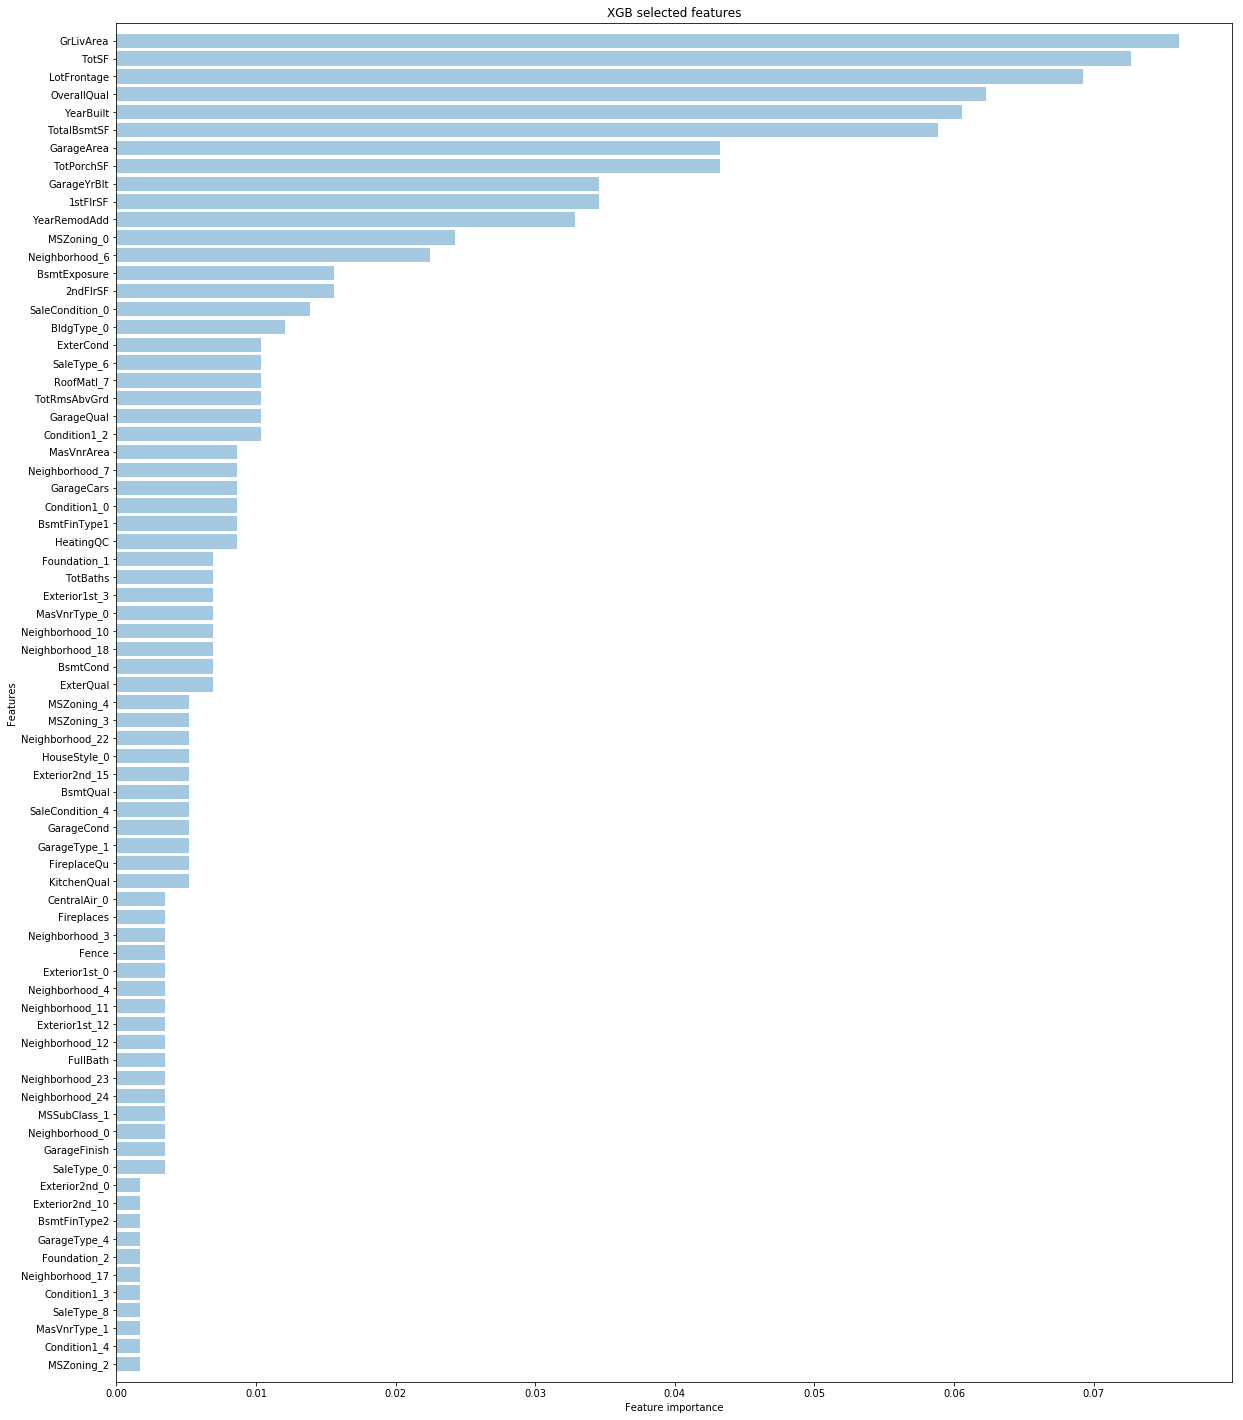

In [147]:
# fit the training set
models['XGBRegressor'].fit(X_train, y_train)

# Sort feature importances from trained model
n = 75
indices = np.argsort(models['XGBRegressor'].feature_importances_)
indices = indices[-n:] # get last and top scored n elements

# bar plot
plt.subplots(figsize=(20, 25))
bars = plt.barh(np.arange(n), models['XGBRegressor'].feature_importances_[indices], align='center', alpha=0.4)
plt.yticks(np.arange(n), X_train.columns[indices])
plt.ylim([-1,n])
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.title('XGB selected features')
plt.show()

So as we can see, here we have the list of the first 75 features selected by the XGBRegressor, ordered by importance. We can see that most of the identified features are the same as the ones recommended by the RandomForest above, however here we have also all the dummy features and the extracted ones (among the top ranked attributes, at the second position, there is 'TotSF', which is one of the created attributes!) which make the difference.

In [148]:
# try with all the n showed attributes
X_train_b = X_train[X_train.columns[indices].values]
test_models(models, X_train_b.values, y_train.values)

KernelRidge {mean: 0.128028 - std: 0.018546}
ElasticNet {mean: 0.191406 - std: 0.011563}
Lasso {mean: 0.198917 - std: 0.011995}
GradientBoostingRegressor {mean: 0.133054 - std: 0.018865}
BayesianRidge {mean: 0.127244 - std: 0.017679}
LassoLarsIC {mean: 0.137469 - std: 0.015461}
RandomForest {mean: 0.151512 - std: 0.016363}
XGBRegressor {mean: 0.136579 - std: 0.016914}
LightGBMRegressor {mean: 0.139670 - std: 0.017280}


Here we have tested the models with all the 75 showed features: again we can see a good improvement; now also the KernelRidge is below the 0.13 threshold, and some minor can be registered also for the other models.

### 4.1.5b Selected Features: Filtering (with more models!)

Another alternative, in order to try to generalize as much as possible, is to use more than one model to make this decision! In fact, we can average the "feature importances" coming from different algorithms in order to decide which are the best attributes.

In this case, in order to make the function as generic as possible, we also give the possibility to choose "n", the number of selected features. Another criteria to decide how many attributes to select could be to perform the average importance value and take all the values which are above the mean; also this possibility will be implemented.

In order to do that we define a function 'select_features' which, given the model to be used and the data, returns the training set of selected features + the selected column names.

In [149]:
# return the training set of selected features + selected columns
# if mean = True, n is not considered anymore, and all the elements whose features importance
# is greater than the average are returned
def select_features(models, X_train, y_train, n=75, mean=False, verbose=False):
    # get importances from all the models
    importances = []
    for model in models:
        model.fit(X_train, y_train)
        importances.append(model.feature_importances_)
        
    # compute the mean of the importances and get the indices
    means = np.mean(importances, axis=0)
    indices = np.argsort(means)
    
    # select indices
    if(mean):
        # compute the average feature importance
        mean = np.mean(means)

        # select indices above the average
        for i, idx in enumerate(indices):
            if means[idx] >= mean:
                break
    else:
        i = -n # revert n because the argsort returns the elements in increasing order
    
    # extract columns and training set
    columns = X_train.columns[indices[i:]]
    train = X_train[columns.values]
    
    # if verbose print out informations
    if verbose:
        print("Shape:", train.shape)
        print("Chosen features:", columns.values)
    
    # return chosen data and features
    return train, columns.values

# model chosen for the selection
selective_models = [models["GradientBoostingRegressor"], 
                    models["RandomForest"],
                    models["XGBRegressor"], 
                    models["LightGBMRegressor"]]

Among the models defined above, only 4 are suitable for making the selection: GradientBoostingRegressor, RandomForest, XGBRegressor, LightGBMRegressor. This is also good if we look at the results obtained above, as all the models chosen are giving good accuracy results; the only "exception" is the RandomForest, whose performances are slightly worse with respect to the other three models. However, we still prefer to use it for the selection as **we want to generalize as much as possible in order to prevent any "overfitting" risk.**

In fact, we don't know how well each model will perform on the test set as we are testing them on the training set.

In [150]:
# selecting using average
xgb_train, _ = select_features(selective_models, X_train, y_train.values, mean=True, verbose=True)

Shape: (1193, 31)
Chosen features: ['RoofStyle_1' 'Exterior1st_3' 'GarageFinish' 'GarageCars' 'Neighborhood_9'
 'Neighborhood_6' 'BldgType_0' 'KitchenQual' 'CentralAir_0' 'ExterCond'
 'FireplaceQu' 'BsmtCond' 'HeatingQC' 'SaleCondition_4' 'BsmtExposure'
 'BsmtFinType1' 'TotRmsAbvGrd' 'TotBaths' '2ndFlrSF' 'MasVnrArea'
 'OverallQual' 'GarageYrBlt' 'LotFrontage' 'YearRemodAdd' 'YearBuilt'
 '1stFlrSF' 'GarageArea' 'TotalBsmtSF' 'TotPorchSF' 'GrLivArea' 'TotSF']


In [151]:
test_models(models, xgb_train, y_train.values)

KernelRidge {mean: 0.133723 - std: 0.016365}
ElasticNet {mean: 0.191406 - std: 0.011563}
Lasso {mean: 0.198917 - std: 0.011995}
GradientBoostingRegressor {mean: 0.135734 - std: 0.019502}
BayesianRidge {mean: 0.133648 - std: 0.016871}
LassoLarsIC {mean: 0.135335 - std: 0.015516}
RandomForest {mean: 0.155113 - std: 0.018051}
XGBRegressor {mean: 0.136779 - std: 0.016340}
LightGBMRegressor {mean: 0.141370 - std: 0.017119}


Here we can see that using the mean to select the features did not improved much our results: most of the models got worst, and only a few improved a bit. We can see, in fact, that only 31 attributes have been selected, a too little number if we consider how many attributes we have (more than 200). So, probably, it is a good idea to not prune so much the features in order to keep the accurancy high.

At this point, before going on with the stacking, we can see that the two "Ridge" models (BayesianRidge and KernelRidge) are the ones which give the best results; while the two "linear regression based" (with regularization) models (Lasso and ElasticNet) are the worst ones. Probably linear regression (altough with regularization) is not a good idea for this case of study as all the other models are performing way better.

### 4.1.6 Selected Features: Stacking

A very well know and used technique for dealing with machine learning problems is the 'Stacking'.

Stacking is a way to ensemble multiple classification or regression model. There are many ways to ensemble models. Among most widely known are bagging or boosting.  Bagging allows multiple similar models with high variance are averaged to decrease variance. Boosting builds multiple incremental models to decrease the bias, while keeping variance small.

Stacking is a different paradigm however. **The point of stacking is to explore a space of different models** for the same problem. The idea is that you can attack a learning problem with different types of models which are capable to learn some part of the problem, but not the whole space of the problem. So it works by building multiple different learners and using them to build an intermediate prediction (one for each learned model). Then it is necessary to add a new model which learns from the intermediate predictions the same target. This final model is said to be stacked on the top of the others, hence the name. Thus this might improve the overall performance, and often end up with a model which is better than any individual intermediate model.

As we have seen that we have different models, each with different performances, it sounds like a good idea to try stacking them together.

In [152]:
class StackedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # clones models and fit data
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # train cloned models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    # predict using cloned models and average results
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In order to do that, we start building a new class which extends scikit-learn with our new model(s). This first trial is really simple: instead of using one model at a time, our class just imports a set of models. Fit and Predict function are overwritten: the fit just trains all the given models, and predict just predicts the result given the test set and average all of them.

**This is not a real "stacking", it is much more ensembling.** It is just an attempt we are making to test the effectiveness of the approach.

For the choice of the models to be stacked together, as we want to get the best from each algorithm, we don't want to just choose the two best models (Ridge models in this case) as in this case we would limit ourselves to their specific features. So we have chosed all the models with the exception of the worst ones (Lasso and ElasticNet).

In [153]:
# define averaged model
averaged_model = StackedModels(models = (models['KernelRidge'],
                                         models['LassoLarsIC'],
                                         models['LightGBMRegressor'],
                                         models['GradientBoostingRegressor'], 
                                         models["RandomForest"],
                                         models['BayesianRidge'], 
                                         models['XGBRegressor']))

xgb_train, _ = select_features(selective_models, X_train, y_train.values, n=75, mean=False, verbose=False)
test_models({"Averaged model":averaged_model}, xgb_train, y_train.values)

Averaged model {mean: 0.127530 - std: 0.017717}


NB: here the selection is made with n=75, and not with the mean, due to the results we have obtained above.

The obtained results sounds really promising: altought only two of the four chosen models have an accurancy lower than 0.13, the averaged model has given a value lower then it. Moreover, the obtained rmse is better than all the ones we got until now: the stacked model is performing better than each single model it is composed of.

Considering the promising results we got at this phase, it is a good idea to try improving as much as possible this model.

In [154]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=42)
        
        # train base models and create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # train the meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    # make predictions of all base models on the test data and use the averaged predictions as 
    # meta-features for the final prediction by the meta model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

Here we have a real example of stacking: we have a set of "base models" and a "meta model": the meta models is placed on top of the base models.

Base models are in fact trained and used to produce an "out of fold" set of predictions (the result of the average of all their predictions) which is than gived in input to the meta model for making the real predictions.

In [155]:
# define stacked averaged model
stacked_averaged_model = StackingAveragedModels(base_models = 
                                                (models['KernelRidge'], 
                                                 models['GradientBoostingRegressor'], 
                                                 models['XGBRegressor'],
                                                 models["RandomForest"],
                                                 models['LassoLarsIC'],
                                                 models['LightGBMRegressor'],
                                                ),
                                                meta_model = models['BayesianRidge'])

test_models({"Stacked averaged model":stacked_averaged_model}, xgb_train.values, y_train.values)

Stacked averaged model {mean: 0.126544 - std: 0.017064}


For the choice of the models, again, we have looked at the results obtained with the single models, and we have selected the best ones; in particular we have selected the best model to be the meta, and the other 5 for the bases.

Again, we have noticed an improvement in the final accurancy! This is really good, as "the only thing" we have changed is the model behind and the way the predictions are put together; but the model are always the same, and we have still improved the final result, which now is way better then "the sum of the single parts".

### 4.1.7 Selected Features: (Weighted) Ensembling Predictions

Last idea to try improving again the result is the ensemble. Instead of stacking models together, we just try to merge the final predictions, by assigning different weights to all of them. This can be good also to laverage a little bit the final output to avoid being too precise, and to generalize as much as possible to avoid any overfitting risk.

Also in this case we put together all the best models: the two stacked models defined above (which gave the best results until now) and the 7 best single models chosen among the 9 defined at the beginning. However, considering also the fact that the averaged models performed better than the other two, we want to assign the weights so that the stacked models prevail on the others.

In [156]:
from sklearn.model_selection import ShuffleSplit

def test_ensemble(models, weights, X_train, y_train, n_splits=5, test_size=0.2, random_state=42):
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=random_state)
    
    rmse = []
    for train_index, test_index in ss.split(X_train):
        x_train = X_train[train_index]
        x_test = X_train[test_index]
        y = y_train[train_index]
        y_test = y_train[test_index]
        
        y_predicted = []
        for model, w in zip(models, weights):
            model.fit(x_train, y)
            y_predicted.append(model.predict(x_test)*w)
        
        rmse.append(np.sqrt(mean_squared_error(y_test, sum(y_predicted))))
    return np.mean(rmse)

In [157]:
ensemble_models = [averaged_model,
                   stacked_averaged_model,
                   models['BayesianRidge'],
                   models['KernelRidge'],
                   models['GradientBoostingRegressor'],
                   models['LassoLarsIC'],
                   models['RandomForest'],
                   models['XGBRegressor'],
                   models['LightGBMRegressor']
                  ]
ensemble_weights = [0.15, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
rmse = test_ensemble(ensemble_models, ensemble_weights, xgb_train.values, y_train.values)
print("Ensemble:", rmse)

Ensemble: 0.12597794744


For the weights we have chosen to assign a 0.1 to the single models, and a 0.15 to the two stacked models.

This improved again the final result!

## 4.2 Original Features

At this point we want to go further and test more our models to try improving as much as possible our accurancy.

So we just repeat the same tests and analysis made above also on the "original dataset". In fact, we have seen that when we let the models chose the features the accurancy generally improved. So it is possible that it's better to start with the complete dataset and let them decide what are the best parameters to train on.

### 4.2.1 Original Features: Original Dataframe

We start again with the "complete_df", but in this case we don't select our features from it.

In [158]:
X_train = complete_df[:1200].drop(['Id'], axis=1)
test_models(models, X_train.values, y_featured_original.values)

KernelRidge {mean: 0.134461 - std: 0.023437}
ElasticNet {mean: 0.171308 - std: 0.023124}
Lasso {mean: 0.178321 - std: 0.023032}
GradientBoostingRegressor {mean: 0.127373 - std: 0.016756}
BayesianRidge {mean: 0.133693 - std: 0.022872}
LassoLarsIC {mean: 0.141603 - std: 0.020066}
RandomForest {mean: 0.150878 - std: 0.017726}
XGBRegressor {mean: 0.132004 - std: 0.016139}
LightGBMRegressor {mean: 0.135140 - std: 0.016406}


If we look at the results obtained above by using the same "configuration" of the dataframe (no feature engineering or cleaning applied, the only difference is in the number of attributes we are using for the training), we can immediately see that in this case, by using the whole set of attributes, we are getting way better: this probably means that we made some errors while selected the attributes and we have removed some important feature which is useful for the final classification.<br>
Also in this case the best model is the GradientBoostingRegressor!

Now let's see what happens with the cleaned dataframe.

### 4.2.2 Original Features: Cleaned Dataframe

Also in this case we can use directly the defined dataframe, cleanded_df, to run our test.

In [159]:
X_train = cleaned_df[:-260].drop(['Id'], axis=1)
y_train = y_featured['SalePrice']
test_models(models, X_train.values, y_train.values)

KernelRidge {mean: 0.133361 - std: 0.025392}
ElasticNet {mean: 0.171426 - std: 0.025295}
Lasso {mean: 0.178359 - std: 0.024732}
GradientBoostingRegressor {mean: 0.125932 - std: 0.017379}
BayesianRidge {mean: 0.133438 - std: 0.024705}
LassoLarsIC {mean: 0.138702 - std: 0.022159}
RandomForest {mean: 0.149609 - std: 0.018976}
XGBRegressor {mean: 0.131965 - std: 0.017716}
LightGBMRegressor {mean: 0.133511 - std: 0.014927}


As expected, the result is the same as the one obtained in the point 4.1: a good improvement in all the tried models. Now let's go on with the featuring.

### 4.2.3 Original Features: Featured Dataframe

In [160]:
X_train = featured_df[:-260].drop(['Id'], axis=1)
test_models(models, X_train.values, y_train.values)

KernelRidge {mean: 0.127406 - std: 0.021151}
ElasticNet {mean: 0.188564 - std: 0.012217}
Lasso {mean: 0.196355 - std: 0.012189}
GradientBoostingRegressor {mean: 0.130367 - std: 0.020298}
BayesianRidge {mean: 0.129285 - std: 0.021301}
LassoLarsIC {mean: 0.132474 - std: 0.017649}
RandomForest {mean: 0.151092 - std: 0.017949}
XGBRegressor {mean: 0.131804 - std: 0.018159}
LightGBMRegressor {mean: 0.133027 - std: 0.019058}


At this point we are already getting better than the best result obtained with the selected df. However, the GradientBoostingRegressor, which was the best model until now, gave a worse result than before.

### 4.2.4 Original Features: Dummies Features

In [161]:
X_train = featured_df_dummies[:-260].drop(['Id'], axis=1)
test_models(models, X_train.values, y_train.values)

KernelRidge {mean: 0.125317 - std: 0.016620}
ElasticNet {mean: 0.188564 - std: 0.012217}
Lasso {mean: 0.196355 - std: 0.012189}
GradientBoostingRegressor {mean: 0.130400 - std: 0.018698}
BayesianRidge {mean: 0.119825 - std: 0.018763}
LassoLarsIC {mean: 0.132995 - std: 0.016269}
RandomForest {mean: 0.149786 - std: 0.017430}
XGBRegressor {mean: 0.134858 - std: 0.016606}
LightGBMRegressor {mean: 0.131580 - std: 0.018966}


Again, as happened above, we have showed that using the model with the dummies is a very good idea to manage the already said mapping problem. Also in this case, in fact, all the models have enjoyed the featuring.

### 4.2.5 Original Features: Cleaned Dummies

In [162]:
X_train = featured_df_dummies_cleaned[:-260].drop(['Id'], axis=1)
test_models(models, X_train.values, y_train.values)

KernelRidge {mean: 0.123786 - std: 0.017957}
ElasticNet {mean: 0.188564 - std: 0.012217}
Lasso {mean: 0.196355 - std: 0.012189}
GradientBoostingRegressor {mean: 0.130082 - std: 0.018273}
BayesianRidge {mean: 0.119798 - std: 0.018877}
LassoLarsIC {mean: 0.135958 - std: 0.015852}
RandomForest {mean: 0.153470 - std: 0.013586}
XGBRegressor {mean: 0.134928 - std: 0.016730}
LightGBMRegressor {mean: 0.131580 - std: 0.018966}


### 4.2.6 Original Features: Filtering

In [163]:
xgb_train, _ = select_features(selective_models, X_train, y_train, n=150, verbose=True)
test_models(models, xgb_train, y_train.values)

Shape: (1193, 150)
Chosen features: ['LandContour_2' 'HouseStyle_5' 'Condition1_6' 'RoofStyle_2'
 'Exterior2nd_12' 'Heating_3' '3SsnPorch' 'HasFireplace' 'MSSubClass_5'
 'RoofMatl_5' 'LowQualFinSF' 'PoolQC' 'Condition1_5' 'Exterior2nd_2'
 'SaleType_3' 'Condition1_4' 'Neighborhood_0' 'Neighborhood_23'
 'Exterior2nd_0' 'Condition1_3' 'Alley_0' 'SaleCondition_5'
 'Neighborhood_10' 'MasVnrType_0' 'BsmtFinType2' 'Alley_2' 'CentralAir_1'
 'Condition2_2' 'RoofMatl_7' 'Neighborhood_14' 'LandSlope' 'Exterior2nd_15'
 'Exterior1st_0' 'GarageType_4' 'SaleCondition_3' 'MSZoning_0'
 'HouseStyle_7' 'Neighborhood_11' 'MiscFeature_1' 'GarageType_3'
 'MasVnrType_3' 'MasVnrType_2' 'Exterior2nd_14' 'LotConfig_0'
 'Neighborhood_16' 'Alley_1' 'Exterior1st_13' 'HouseStyle_2' 'RoofMatl_1'
 'MSSubClass_4' 'Exterior2nd_6' 'Exterior2nd_8' 'BsmtHalfBath' 'MiscVal'
 'LandContour_0' 'Neighborhood_5' 'Exterior2nd_5' 'LotConfig_2'
 'Exterior1st_6' 'LandContour_1' 'Exterior2nd_13' 'MSSubClass_1'
 'MiscFeature_3' 'Bldg

As happended in the section 4.1, also in this case selecting features using models appears to be a very good idea for improving again the final accurancy for ALL the models. However, in this case we have decided to select the double of features: 150. This because we are doing really well with the complete dataframe, and using more features appears to be a good idea. Moreover, we don't want to risk being too much selective as we are going to optimize the attributes in a better manner in the following cells.

Again, before going on, we can see that the situation is more or less the same as before, with ElasticNet and Lasso the worst models, and KernelRIdge and BayesianRidge the best ones.

### 4.2.7 Original Features: Stacking

For the choice of the models we will follow the same "strategy" as before: all the models with exception of the 2 worst ones.

In [164]:
averaged_model = StackedModels(models = (models['KernelRidge'],
                                         models['LassoLarsIC'],
                                         models['LightGBMRegressor'],
                                         models['GradientBoostingRegressor'], 
                                         models['RandomForest'],
                                         models['BayesianRidge'], 
                                         models['XGBRegressor']))
test_models({"Averaged model":averaged_model}, xgb_train, y_train.values)

Averaged model {mean: 0.119573 - std: 0.018387}


Here we have obtained an "averaged" result which is a little worse than the best result we could obtain with the single BayesianRidge (see results above). However, this is still surprising if we consider that we are using models with an accurancy of 0.15 (like the RandomForest) and 0.13 (like LightGBM or LassoLarsIC).

### 4.2.8 Original Features: Advanced Stacking

For the advanced stacking we are using the same strategy seen above: best model as meta model, and the others (less the linear ones) for the bases.

In [165]:
stacked_averaged_model = StackingAveragedModels(base_models = 
                                                (models['KernelRidge'], 
                                                 models['GradientBoostingRegressor'], 
                                                 models['XGBRegressor'],
                                                 models['LassoLarsIC'],
                                                 models['RandomForest'],
                                                 models['LightGBMRegressor'],
                                                ),
                                                meta_model = models['BayesianRidge'])
test_models({"Stacked Averaged model":stacked_averaged_model}, xgb_train.values, y_train.values)

Stacked Averaged model {mean: 0.116373 - std: 0.018733}


Here we have improved a lot the final result, and in this case the stacked model is way better than each single model it is composed of!

### 4.2.9 Original Features: Ensemble

Same thing as the point 4.1 for the Ensembling.

In [166]:
ensemble_models = [averaged_model,
                   stacked_averaged_model,
                   models['BayesianRidge'],
                   models['KernelRidge'],
                   models['GradientBoostingRegressor'],
                   models['LassoLarsIC'],
                   models['RandomForest'],
                   models['XGBRegressor'],
                   models['LightGBMRegressor']
                  ]
ensemble_weights = [0.15, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
rmse = test_ensemble(ensemble_models, ensemble_weights, xgb_train.values, y_train.values)
print("Ensemble:", rmse)

Ensemble: 0.116109495476


With the Ensemble we have reached the end also of this section, and also this time the final result is really good and way better than the one obtained with the selected features: more than 0.01 better!

## 4.3 Models Optimization

Last modeling section, before submitting the results, is the "optimization section". In this section we will try to optimize as much as possible our results by trying to: (1) find the best number of features to extract with the filter and (2) optimize the model parameters.

### 4.3.1 Optimization: Features number

As said above, we need to filter a little bit more the features. We have used the averaged features importance to define the top 75/150 feauters. Now we want to remove others and clean a little bit more our dataframe.

In order to do that, we have defined a function: optimize_features. This function works on the hyper-parameter that we have introduced when filtering the dummies features: n. As we have seen above, in fact, the select_feature function accept a parameter n which is the number of extracted (best) features. But what is the best number for n?

In [167]:
def optimize_features(df, y_train, test_models, test_weights):
    rmse_hist = []
    best_rmse = float('inf')
    best_i = 0
    
    _, columns = select_features(selective_models, df, y_train, n=df.shape[1], verbose=False)
    for i in range(1, len(columns)+1):
        rmse = test_ensemble(test_models, test_weights, df[columns[-i:]].values, y_train.values)
        
        rmse_hist.append(rmse)
        if(rmse < best_rmse):
            best_rmse = rmse
            best_i = i
    return best_i, rmse_hist

In [168]:
# get filtered columns only
X_train = featured_df_dummies_cleaned[:-260].drop(['Id'], axis=1)

# run optimization to eventually remove some features
best_n, hist = optimize_features(X_train, y_train, ensemble_models, ensemble_weights)

Lowest number of features: 115


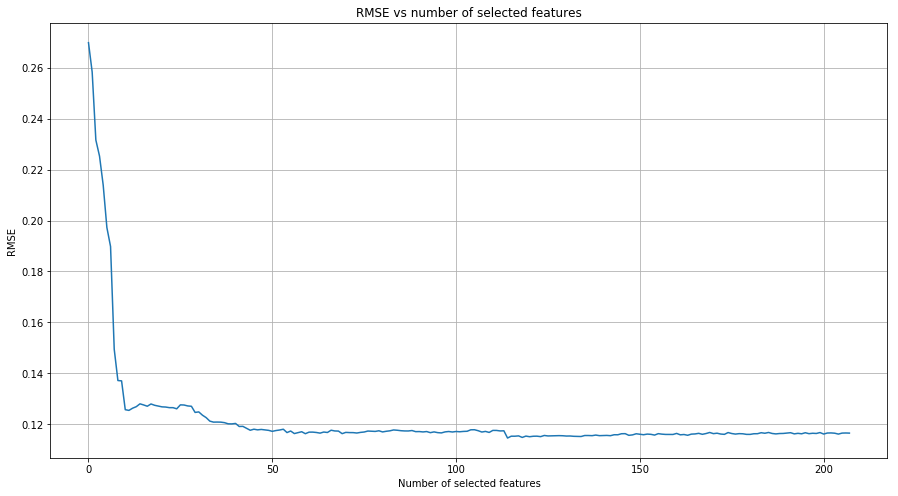

In [169]:
print("Lowest number of features:", best_n)

plt.figure(figsize=(15, 8))
plt.plot(range(len(hist)), hist)
plt.xlabel("Number of selected features")
plt.ylabel("RMSE")
plt.title("RMSE vs number of selected features")
plt.grid()
plt.show()

Here we have the plot representing the error with respect of the number of "top features" selected. As expected, with a too low number of features (< 50), the final RMSE is very high, and it decreases as we increase the attribute number. However, unexpectedly, after having reached the lowest rmse value, also if we keep increasing the number of attributes it stays stable instead of increasing again (so also if we use uncorrelated variables, the models are still able to keep the accurancy high).

In [170]:
# selected dataframe and columns with the best_n value
m_train, columns = select_features(selective_models, X_train, y_train, n=best_n, verbose=False)

### 4.3.2 Optimization: Models' Parameters

Here we have implemented a "parameter grid". Each model has a set of parameters which can be manually set to optimize and improve both running and output performances. However, in order to test different combinations of those parameters, we have defined a grid of possible values which will be evaluated by using a GridSearch to choose the best configuration.

In [123]:
from sklearn.model_selection import GridSearchCV

KernelRidge_params = { 'alpha': [0.0001, 0.001, 0.01, 0.1, 0.9], 
                        'coef0': np.arange(0, 5), 
                        'degree': np.arange(1, 10), 
                      'gamma': [None], 
                      'kernel': ['polynomial']}
ElasticNet_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1], 
                     'l1_ratio': np.arange(0.0, 1.1, 0.1), 
                     'fit_intercept': [True],  
                     'precompute': [False], 
                     'max_iter': [1000], 
                     'tol': [0.000001, 0.00001, 0.0001, 0.001, 0.01], 
                     'selection': ['random', 'cyclic']}
Lasso_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1], 
                'fit_intercept': [True],  
                'precompute': [False], 
                'max_iter': [1000], 
                'tol': [0.000001, 0.00001, 0.0001, 0.001, 0.01], 
                'selection': ['random', 'cyclic']}
GradientBoostingRegressor_params = {'loss': ['lad', 'huber'], 
                                    'learning_rate': [0.01, 0.1, 0.5], 
                                    'n_estimators': [300, 2000], 
                                    'max_features': ['sqrt'],
                                    'max_depth': np.arange(3, 10), 
                                    'min_samples_split': [2, 3], 
                                    'min_samples_leaf': [1, 3, 10, 15]}
BayesianRidge_params = {'n_iter': [1000], 
                        'tol': [0.000001, 0.00001, 0.0001, 0.001, 0.01], 
                        'alpha_1': [0.00000001, 0.0000001, 0.000001], 
                        'alpha_2': [0.00000001, 0.0000001, 0.000001], 
                        'lambda_1': [0.00000001, 0.0000001, 0.000001], 
                        'lambda_2': [0.00000001, 0.0000001, 0.000001]}
LassoLarsIC_params = {'criterion': ['aic', 'bic'], 
                      'normalize': [True], 
                      'eps': [0.000001, 0.00001, 0.0001, 0.001, 0.01], 
                      'max_iter': [1000], 
                      'precompute': ['auto']}
RandomForest_params = {'n_estimators': np.arange(10, 100, 10), 
                       'min_samples_split': np.arange(2, 10), 
                       'min_samples_leaf': np.arange(1, 5)}
XGBRegressor_params = {'max_depth': np.arange(3, 8), 
                       'learning_rate': [0.01, 0.05, 0.1], 
                       'n_estimators': [720], 
                       'booster': ['gbtree'], 
                       'gamma': [0], 
                       'reg_alpha': [0.1],
                       'reg_lambda': [0.7], 
                       'subsample' : np.arange(0.5, 1.0, 0.1),
                       'colsample_bytree' : np.arange(0.5, 1.0, 0.1),
                       'min_child_weight': [0.01, 0.1, 1]}
LightGBMRegressor_params = {'objective':['regression'],
                            'num_leaves':[5],
                            'learning_rate':[0.01, 0.05, 0.1], 
                            'n_estimators':[300, 2000],
                            'max_bin':[55],
                            'bagging_fraction':[0.8],
                            'bagging_freq':[5],
                            'feature_fraction':[0.2],
                            'feature_fraction_seed':[9],
                            'bagging_seed':[9],
                            'min_data_in_leaf':[6],
                            'min_sum_hessian_in_leaf':[11]}


params_grid = {"KernelRidge":KernelRidge_params, 
               "ElasticNet":ElasticNet_params, 
               "Lasso":Lasso_params, 
               "GradientBoostingRegressor":GradientBoostingRegressor_params, 
               "BayesianRidge":BayesianRidge_params, 
               "LassoLarsIC":LassoLarsIC_params, 
               "RandomForest":RandomForest_params, 
               "XGBRegressor":XGBRegressor_params,
               "LightGBMRegressor":LightGBMRegressor_params}


def optimize_alg_params(models, X_train, y_train):
    from sklearn.model_selection import ShuffleSplit
    
    shuff = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    
    for name, alg in models.items():
        gs_alg = GridSearchCV(alg, param_grid = params_grid[name], cv = shuff, scoring = 'neg_mean_squared_error')

        gs_alg.fit(X_train, y_train)
        gs_best = gs_alg.best_estimator_

        print(name, str(gs_alg.best_params_))

So as we can see, we have defined a set of dictionaries for the parameter grid, and a function for evaluating finding the best configurations.

All the parameters have been manually set and chosen; for most of them we have decided to use the default configuration (for the ones which have not been reported into the grid), or a single value that we belive can better suit the particular case. For the others, instead, we have reported a list of possible values, which have to be evaulated with the grid search.

The grid search, in this case, just try all the possible configuration with the given parameters, and select the best one as a final choice. The best parameters will be printed out during the execution. The more parameters we give to the search, the more accurate and precise will be the final selection; however, more computation is required. In fact, there are cases with a lot of combinations, as for example the XGBRegressor (which has a lot of parameters that have to be estimated on the special case), and for those it can be really time consuming to complete all the evaluations.

In [179]:
# nb: takes long time to execute
optimize_alg_params(models, m_train, y_train.values)

KernelRidge {'alpha': 0.0001, 'coef0': 4, 'degree': 1, 'gamma': None, 'kernel': 'polynomial'}
ElasticNet {'alpha': 0.001, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1000, 'precompute': False, 'selection': 'random', 'tol': 0.01}
Lasso {'alpha': 0.001, 'fit_intercept': True, 'max_iter': 1000, 'precompute': False, 'selection': 'random', 'tol': 0.01}
GradientBoostingRegressor {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2000}
BayesianRidge {'alpha_1': 1e-06, 'alpha_2': 1e-08, 'lambda_1': 1e-08, 'lambda_2': 1e-06, 'n_iter': 1000, 'tol': 0.001}
LassoLarsIC {'criterion': 'aic', 'eps': 1e-06, 'max_iter': 1000, 'normalize': True, 'precompute': 'auto'}
RandomForest {'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 60})
XGBRegressor {'booster': 'gbtree', 'colsample_bytree': 0.79999999999999993, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 0.01, 'n_esti

Here above we have the list of selected parameters. So, in the following cell, it is redefined the model dictionary with the given parameters.

In [180]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

# rebuild model with given parameters
models = {
            "KernelRidge":KernelRidge(alpha=0.0001, coef0=4, degree=1, gamma=None, kernel='polynomial'),
            "ElasticNet":make_pipeline(RobustScaler(),ElasticNet(alpha=0.001, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, tol=0.001, selection='random')),
            "Lasso":make_pipeline(RobustScaler(), Lasso(alpha=0.001, fit_intercept=True, max_iter=1000, precompute=False, selection='random', tol=0.01)),
            "GradientBoostingRegressor":GradientBoostingRegressor(learning_rate=0.1, loss='huber', max_depth=3, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=2000),
            "BayesianRidge":BayesianRidge(alpha_1=0.000001, alpha_2=0.00000001, lambda_1=0.00000001, lambda_2=0.000001, n_iter=1000, tol=0.001),
            "LassoLarsIC":LassoLarsIC(criterion='aic', eps=0.000001, max_iter=1000, normalize=True, precompute='auto'),
            "RandomForest":RandomForestRegressor(min_samples_leaf=1, min_samples_split=3, n_estimators=60),
            "XGBRegressor":xgb.XGBRegressor(booster='gbtree', colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=0.01, n_estimators=720, reg_alpha=0.1, reg_lambda=0.7, subsample=0.5),
            "LightGBMRegressor":lgb.LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, objective='regression', feature_fraction=0.2, learning_rate=0.05, max_bin=55, min_data_in_leaf=6, min_sum_hessian_in_leaf=11, n_estimators=2000, num_leaves=5)
         }

Until now, as we have seen, the ElasticNet and the Lasso models have been the worst among the defined ones, in all the trials we have completed. Those two models, are, by definition, very subjected to the outliers, so, in order to make them more "robust", we have pipelined a RobustScaler with the goal of filtering eventual outliers.

In [181]:
### test

# single models
test_models(models, m_train, y_train.values)

KernelRidge {mean: 0.118272 - std: 0.017168}
ElasticNet {mean: 0.116350 - std: 0.017529}
Lasso {mean: 0.118621 - std: 0.018040}
GradientBoostingRegressor {mean: 0.120973 - std: 0.018942}
BayesianRidge {mean: 0.117583 - std: 0.018169}
LassoLarsIC {mean: 0.132784 - std: 0.016225}
RandomForest {mean: 0.143169 - std: 0.016688}
XGBRegressor {mean: 0.121116 - std: 0.017146}
LightGBMRegressor {mean: 0.124091 - std: 0.014834}


Here we have tested the "new" models with the m_train dataset defined above (with the optimal n). As we can see, ALL the results have been improved a lot. The most surprising thing is that ElasticNet and Lasso are now among the best models for this case of study! This is merit of a combination of the RobustScaler and the model parameters.

The worst models now are LassoLarsIC and RandomForest. So, in the following cells, we will reimplement also the stacked models, and this time we will use Lasso and ElasticNet instead of LassoLarsIC and RandomForest.

In [176]:
# averaged model
averaged_model = StackedModels(models = (models['KernelRidge'],
                                         models['Lasso'],
                                         models['LightGBMRegressor'],
                                         models['GradientBoostingRegressor'], 
                                         models['ElasticNet'],
                                         models['BayesianRidge'], 
                                         models['XGBRegressor']))
test_models({"Averaged model":averaged_model}, m_train, y_train.values)

# stacked model
stacked_averaged_model = StackingAveragedModels(base_models = 
                                                (models['KernelRidge'], 
                                                 models['GradientBoostingRegressor'], 
                                                 models['XGBRegressor'],
                                                 models['Lasso'],
                                                 models['BayesianRidge'],
                                                 models['LightGBMRegressor'],
                                                ),
                                                meta_model = models['ElasticNet'])
test_models({"Stacked averaged model":stacked_averaged_model}, m_train.values, y_train.values)

Averaged model {mean: 0.113211 - std: 0.017704}
Stacked averaged model {mean: 0.112760 - std: 0.018898}


In [177]:
# ensemble
ensemble_models = [averaged_model,
                   stacked_averaged_model,
                   models['BayesianRidge'],
                   models['KernelRidge'],
                   models['GradientBoostingRegressor'],
                   models['Lasso'],
                   models['ElasticNet'],
                   models['XGBRegressor'],
                   models['LightGBMRegressor']
                  ]
ensemble_weights = [0.22, 0.22, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08]
rmse = test_ensemble(ensemble_models, ensemble_weights, m_train.values, y_train.values)
print("Ensemble:", rmse)

Ensemble: 0.108425431449


The final result is really surprising: the final accurancy is now lower than 0.11! For this final ensembling, however, we have also changed the proportion (weights) for the predictions. Instead of using 0.15 for the stacked and 0.1 for the single models, we have decided to give a bigger importance to the stacked models (which now are ~3 times the weights of the single ones).

# 5.0. Submit

In [175]:
def make_submit(x_train, y_train, x_test, models, weights):    
    y_predicted = []
    for m, w in zip(models, weights):
        m.fit(x_train.values, y_train.values)
        y_pred = m.predict(x_test.values)*w
        y_predicted.append(y_pred)

    y_predicted = np.expm1(sum(y_predicted))
    
    # create csv
    submit_df = pd.DataFrame()
    submit_df['Id'] = np.arange(1201, x_test.shape[0]+1201)
    submit_df['SalePrice'] = y_predicted
    submit_df.to_csv(base_folder+'submit.csv',index=False)
    print(submit_df.head(260))

    
x_test = featured_df_dummies_cleaned[columns][-260:]
make_submit(m_train, y_train, x_test, ensemble_models, ensemble_weights)

       Id      SalePrice
0    1201   98093.852896
1    1202  198912.944921
2    1203  134646.487577
3    1204  201969.209495
4    1205  150737.190463
5    1206  267238.998397
6    1207  113390.321681
7    1208  209420.314922
8    1209  143343.526916
9    1210  299391.895851
10   1211  194260.110102
11   1212  223773.104357
12   1213   84489.904753
13   1214  135869.557569
14   1215  126959.963396
15   1216  113208.604275
16   1217  129211.226327
17   1218  242960.925291
18   1219   75686.331656
19   1220   90272.284403
20   1221  105128.818258
21   1222  123222.748010
22   1223  154973.154668
23   1224  133764.300901
24   1225  203233.479559
25   1226  149484.974633
26   1227  228978.157424
27   1228  147753.869677
28   1229  360203.498073
29   1230  131265.960942
..    ...            ...
230  1431  181321.086293
231  1432  130453.691043
232  1433  103372.127018
233  1434  192753.332846
234  1435  163415.916568
235  1436  172006.657290
236  1437  115097.952336
237  1438  362361.273316
